## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [28]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
# importing the sklearn 
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate,GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,train_test_split
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#import the pipeline 
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
#import prepossing 
from sklearn.preprocessing import OneHotEncoder
#importing imbalance 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# imputer 
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [29]:
data = pd.read_csv("Train.csv.csv")
df=data.copy()
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10  ...       V32       V33        V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296  2.235198   
1 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514  1.894599   
2 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219  2.292138   
3 -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769  0.622714   
4  4.848994 -1.854920 -6.220023  ...  8.265896  6.629213 -10.068689  1.222987   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
2  5.360850  0.351993  2.940021  3.839160 -4.309402       0  
3  5.550100 -1.526796  0.138853  3.101430 -1.277378       0  
4 -3.229763  1.686909 -2.163896 -3.644622  6.510338       0  

[5 rows x 41 columns]

## Data Overview
- Data shape 
- Data info
- Data describe
- Will give the over view of the data 

### Data shape 

In [30]:
df.shape

(20000, 41)

***Observation***
- The dataset has 20000 rows and 41 columns which include the Target variable 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

***Observation***
- The V1 and v2 has Missing values 
- The Table has Float values.

In [32]:
df.describe().T

count      mean       std        min       25%       50%       75%  \
V1      19982.0 -0.271996  3.441625 -11.876451 -2.737146 -0.747917  1.840112   
V2      19982.0  0.440430  3.150784 -12.319951 -1.640674  0.471536  2.543967   
V3      20000.0  2.484699  3.388963 -10.708139  0.206860  2.255786  4.566165   
V4      20000.0 -0.083152  3.431595 -15.082052 -2.347660 -0.135241  2.130615   
V5      20000.0 -0.053752  2.104801  -8.603361 -1.535607 -0.101952  1.340480   
V6      20000.0 -0.995443  2.040970 -10.227147 -2.347238 -1.000515  0.380330   
V7      20000.0 -0.879325  1.761626  -7.949681 -2.030926 -0.917179  0.223695   
V8      20000.0 -0.548195  3.295756 -15.657561 -2.642665 -0.389085  1.722965   
V9      20000.0 -0.016808  2.160568  -8.596313 -1.494973 -0.067597  1.409203   
V10     20000.0 -0.012998  2.193201  -9.853957 -1.411212  0.100973  1.477045   
V11     20000.0 -1.895393  3.124322 -14.832058 -3.922404 -1.921237  0.118906   
V12     20000.0  1.604825  2.930454 -12.948007 -0.396514  1.507841  3.571454   
V13     20000.0  1.580486  2.874658 -13.228247 -0.223545  1.637185  3.459886   
V14     20000.0 -0.950632  1.789651  -7.738593 -2.170741 -0.957163  0.270677   
V15     20000.0 -2.414993  3.354974 -16.416606 -4.415322 -2.382617 -0.359052   
V16     20000.0 -2.925225  4.221717 -20.374158 -5.634240 -2.682705 -0.095046   
V17     20000.0 -0.134261  3.345462 -14.091184 -2.215611 -0.014580  2.068751   
V18     20000.0  1.189347  2.592276 -11.643994 -0.403917  0.883398  2.571770   
V19     20000.0  1.181808  3.396925 -13.491784 -1.050168  1.279061  3.493299   
V20     20000.0  0.023608  3.669477 -13.922659 -2.432953  0.033415  2.512372   
V21     20000.0 -3.611252  3.567690 -17.956231 -5.930360 -3.532888 -1.265884   
V22     20000.0  0.951835  1.651547 -10.122095 -0.118127  0.974687  2.025594   
V23     20000.0 -0.366116  4.031860 -14.866128 -3.098756 -0.262093  2.451750   
V24     20000.0  1.134389  3.912069 -16.387147 -1.468062  0.969048  3.545975   
V25     20000.0 -0.002186  2.016740  -8.228266 -1.365178  0.025050  1.397112   
V26     20000.0  1.873785  3.435137 -11.834271 -0.337863  1.950531  4.130037   
V27     20000.0 -0.612413  4.368847 -14.904939 -3.652323 -0.884894  2.189177   
V28     20000.0 -0.883218  1.917713  -9.269489 -2.171218 -0.891073  0.375884   
V29     20000.0 -0.985625  2.684365 -12.579469 -2.787443 -1.176181  0.629773   
V30     20000.0 -0.015534  3.005258 -14.796047 -1.867114  0.184346  2.036229   
V31     20000.0  0.486842  3.461384 -13.722760 -1.817772  0.490304  2.730688   
V32     20000.0  0.303799  5.500400 -19.876502 -3.420469  0.052073  3.761722   
V33     20000.0  0.049825  3.575285 -16.898353 -2.242857 -0.066249  2.255134   
V34     20000.0 -0.462702  3.183841 -17.985094 -2.136984 -0.255008  1.436935   
V35     20000.0  2.229620  2.937102 -15.349803  0.336191  2.098633  4.064358   
V36     20000.0  1.514809  3.800860 -14.833178 -0.943809  1.566526  3.983939   
V37     20000.0  0.011316  1.788165  -5.478350 -1.255819 -0.128435  1.175533   
V38     20000.0 -0.344025  3.948147 -17.375002 -2.987638 -0.316849  2.279399   
V39     20000.0  0.890653  1.753054  -6.438880 -0.272250  0.919261  2.057540   
V40     20000.0 -0.875630  3.012155 -11.023935 -2.940193 -0.920806  1.119897   
Target  20000.0  0.055500  0.228959   0.000000  0.000000  0.000000  0.000000   

              max  
V1      15.493002  
V2      13.089269  
V3      17.090919  
V4      13.236381  
V5       8.133797  
V6       6.975847  
V7       8.006091  
V8      11.679495  
V9       8.137580  
V10      8.108472  
V11     11.826433  
V12     15.080698  
V13     15.419616  
V14      5.670664  
V15     12.246455  
V16     13.583212  
V17     16.756432  
V18     13.179863  
V19     13.237742  
V20     16.052339  
V21     13.840473  
V22      7.409856  
V23     14.458734  
V24     17.163291  
V25      8.223389  
V26     16.836410  
V27     17.560404  
V28      6.527643  
V29     10.722055  
V30     12.505812  
V31     17.255090  
V32     2

***Observation***
- The V36 has max 19.329576
- The V14 has min 5.60

- Observations
- Sanity checks

### Null values 

In [33]:
df.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

***Observation***
- V1 and V2 has 18 null values 

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [34]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

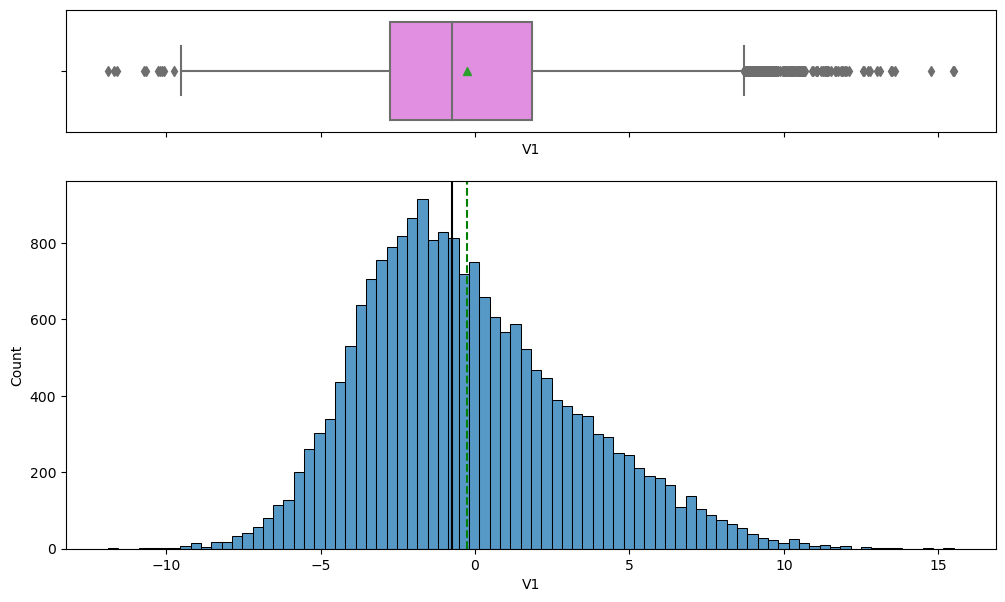

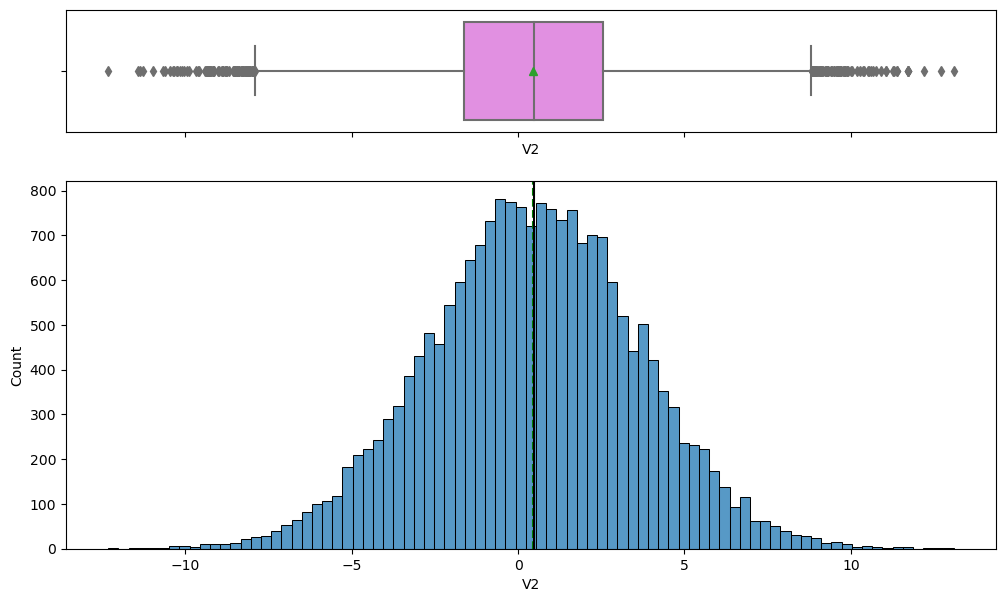

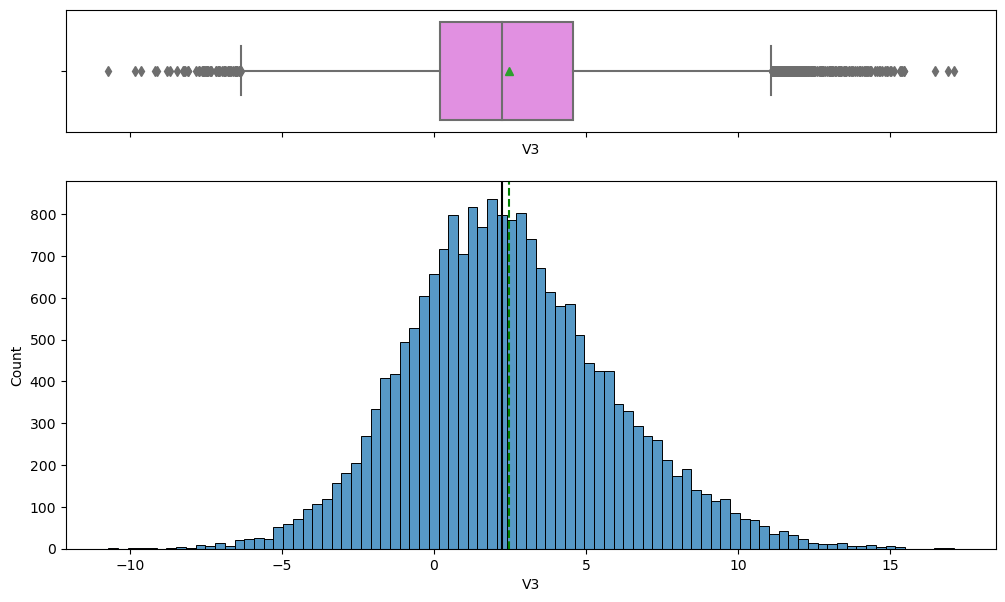

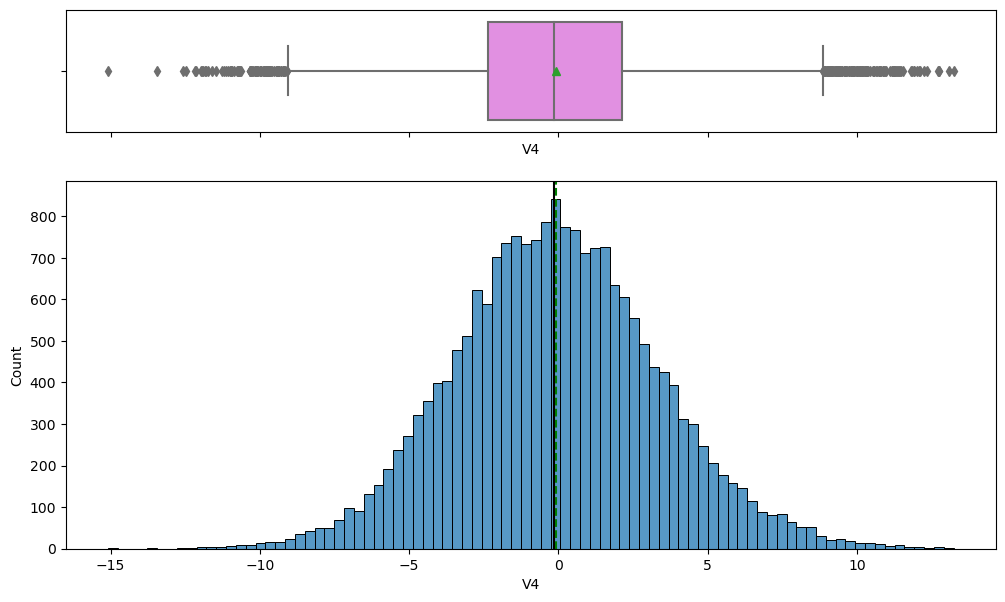

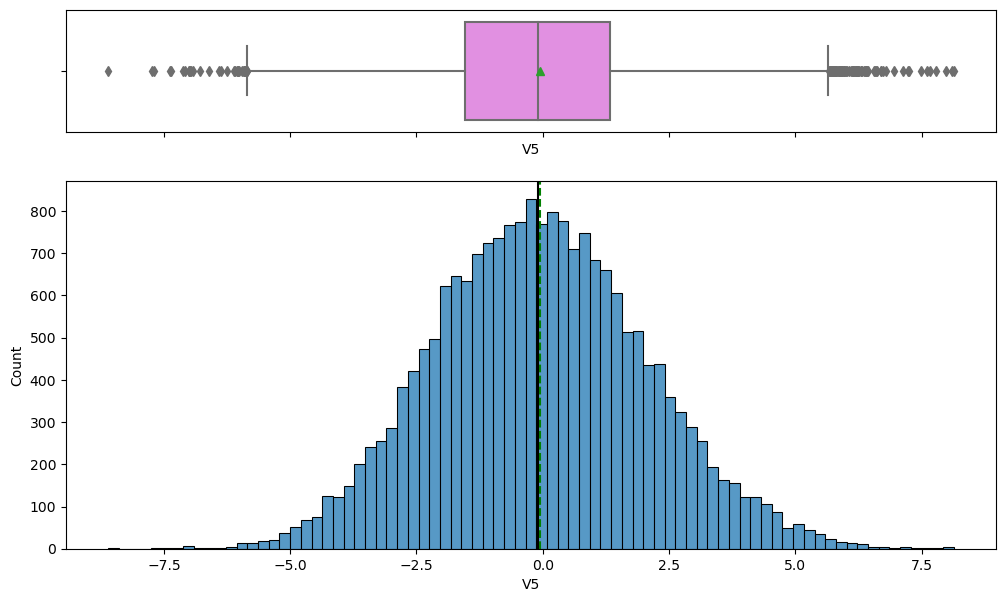

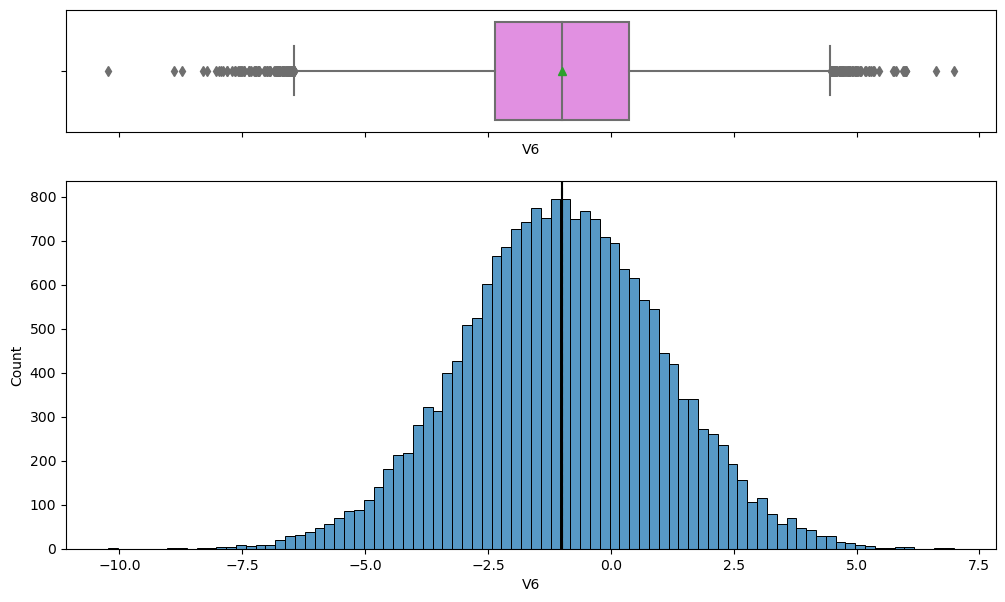

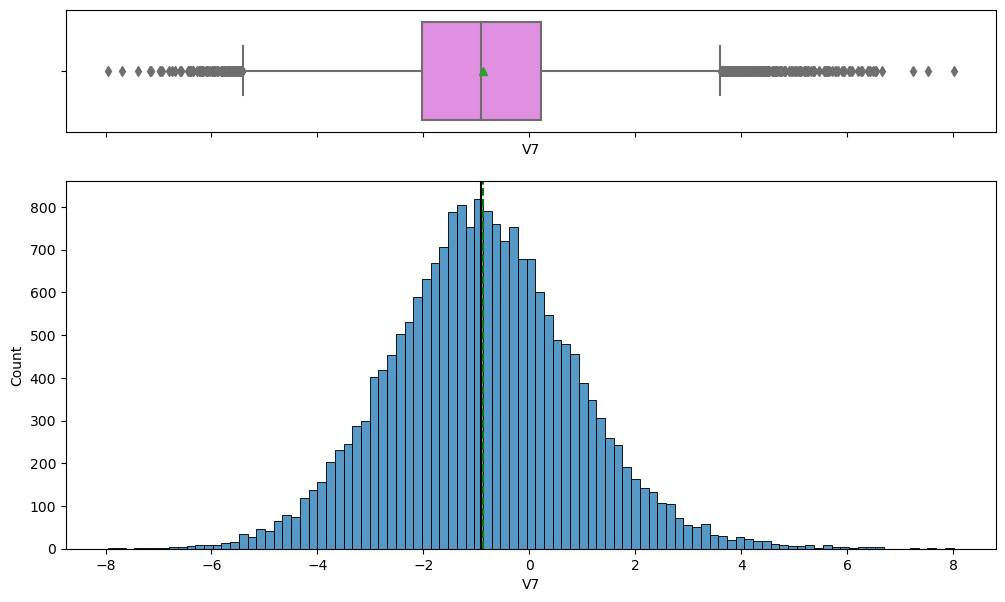

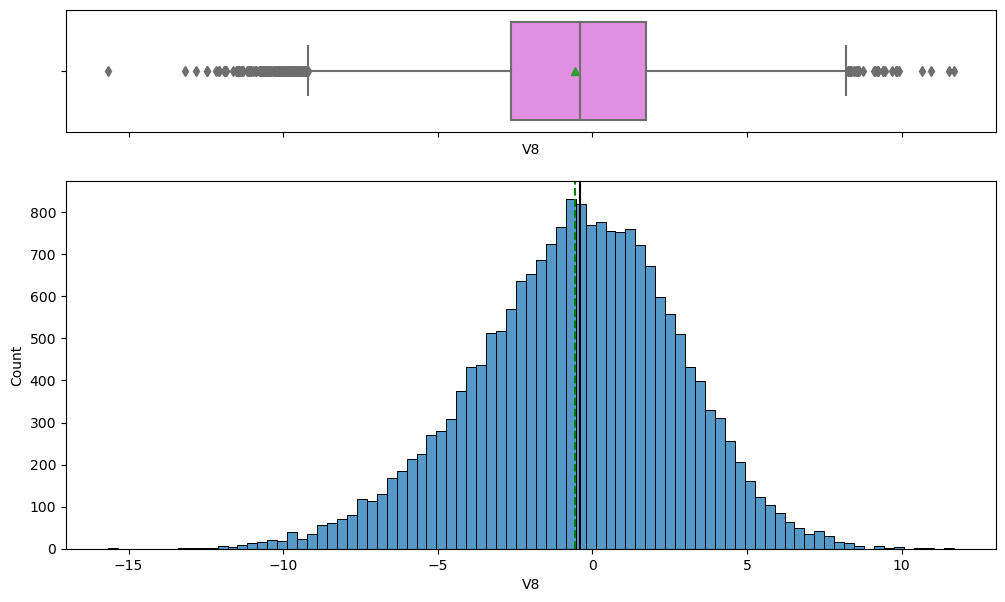

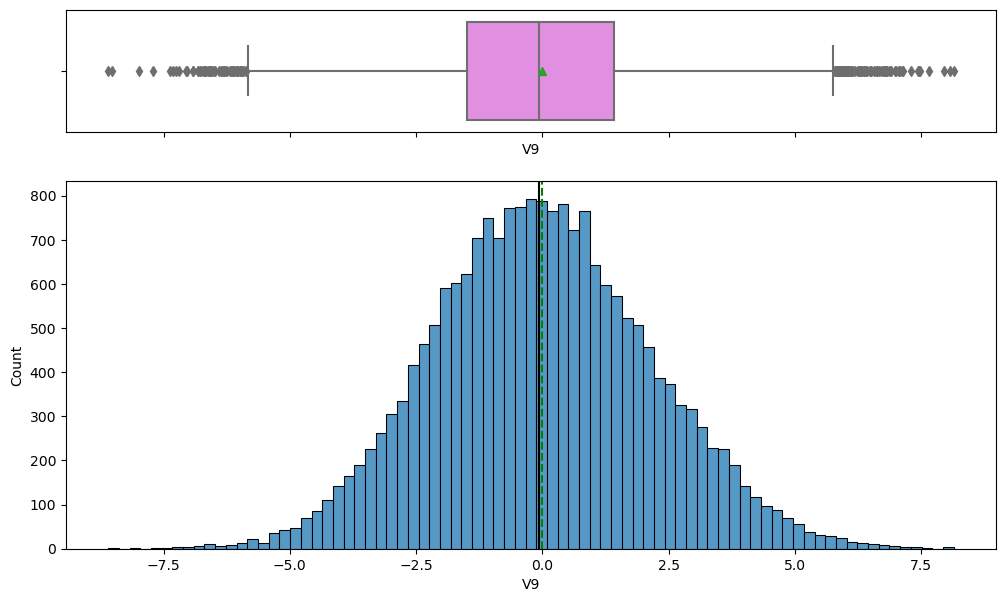

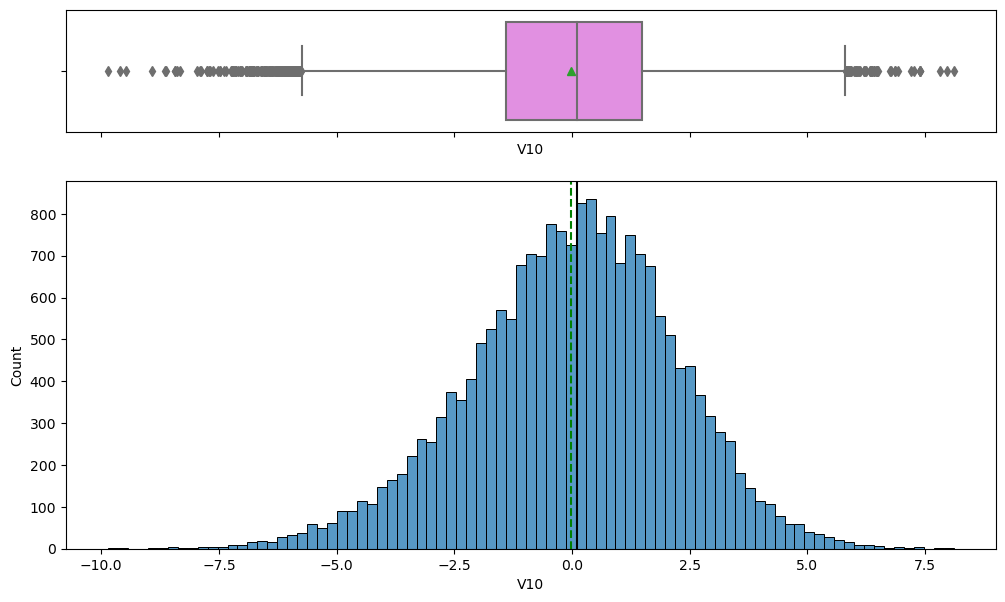

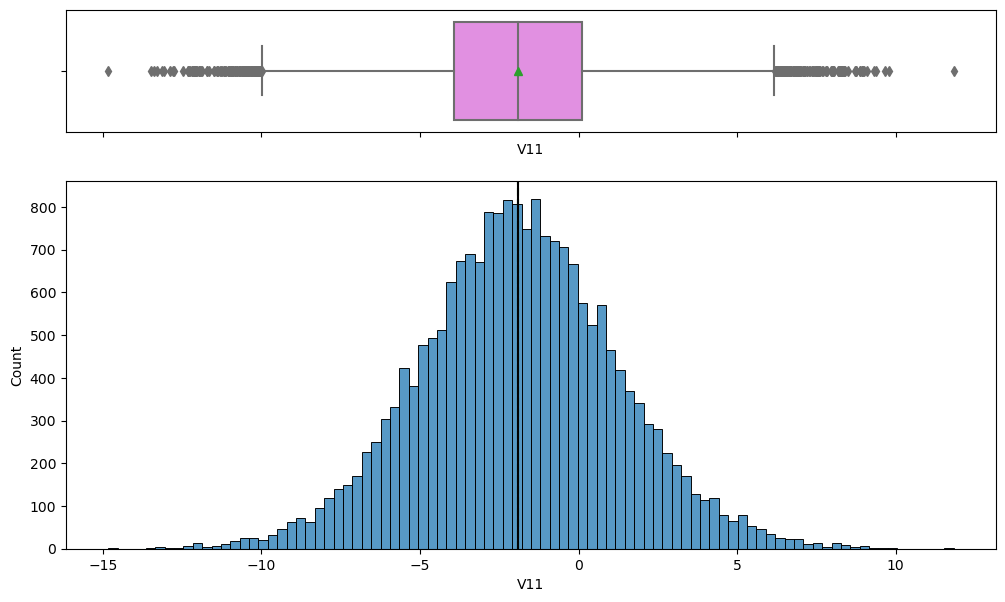

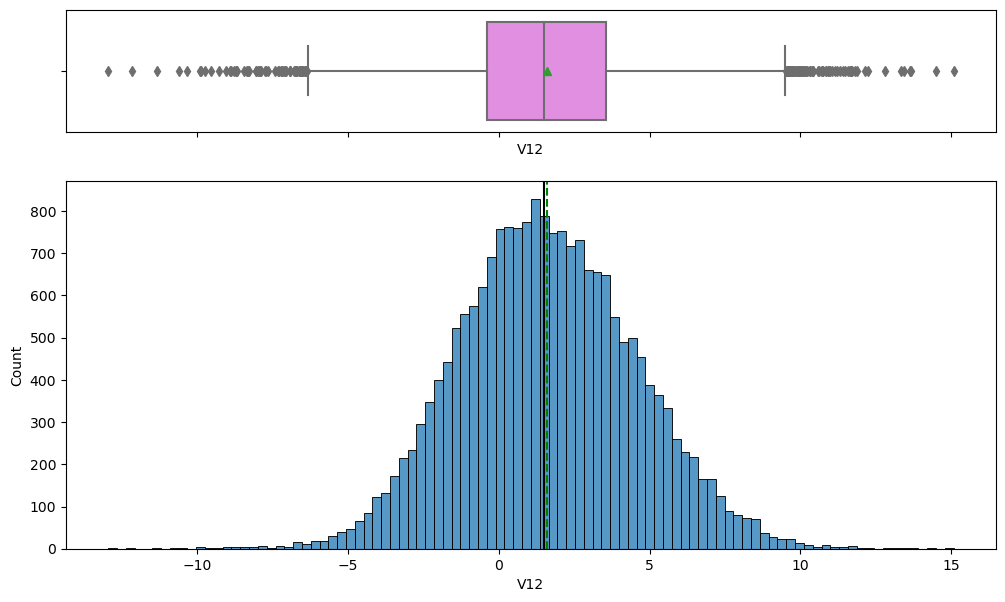

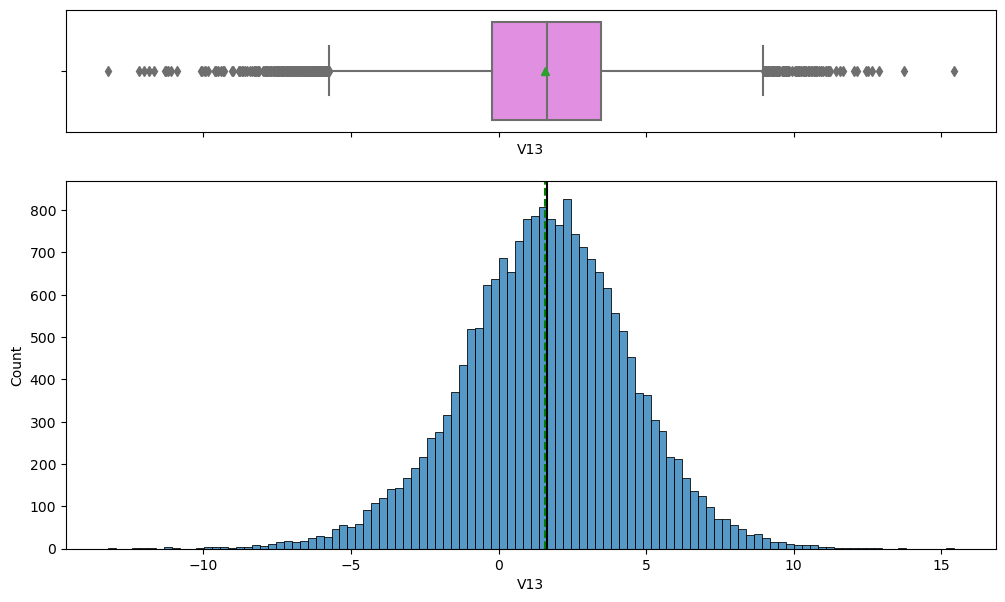

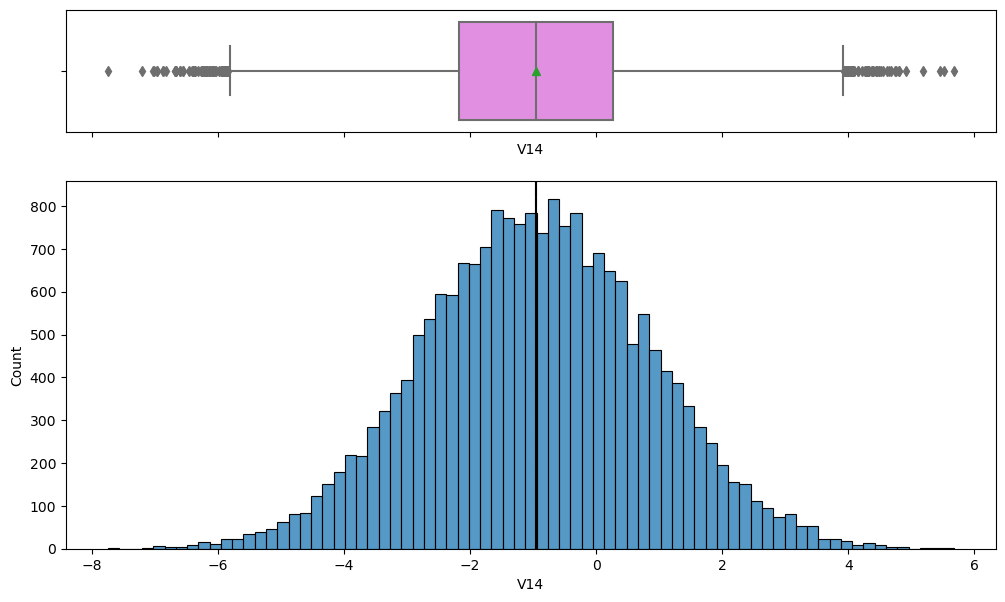

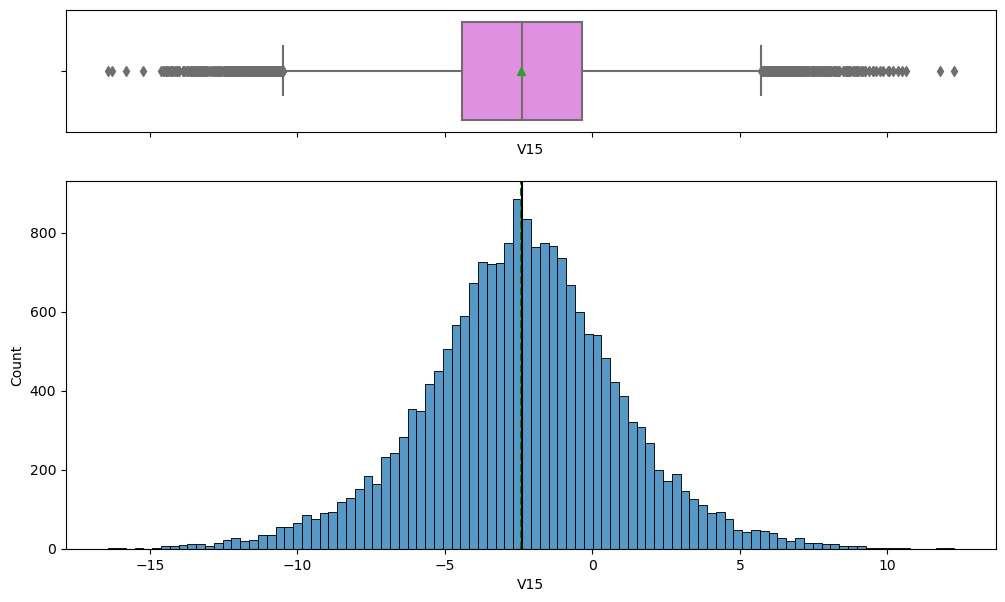

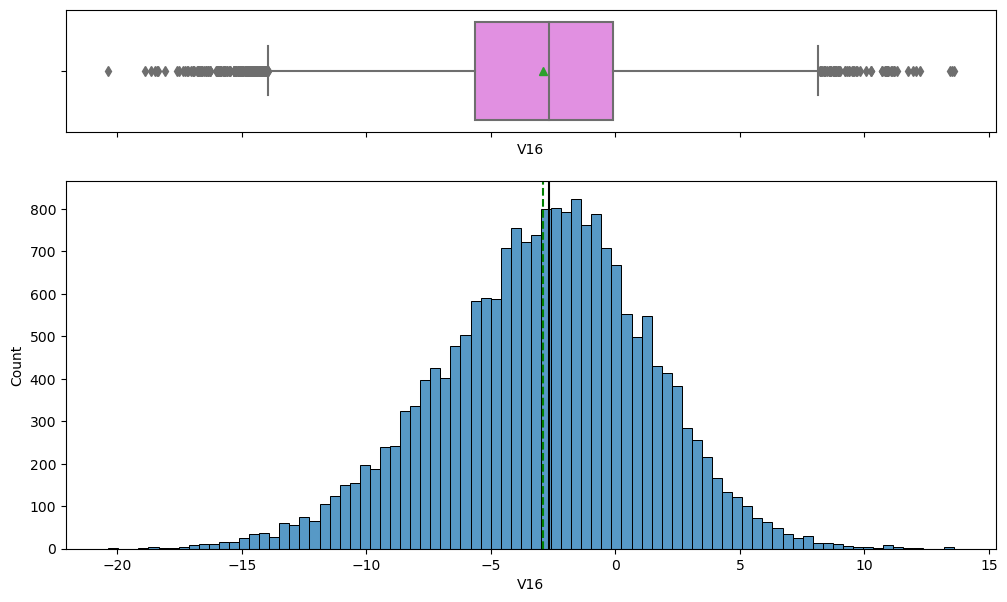

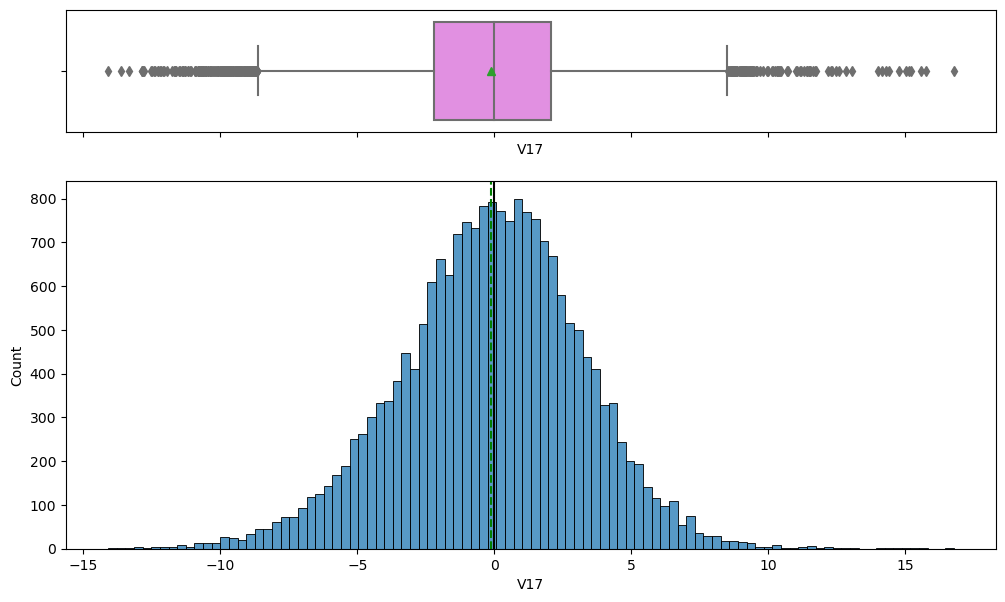

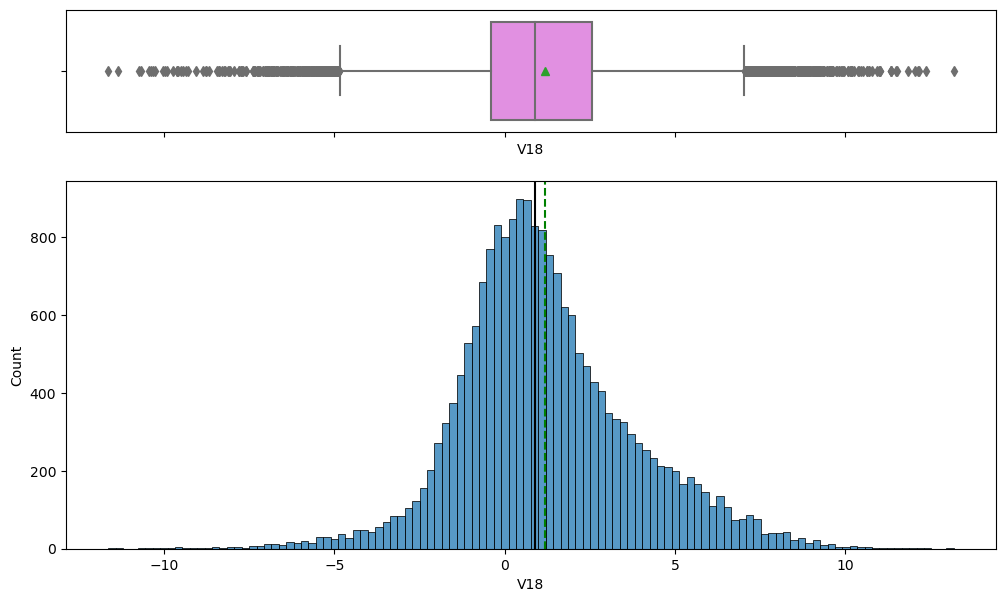

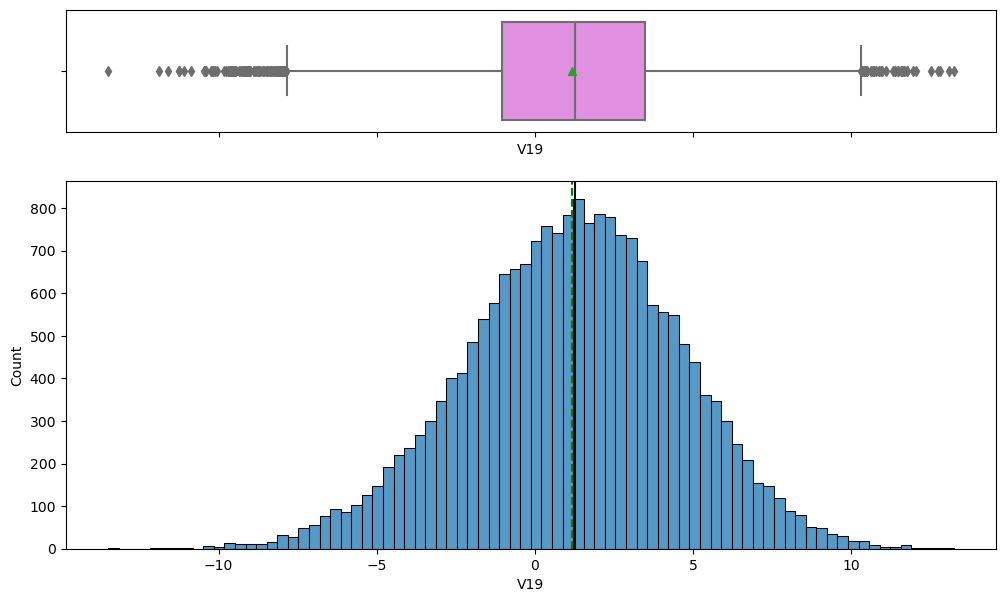

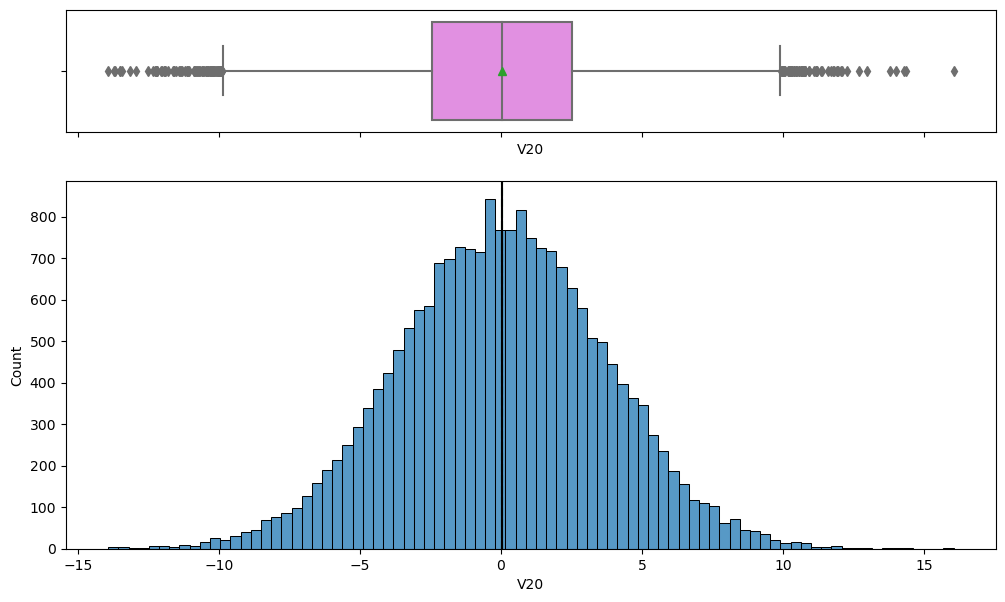

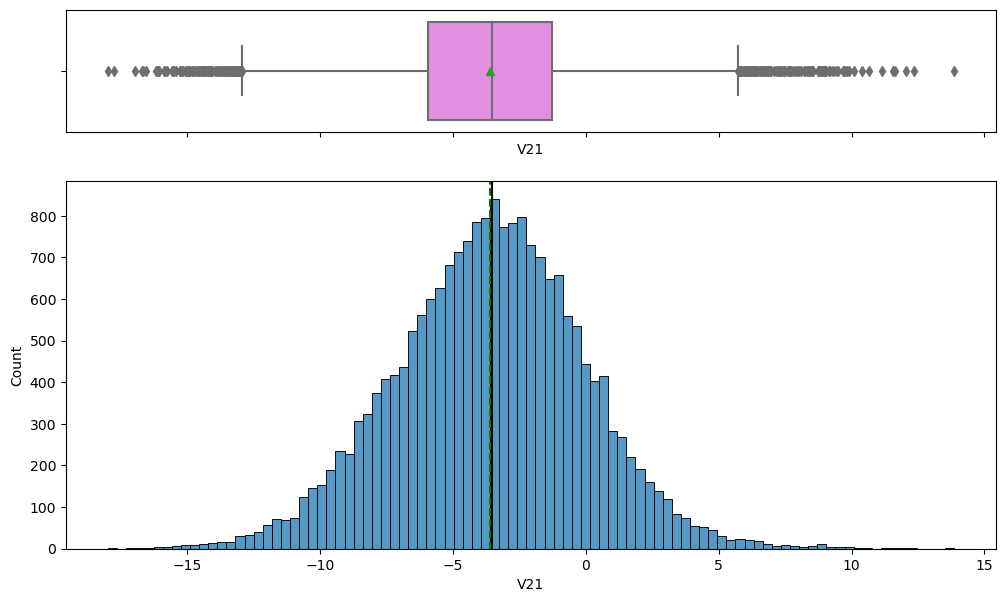

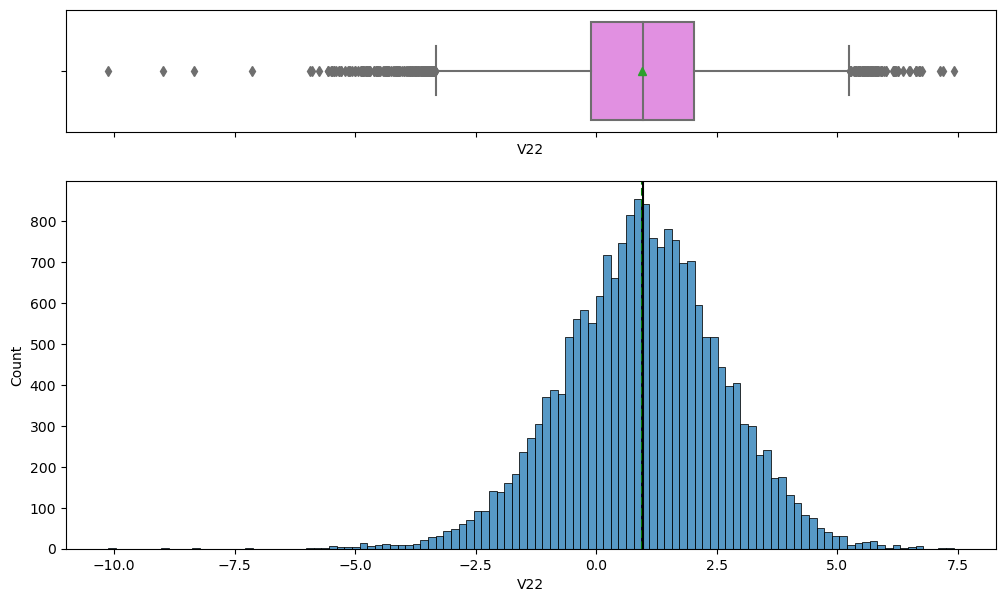

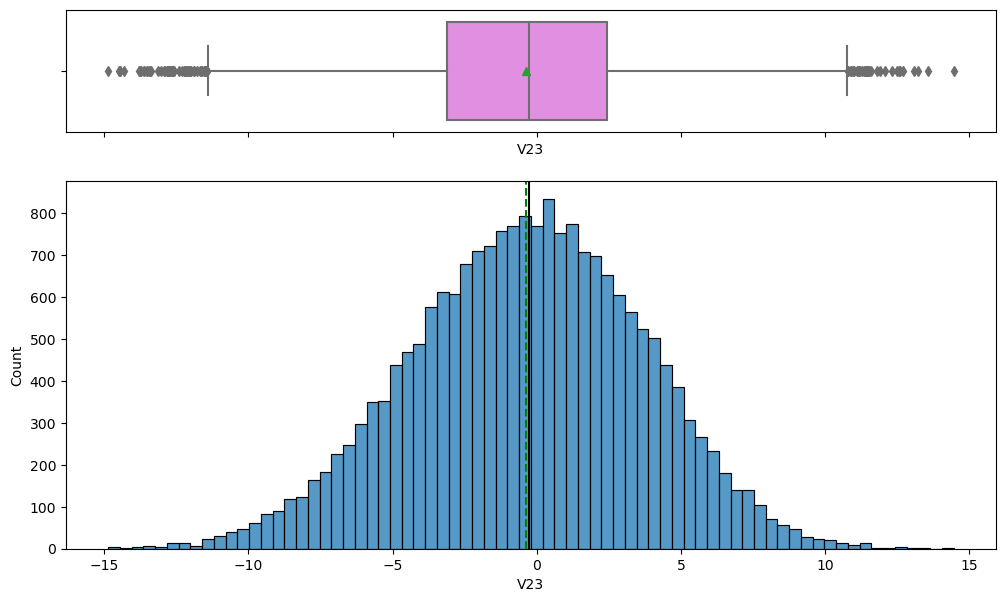

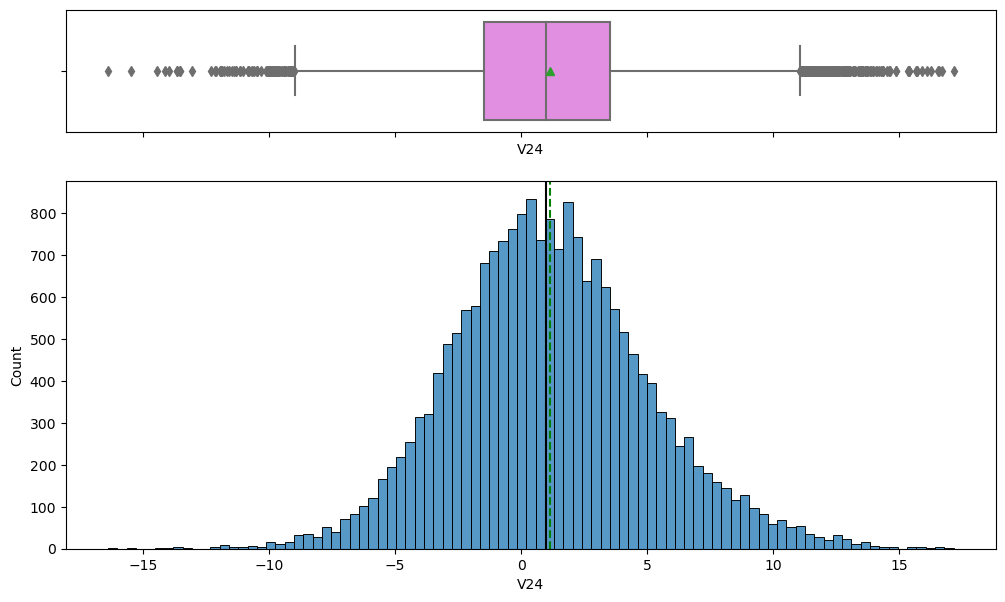

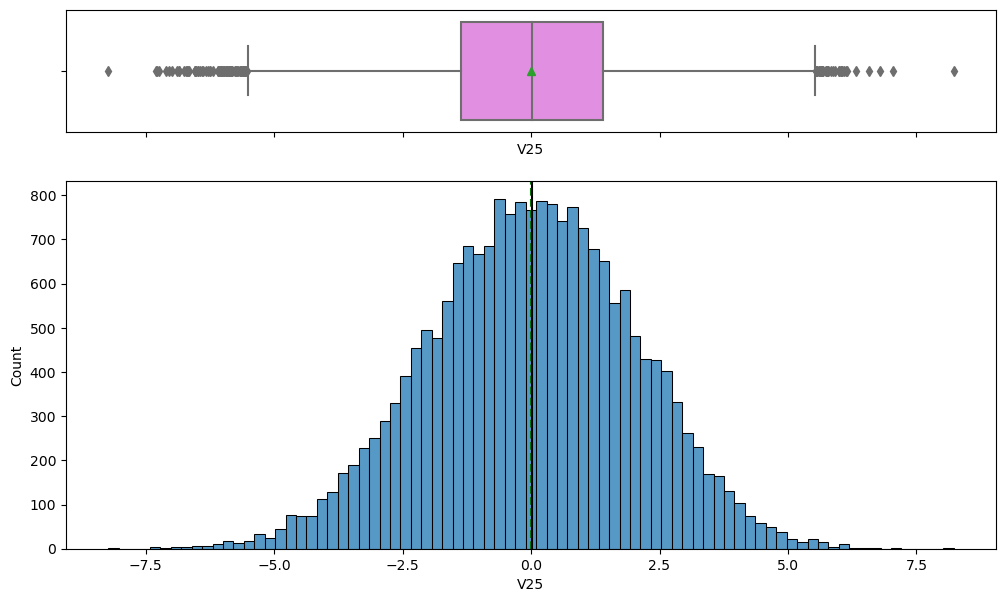

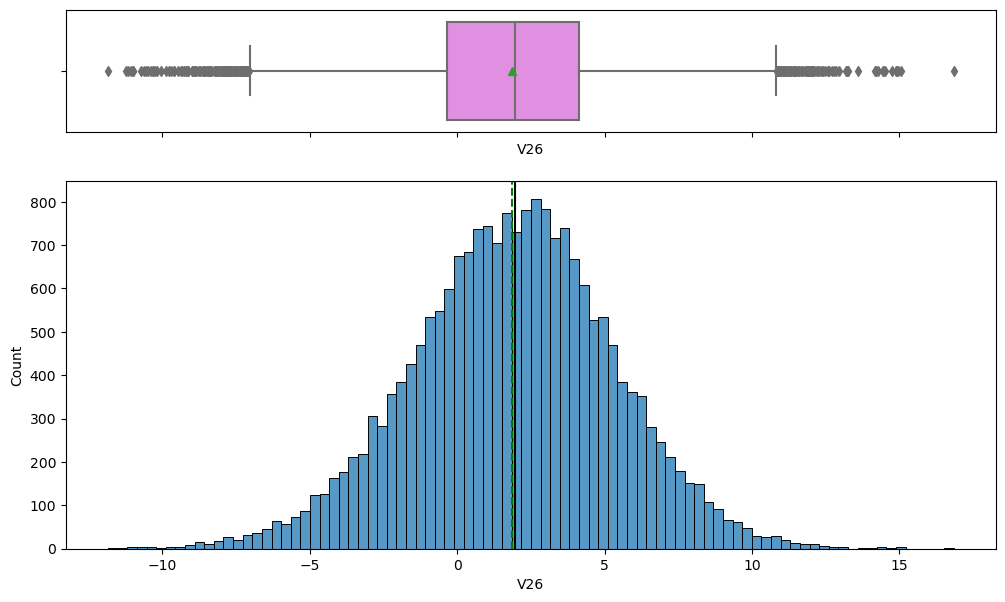

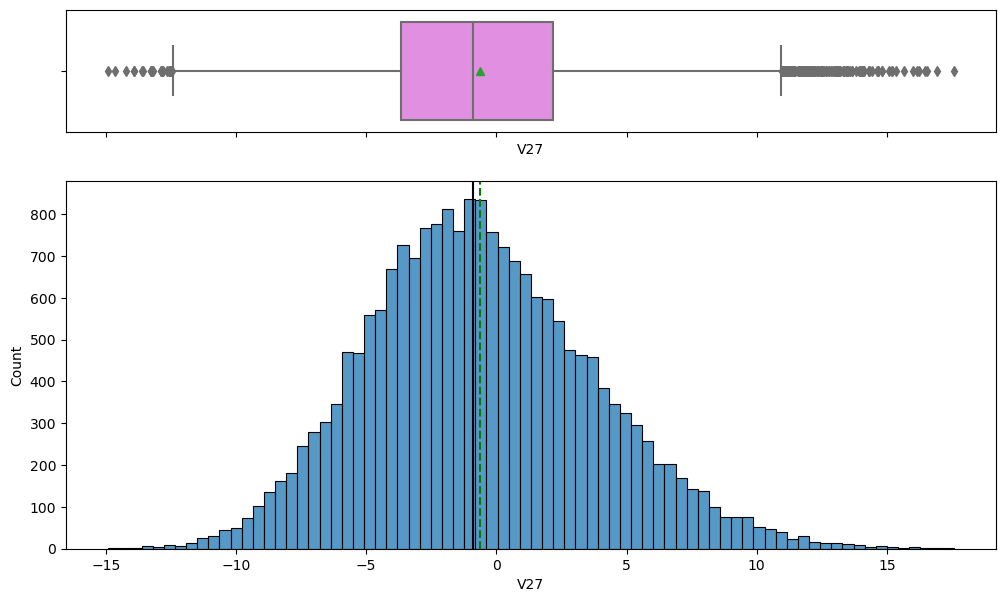

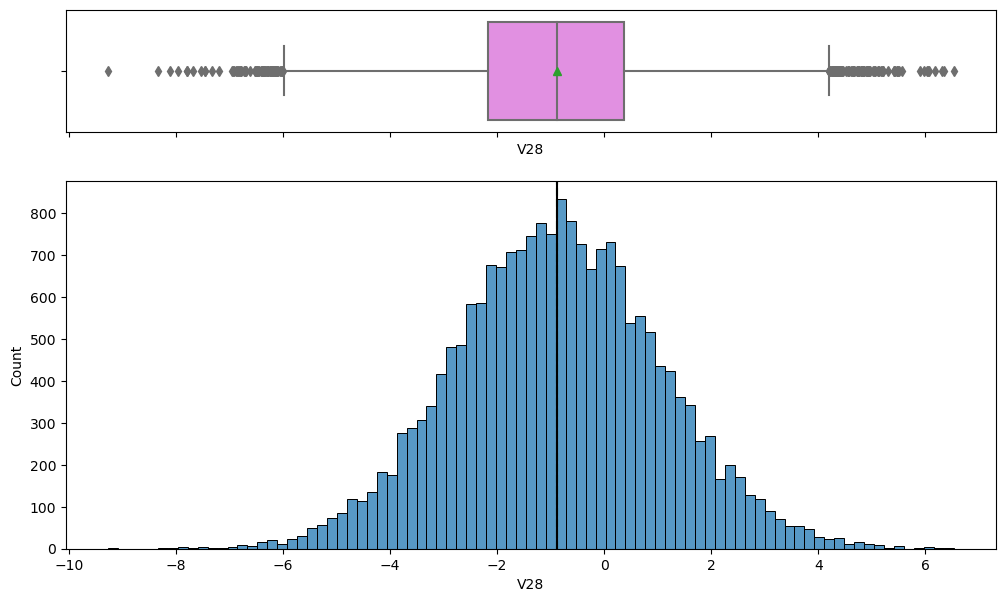

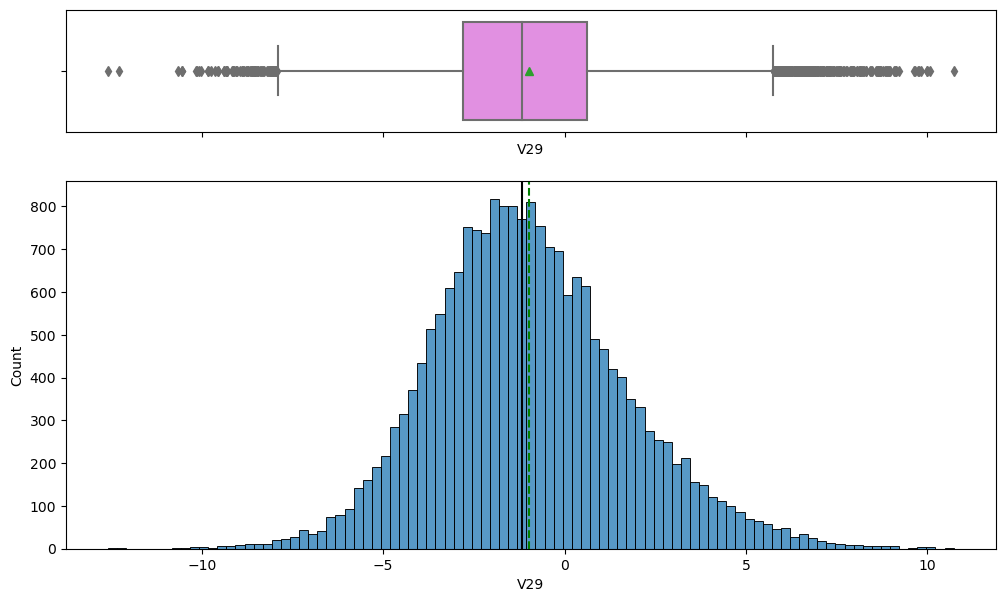

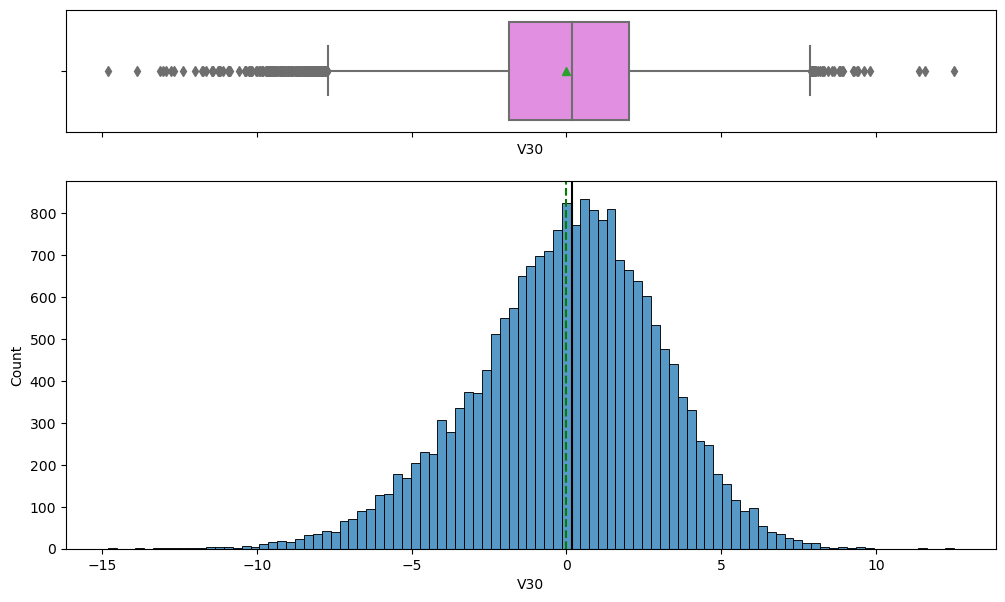

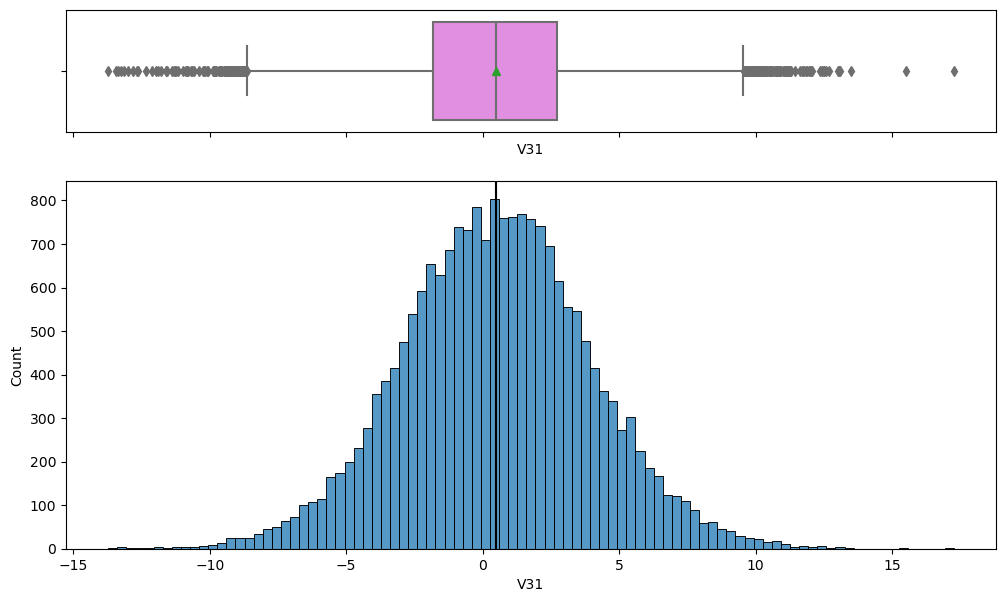

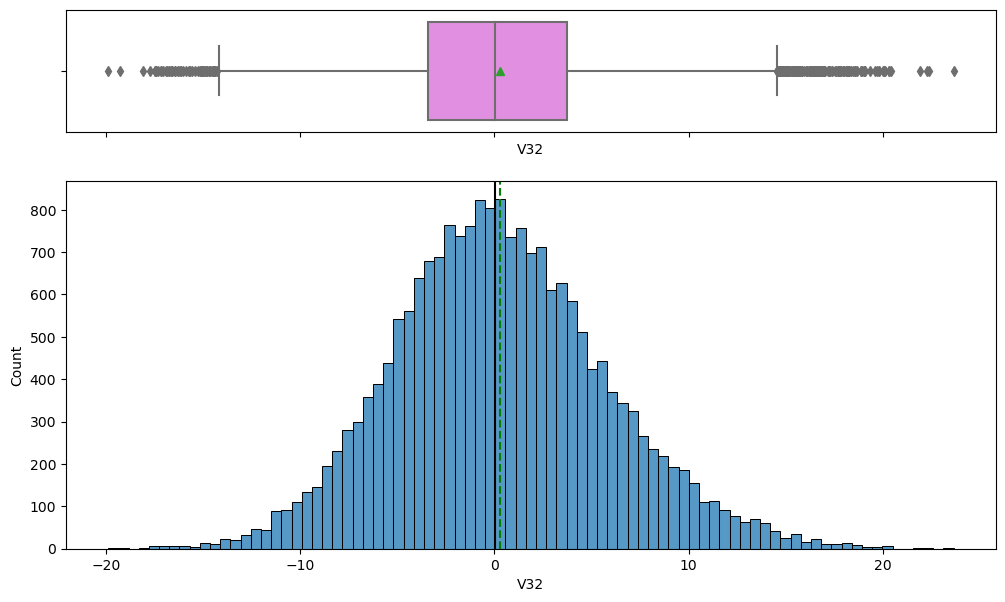

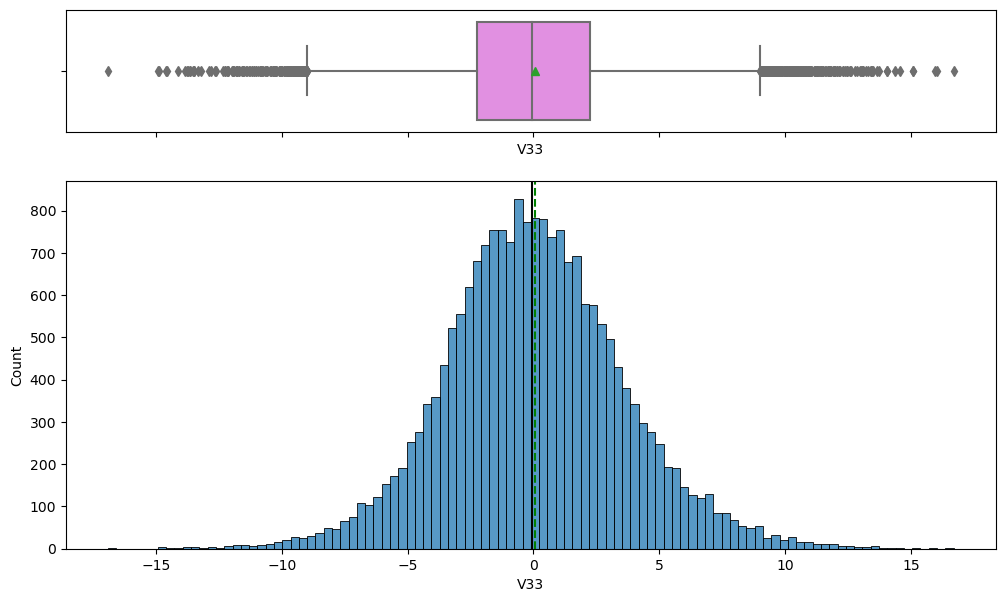

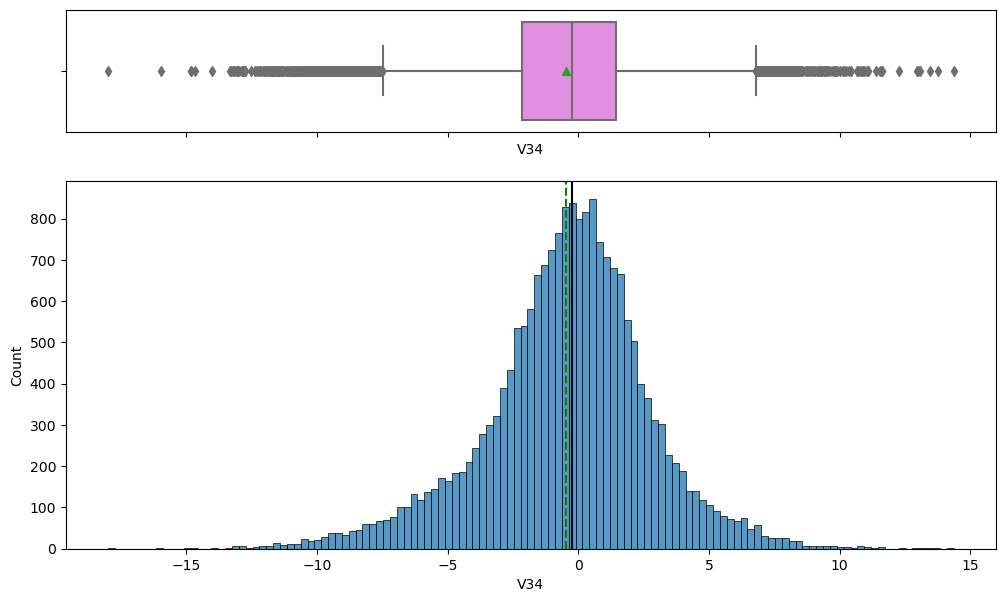

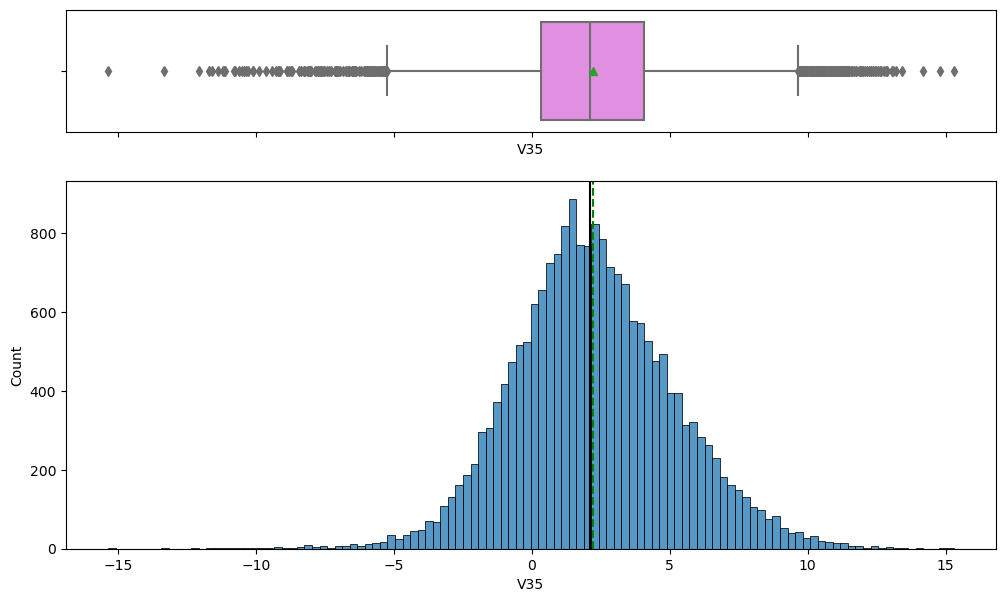

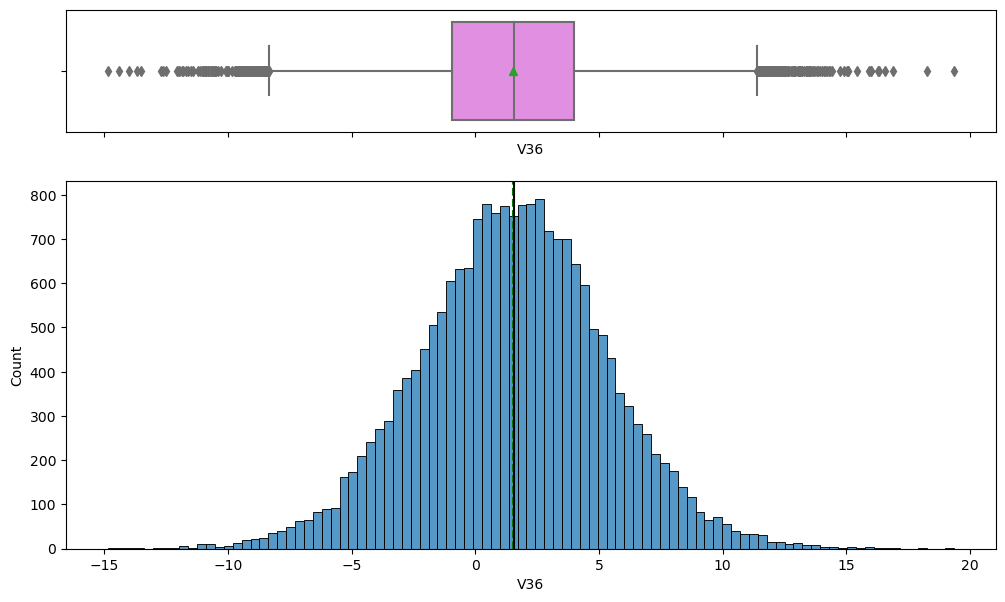

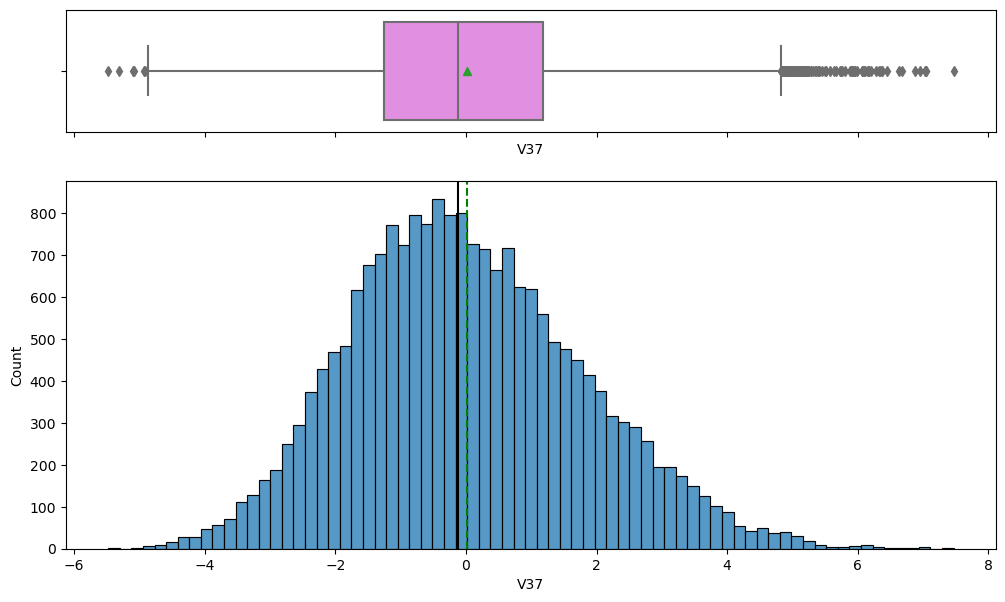

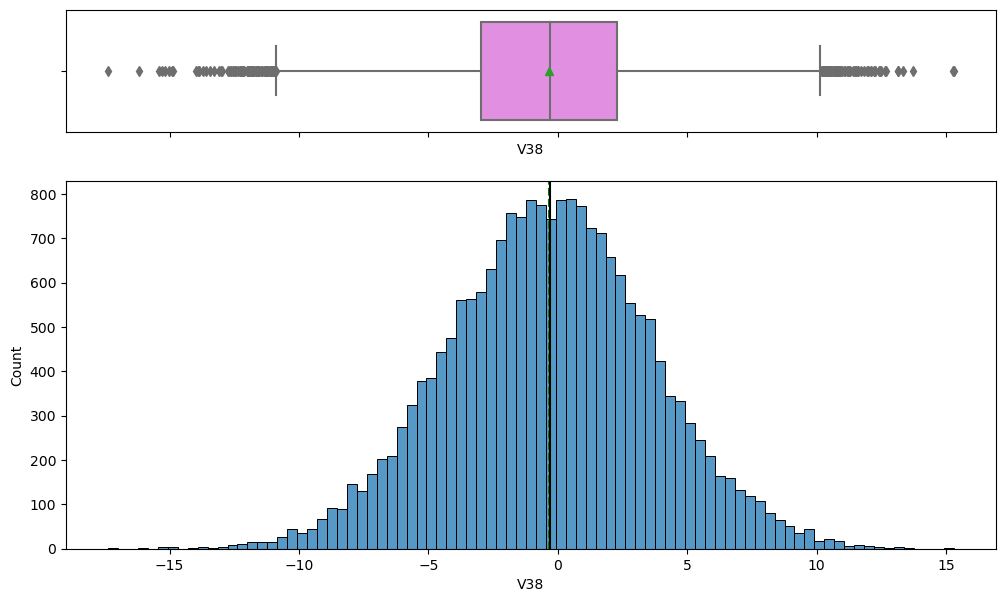

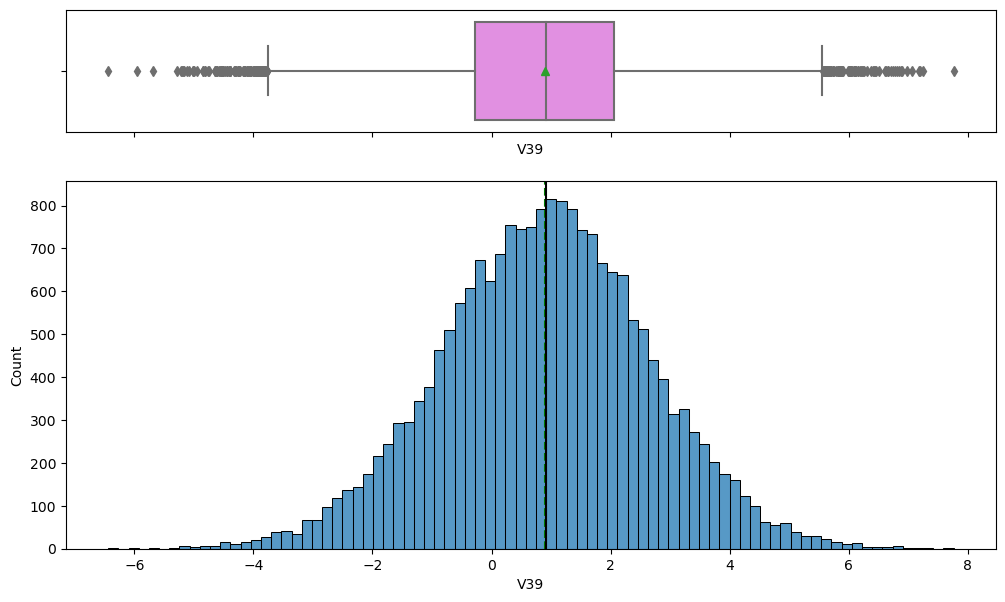

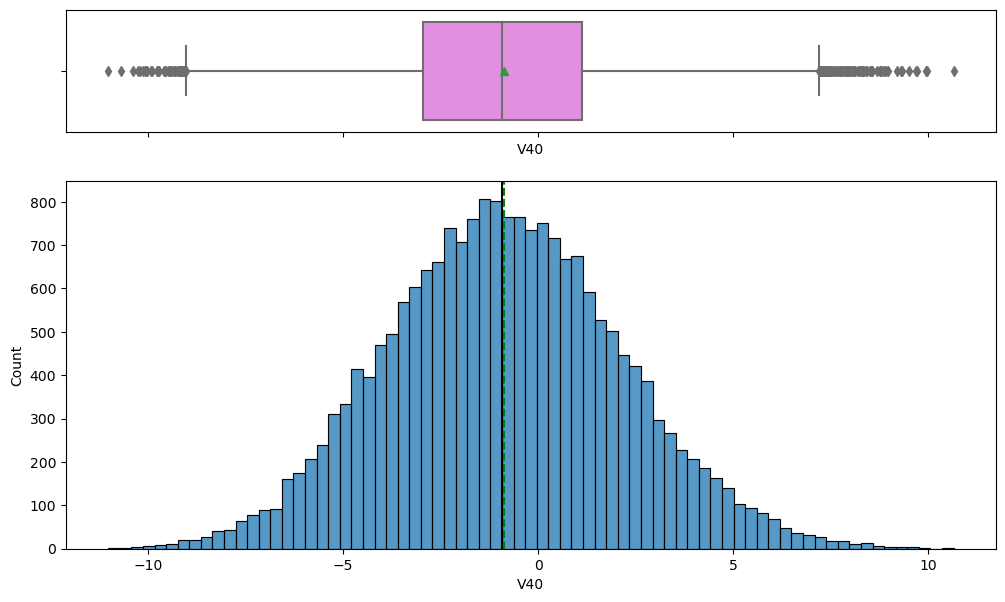

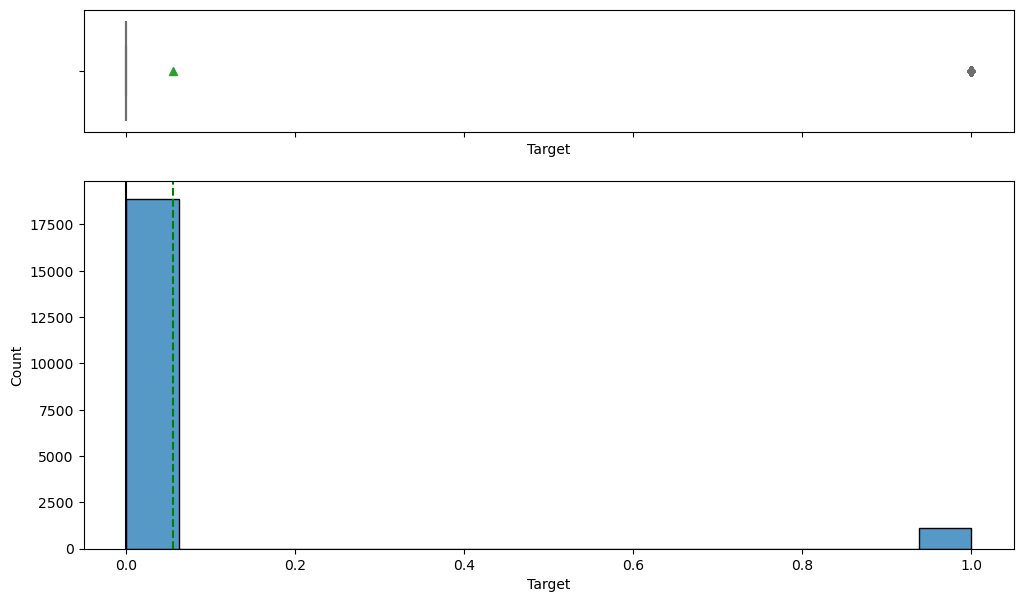

In [35]:
for feature in df.columns:
    
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data

***Observation***
- generator are Normally Distributed There are outliers both side of the whiskers 
- The most of the generator data lies at the center but very few of them are slightly skewed toward right and Left 


<Axes: >

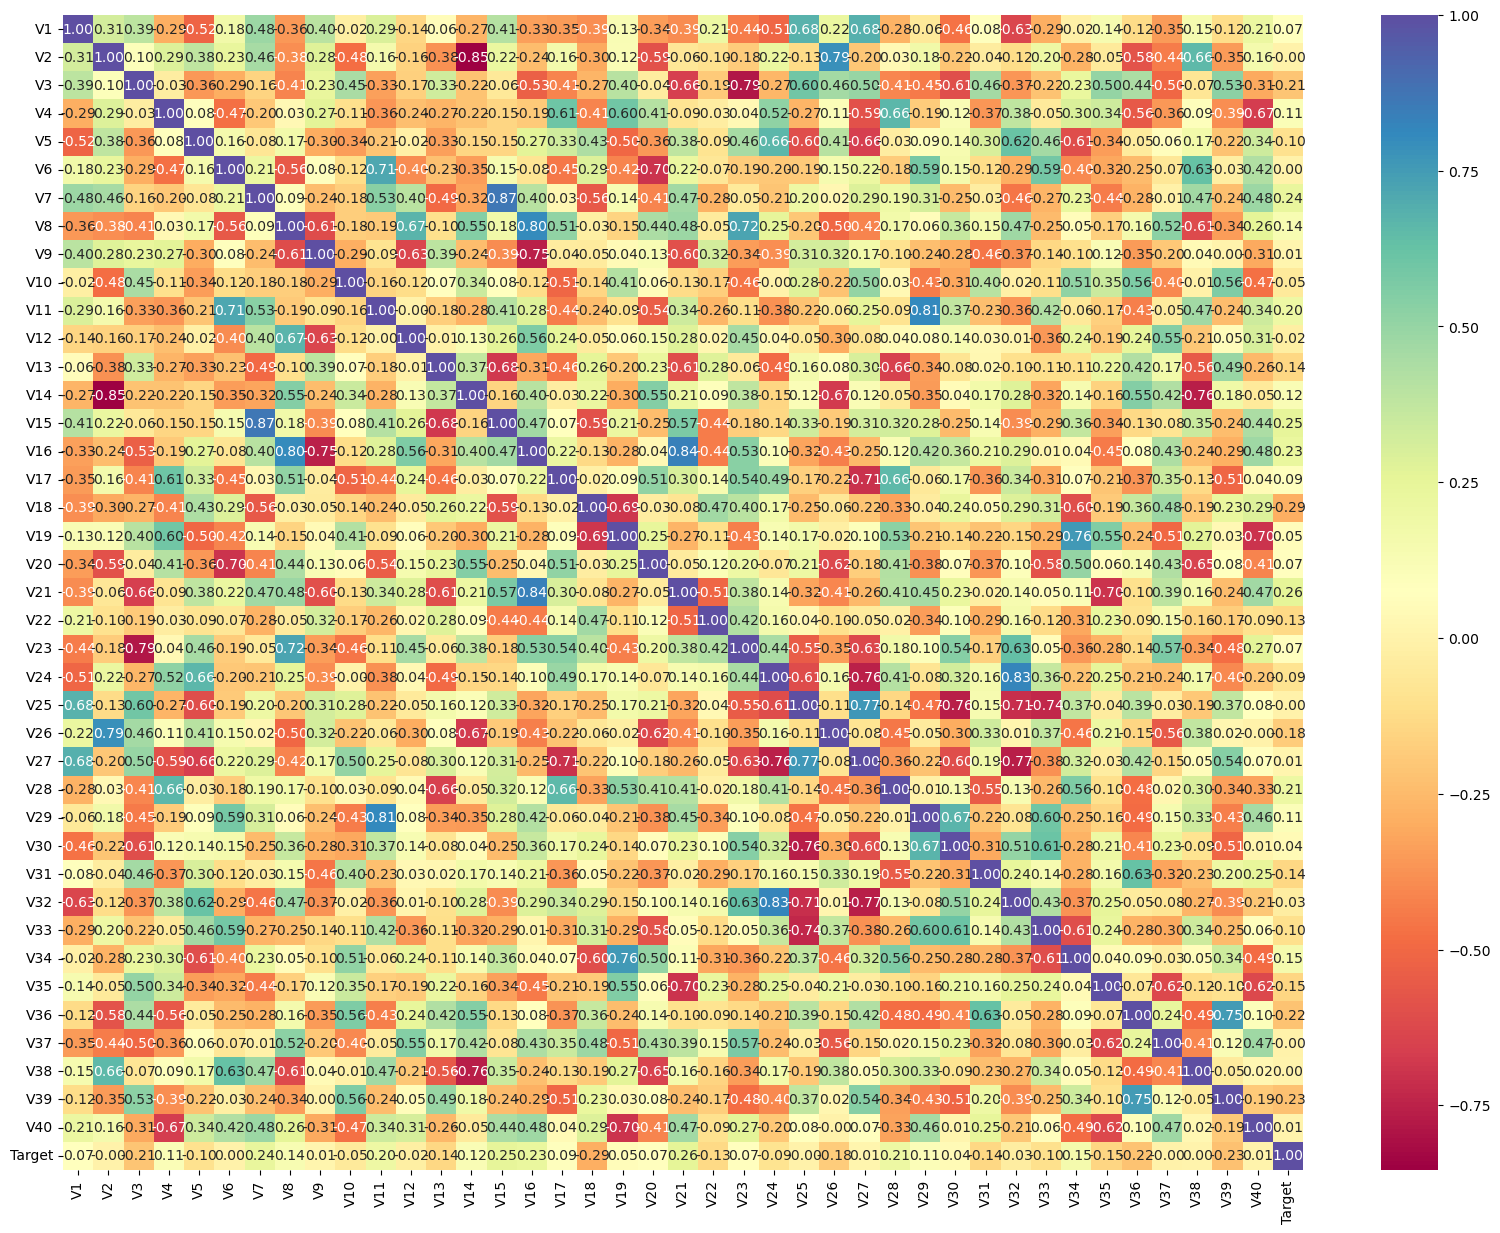

In [36]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f",cmap="Spectral")

***Observation***
- The generator failures the correction are high and some are negitive releated.
- Due to lack of the categorical variable the relation b/w generator failures cannot be determined.

## Data Pre-processing

In [37]:
ReneWind=df.copy()
X=ReneWind.drop("Target",axis=1)
Y=ReneWind["Target"]
x_temp,x_test,y_temp,y_test=train_test_split(X,Y,random_state=1,shuffle=True,stratify=Y,test_size=0.30)
x_train,x_val,y_train,y_val=train_test_split(x_temp,y_temp,random_state=1,shuffle=True,stratify=y_temp,test_size=0.25)
print(x_train.shape,x_val.shape,x_test.shape)
print(sum(y_train==1),":The Y_train 1 failure")
print(sum(y_train==0),":The Y_train 0 No failure")
print(sum(y_val==1),":The Y_val 1 failure")
print(sum(y_val==0),":The Y_val 0 No failure")
print(sum(y_test==1),":The Y_test 1 failure")
print(sum(y_test==0),":The Y_test 0 No failure")

(10500, 40) (3500, 40) (6000, 40)
583 :The Y_train 1 failure
9917 :The Y_train 0 No failure
194 :The Y_val 1 failure
3306 :The Y_val 0 No failure
333 :The Y_test 1 failure
5667 :The Y_test 0 No failure


In [38]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

In [39]:
x_numeric

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40'],
      dtype='object')

In [40]:
x_train=treat_outliers(x_train,"V1")
x_train=treat_outliers(x_train,"V2")
x_train=treat_outliers(x_train,"V3")
x_train=treat_outliers(x_train,"V4")
x_train=treat_outliers(x_train,"V5")
x_train=treat_outliers(x_train,"V6")
x_train=treat_outliers(x_train,"V7")
x_train=treat_outliers(x_train,"V8")
x_train=treat_outliers(x_train,"V9")
x_train=treat_outliers(x_train,"V10")
x_train=treat_outliers(x_train,"V11")
x_train=treat_outliers(x_train,"V12")
x_train=treat_outliers(x_train,"V13")
x_train=treat_outliers(x_train,"V14")
x_train=treat_outliers(x_train,"V15")
x_train=treat_outliers(x_train,"V16")
x_train=treat_outliers(x_train,"V17")
x_train=treat_outliers(x_train,"V18")
x_train=treat_outliers(x_train,"V19")
x_train=treat_outliers(x_train,"V20")
x_train=treat_outliers(x_train,"V21")
x_train=treat_outliers(x_train,"V22")
x_train=treat_outliers(x_train,"V23")
x_train=treat_outliers(x_train,"V24")
x_train=treat_outliers(x_train,"V25")
x_train=treat_outliers(x_train,"V26")
x_train=treat_outliers(x_train,"V27")
x_train=treat_outliers(x_train,"V28")
x_train=treat_outliers(x_train,"V29")
x_train=treat_outliers(x_train,"V30")
x_train=treat_outliers(x_train,"V31")
x_train=treat_outliers(x_train,"V32")
x_train=treat_outliers(x_train,"V33")
x_train=treat_outliers(x_train,"V34")
x_train=treat_outliers(x_train,"V35")
x_train=treat_outliers(x_train,"V36")
x_train=treat_outliers(x_train,"V37")
x_train=treat_outliers(x_train,"V38")
x_train=treat_outliers(x_train,"V39")
x_train=treat_outliers(x_train,"V40")

## Missing value imputation




In [41]:
impu = SimpleImputer(missing_values=np.nan,strategy="median")
x_train=pd.DataFrame(impu.fit_transform(x_train),columns=x_train.columns)
x_val=pd.DataFrame(impu.transform(x_val),columns=x_val.columns)
x_test=pd.DataFrame(impu.transform(x_test),columns=x_test.columns)

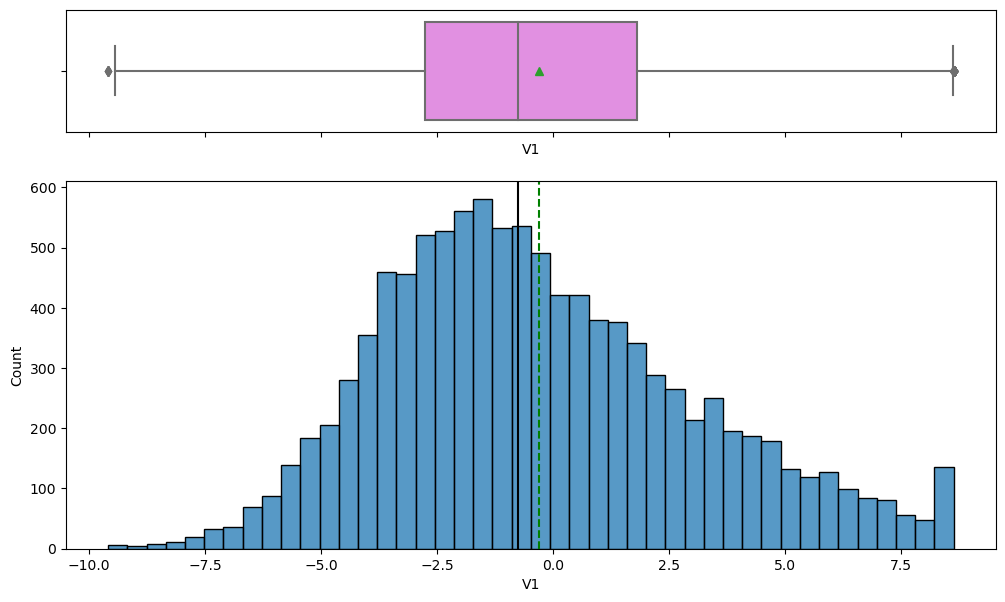

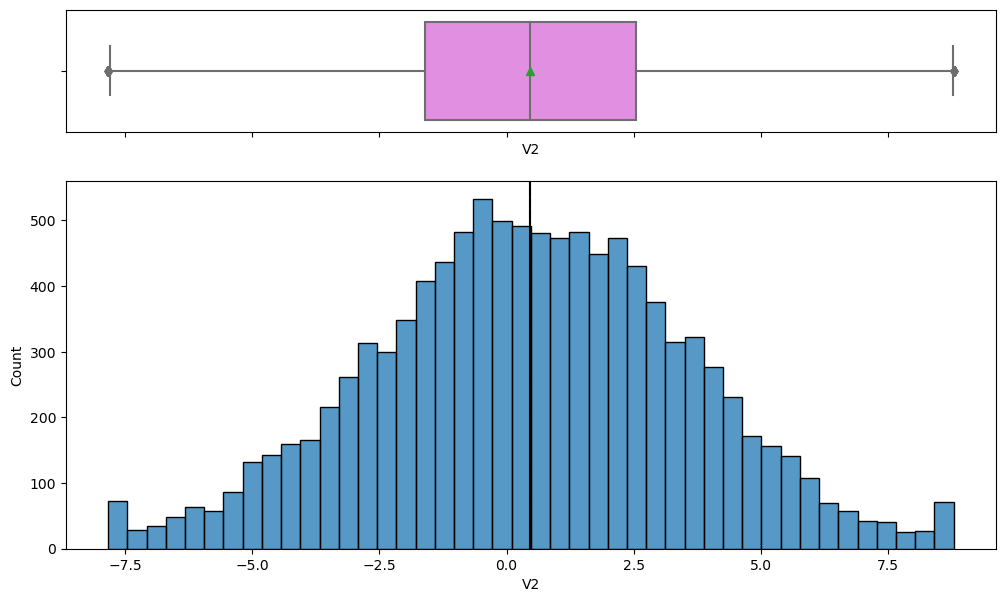

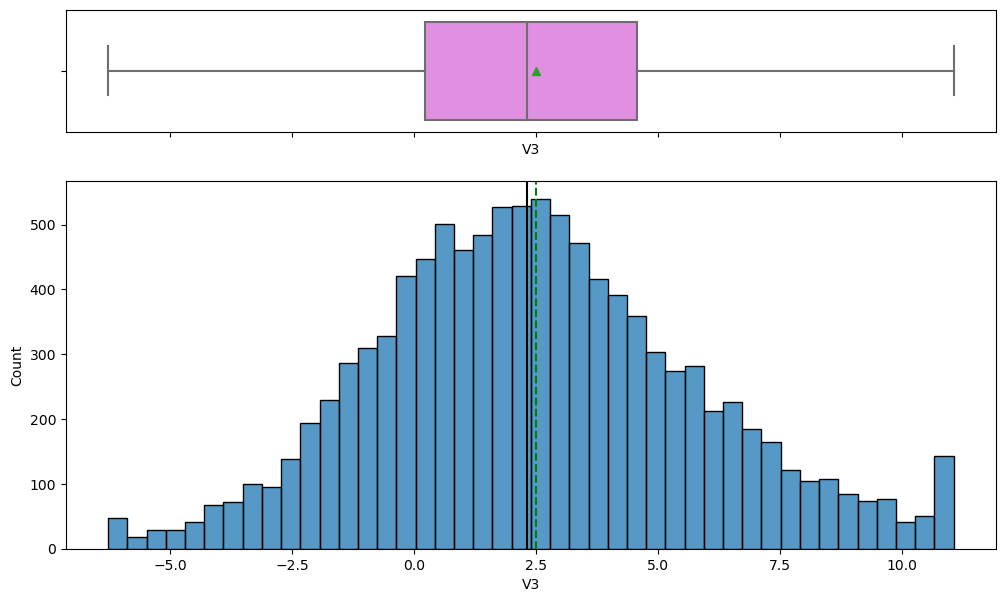

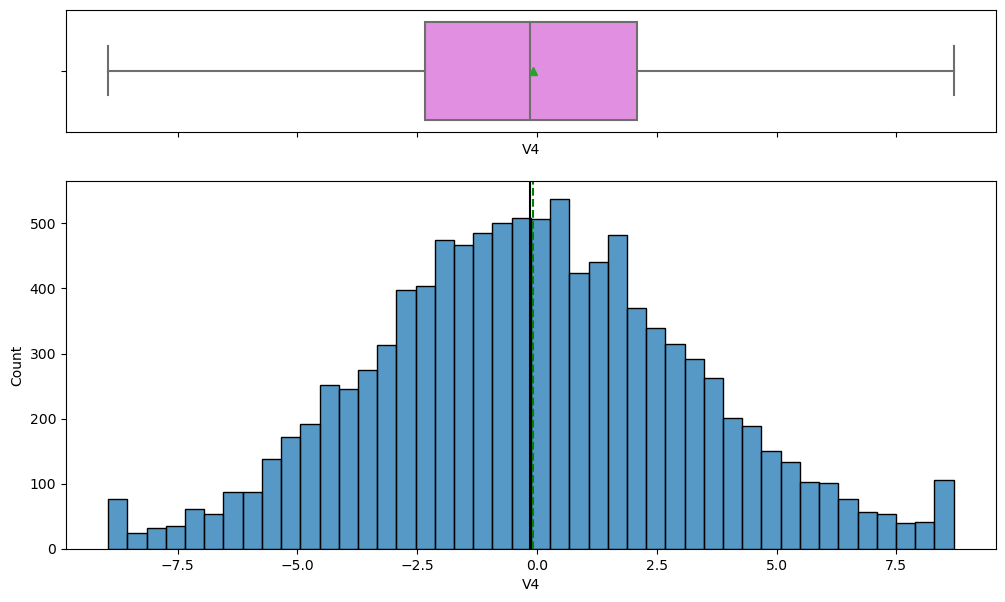

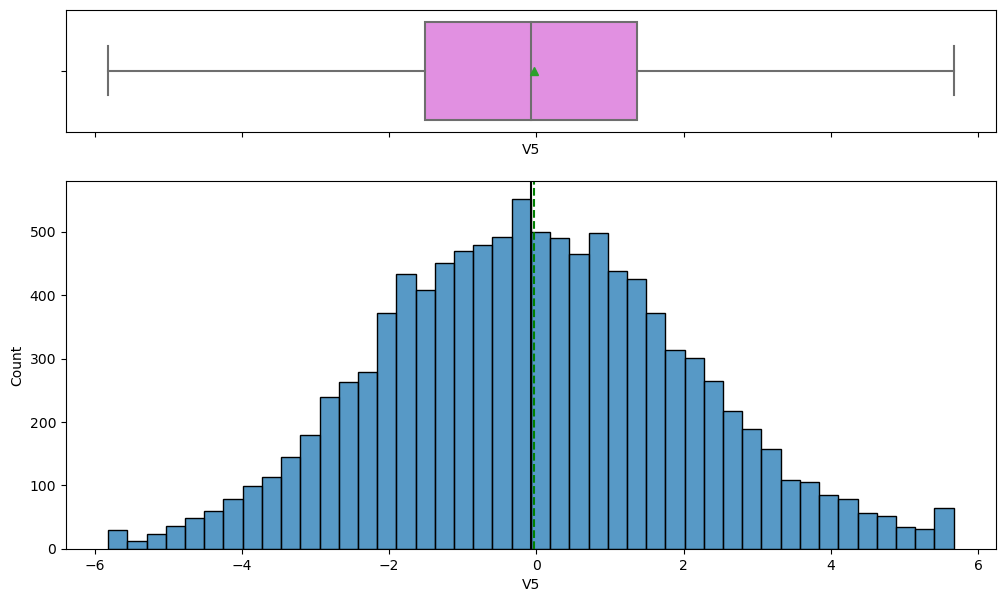

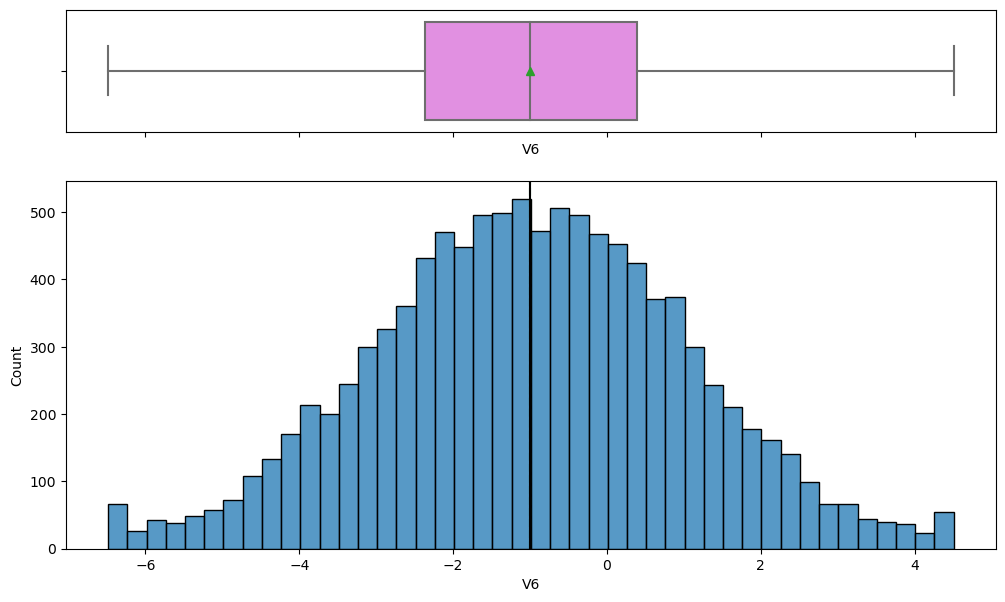

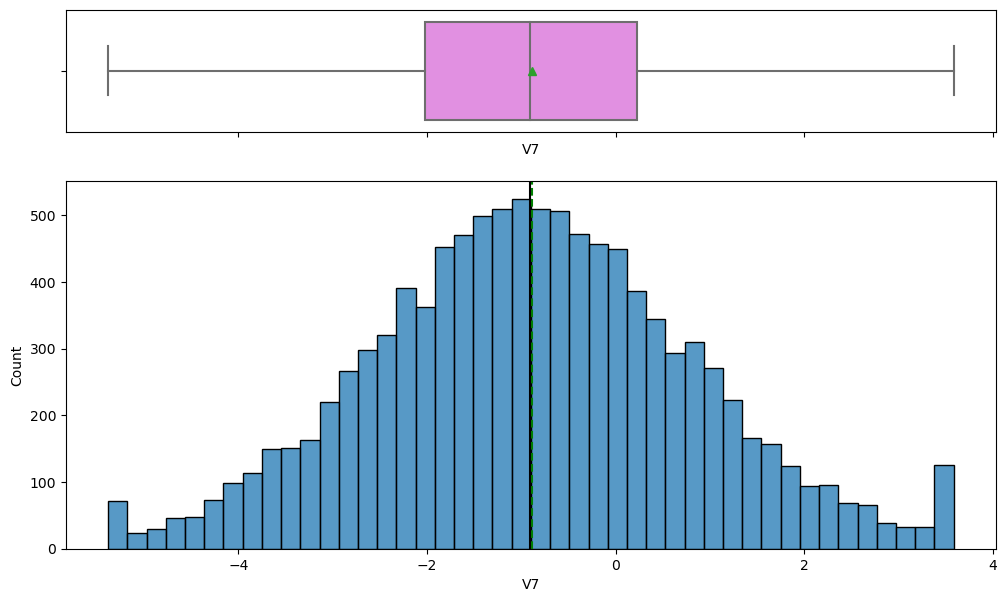

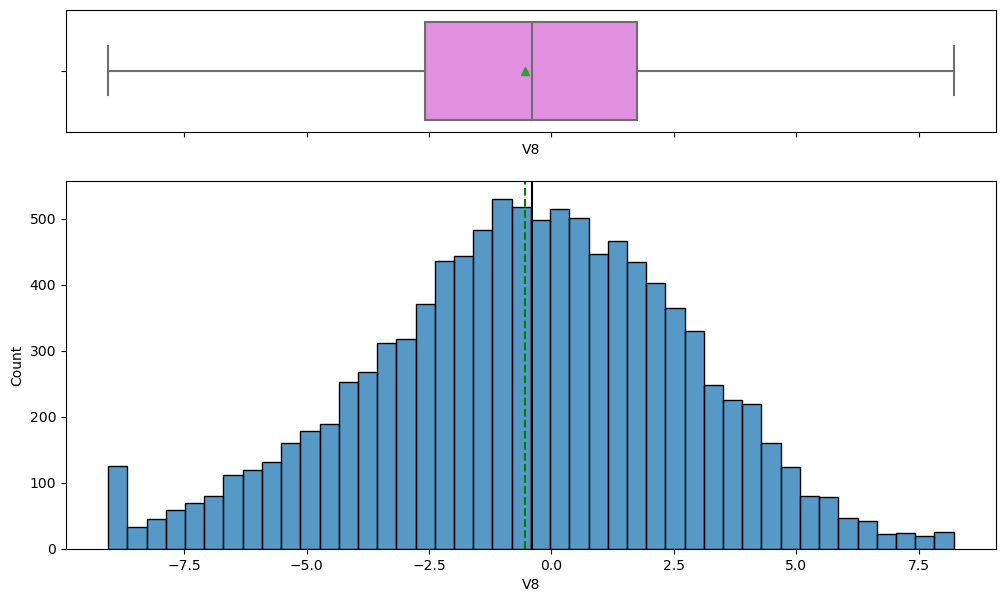

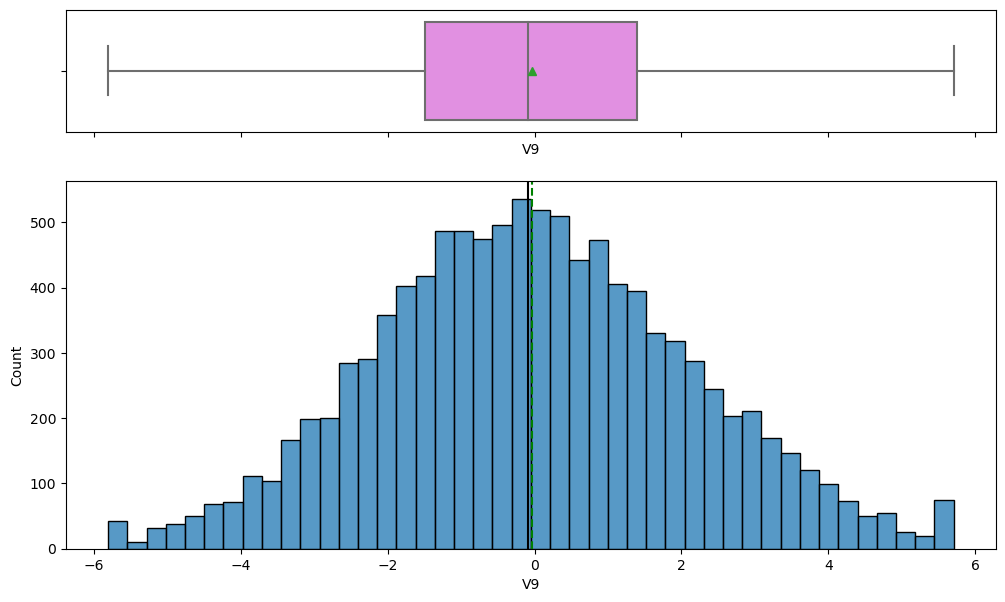

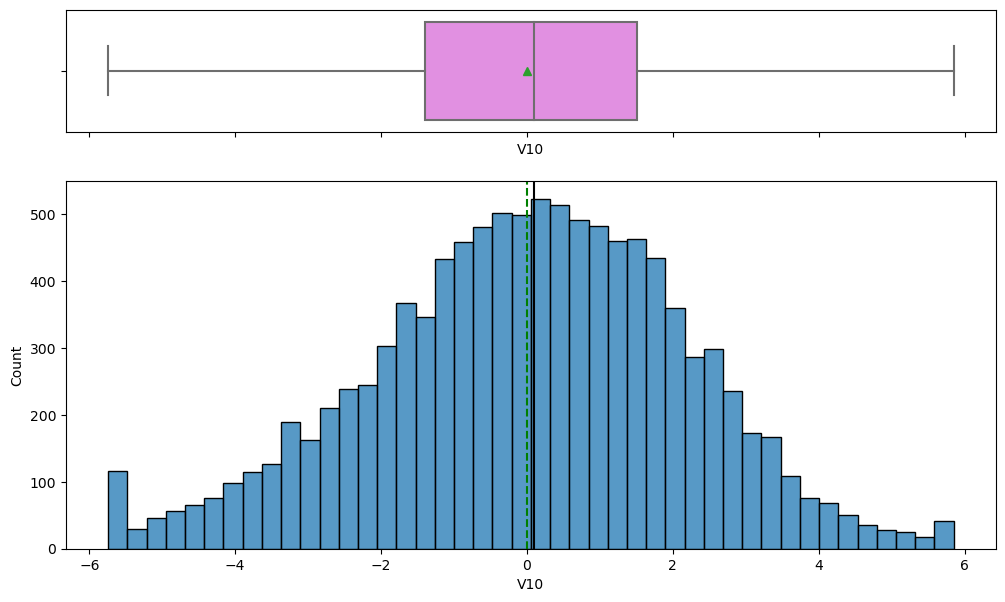

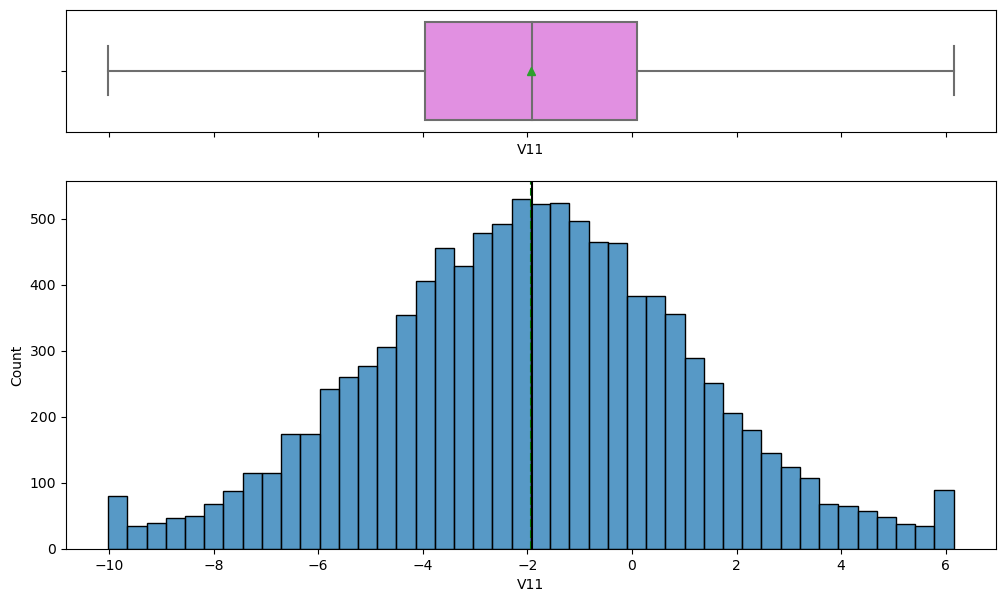

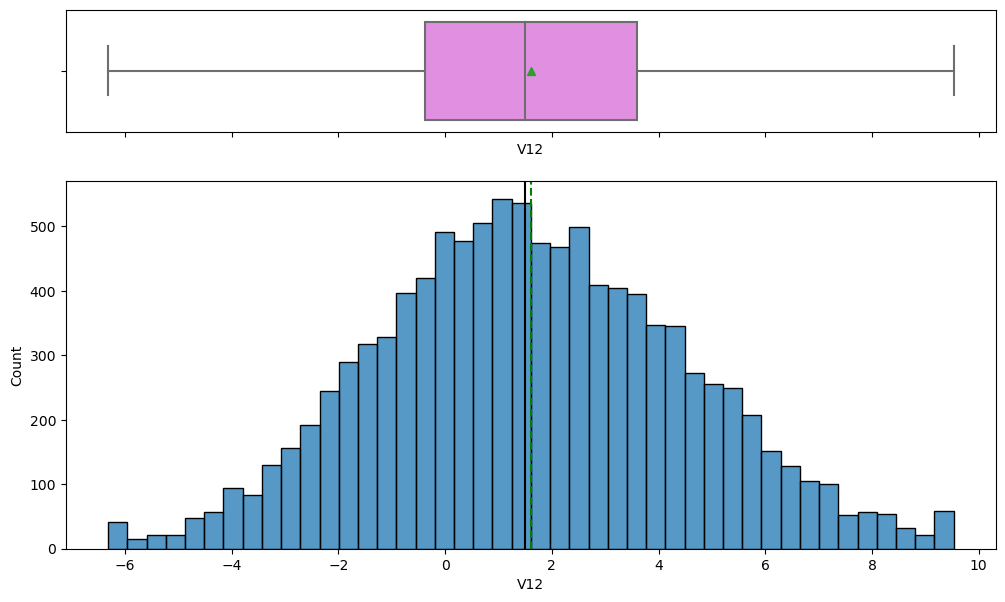

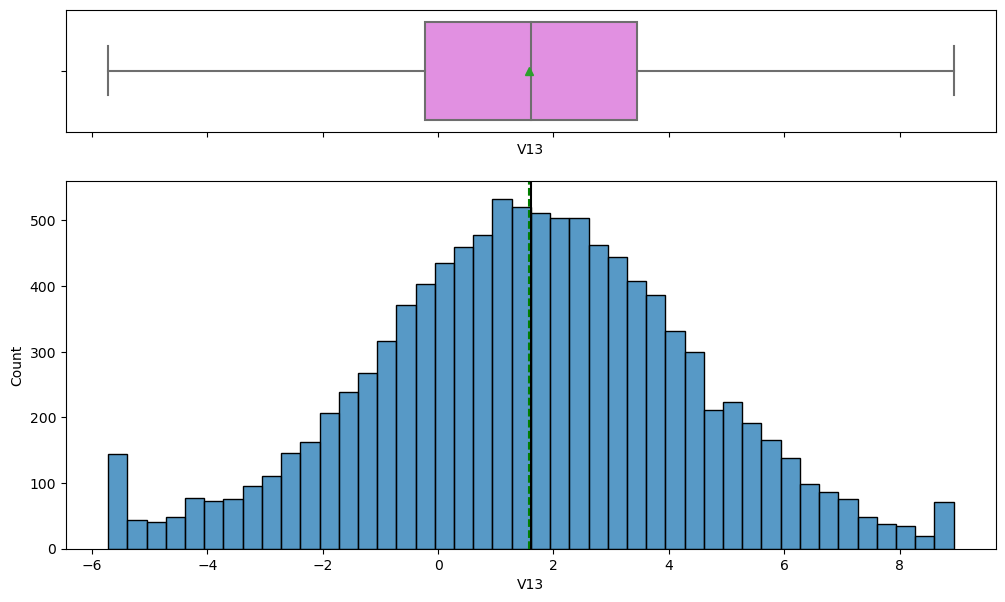

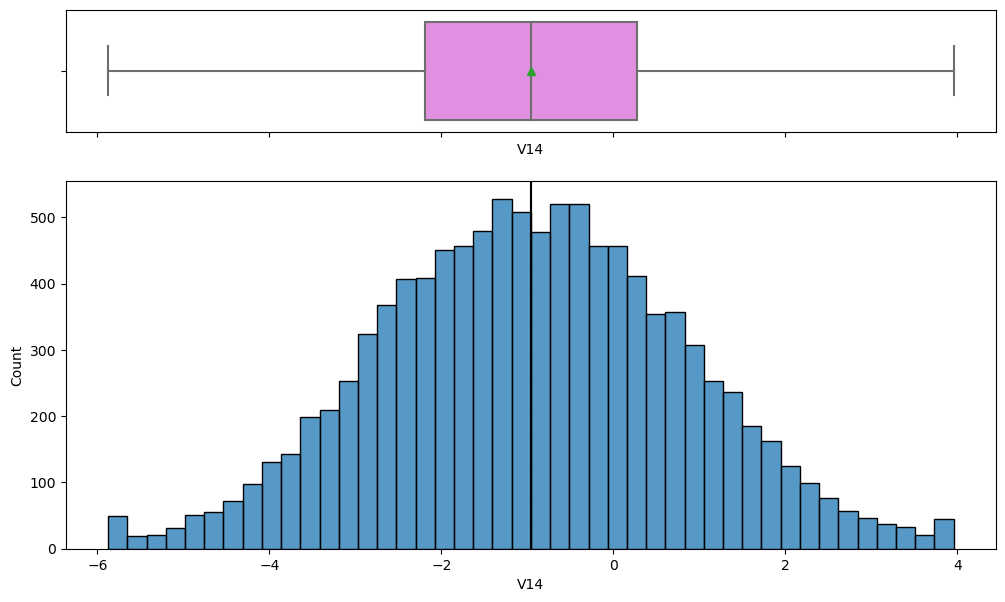

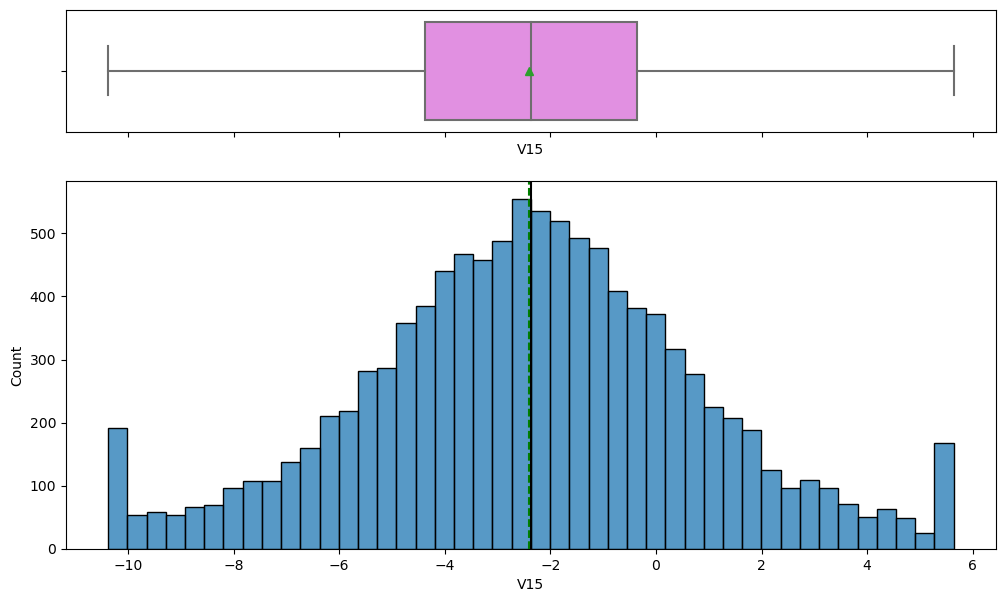

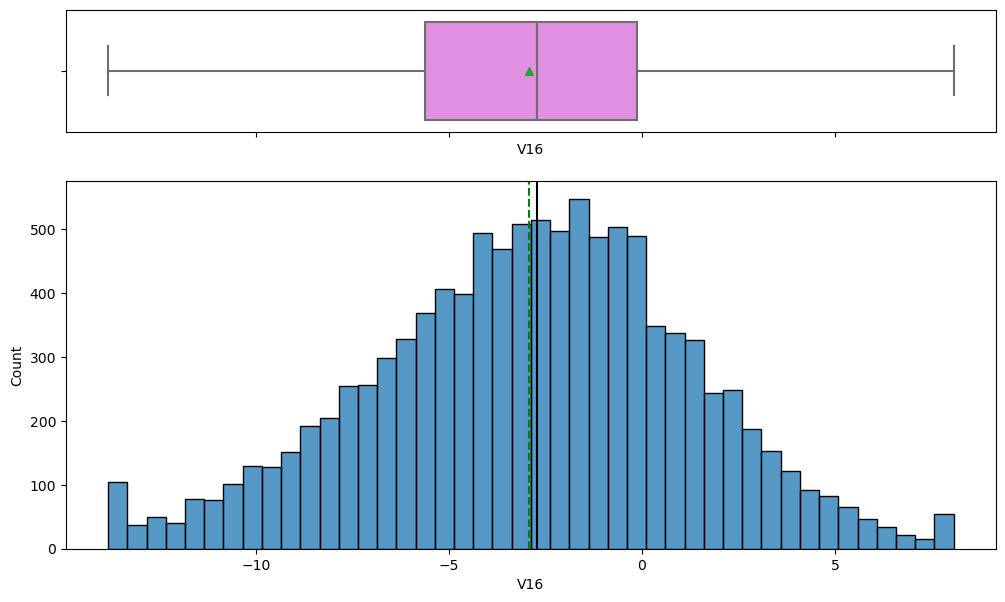

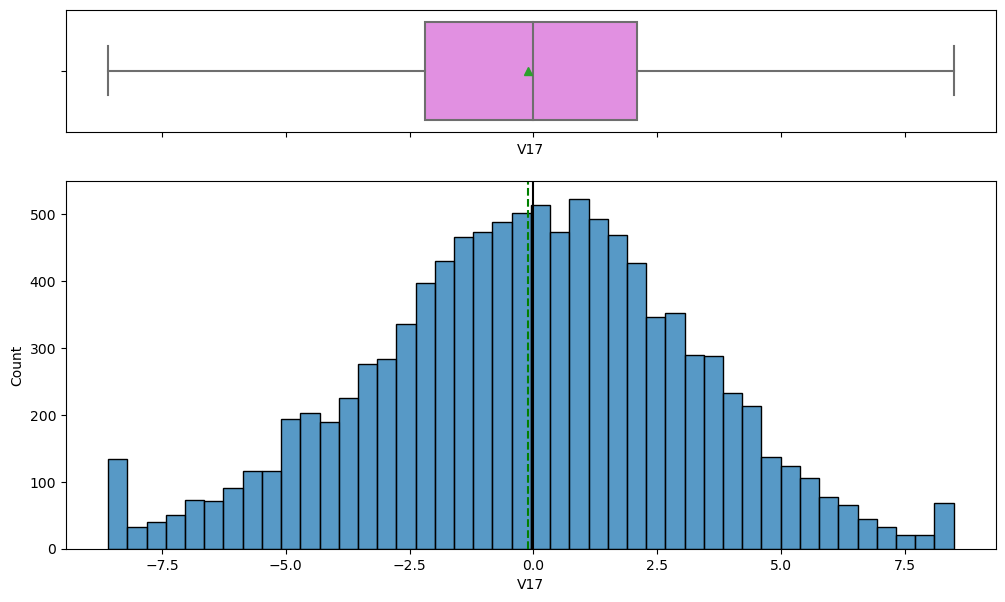

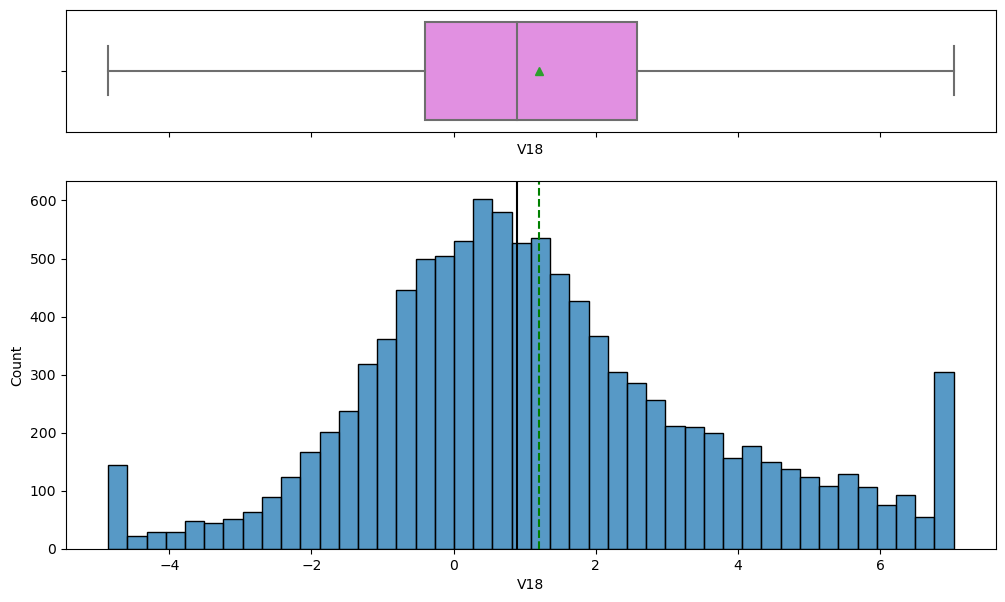

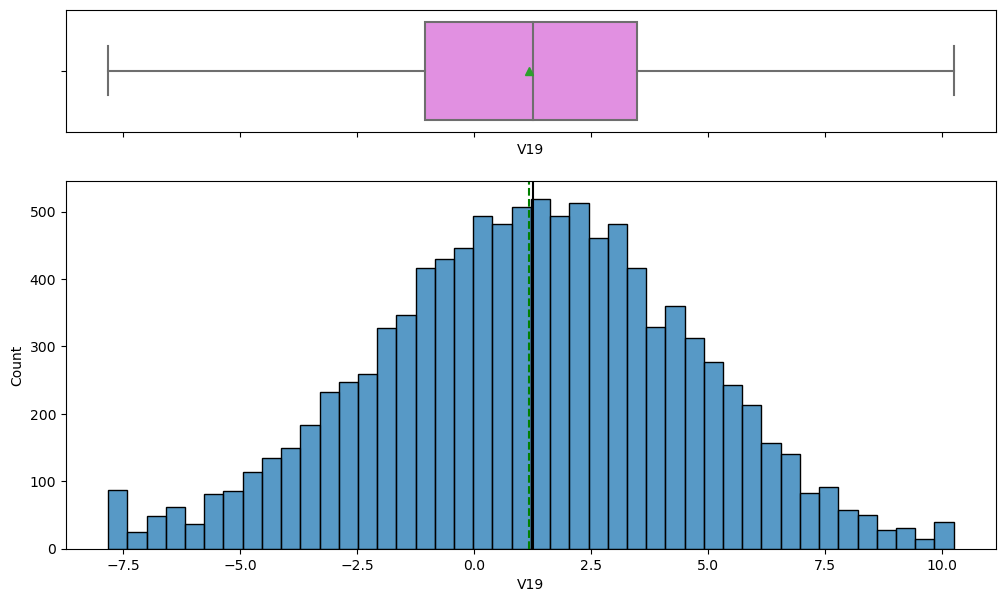

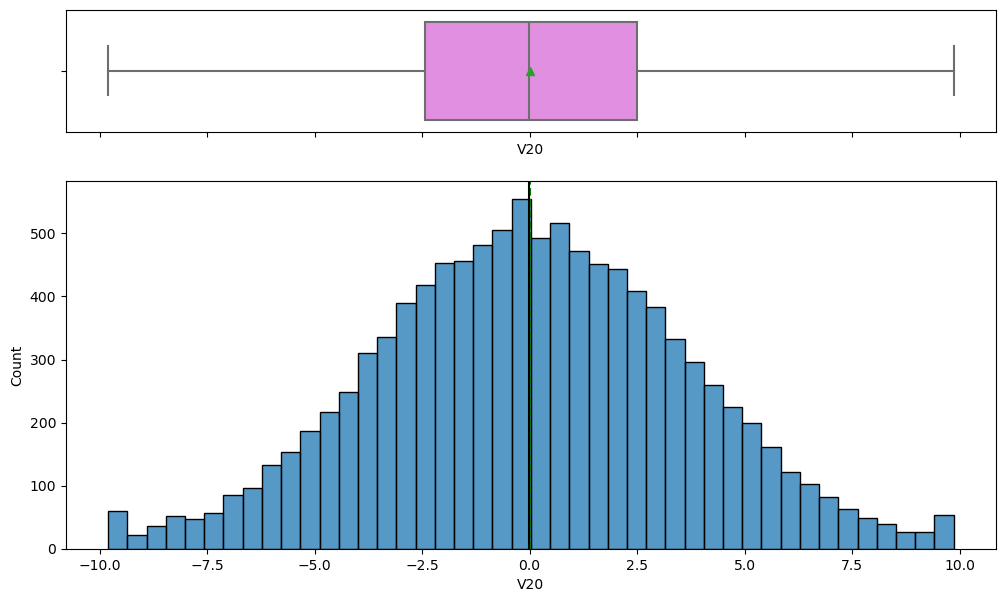

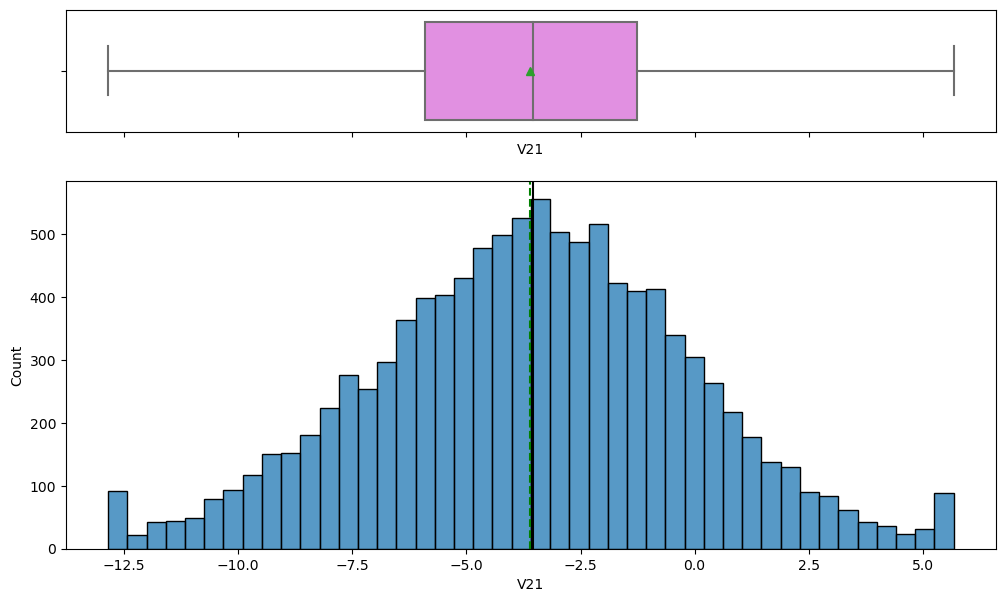

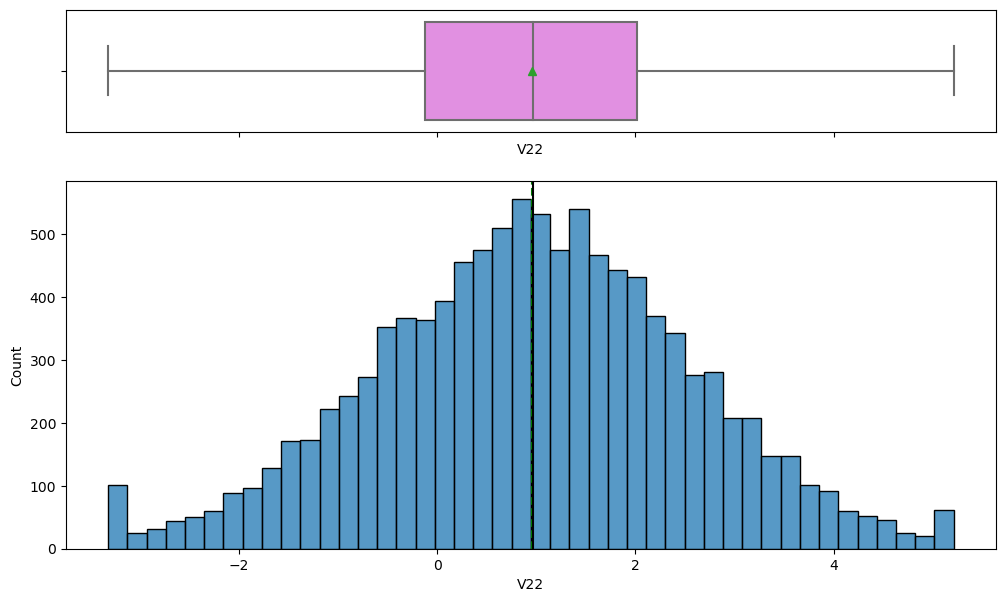

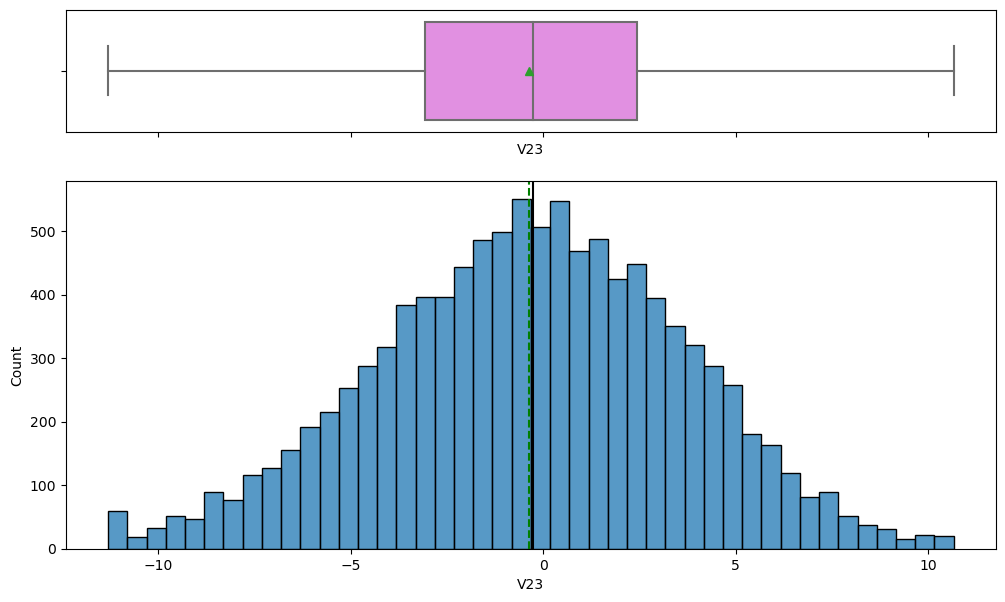

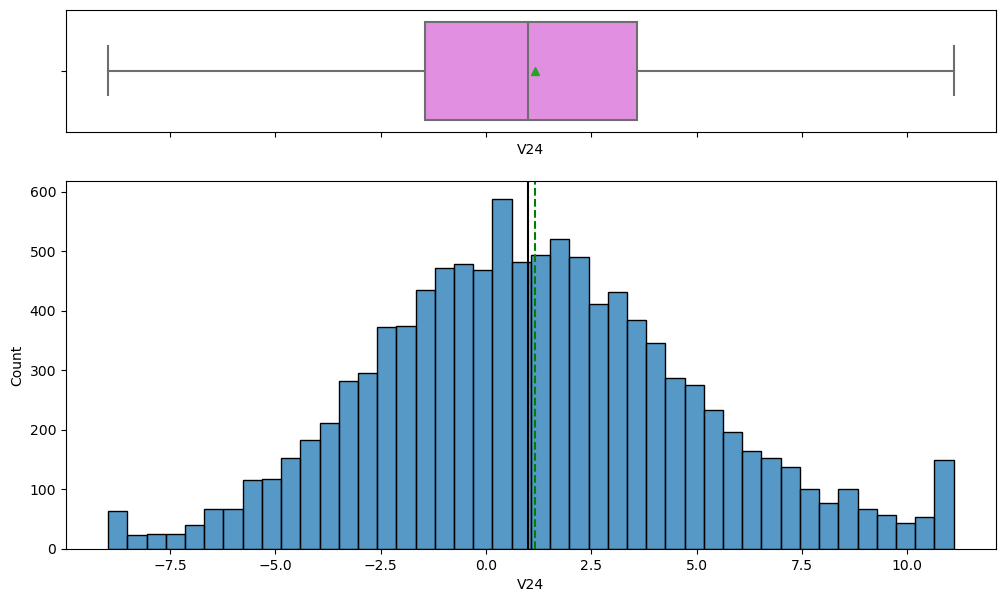

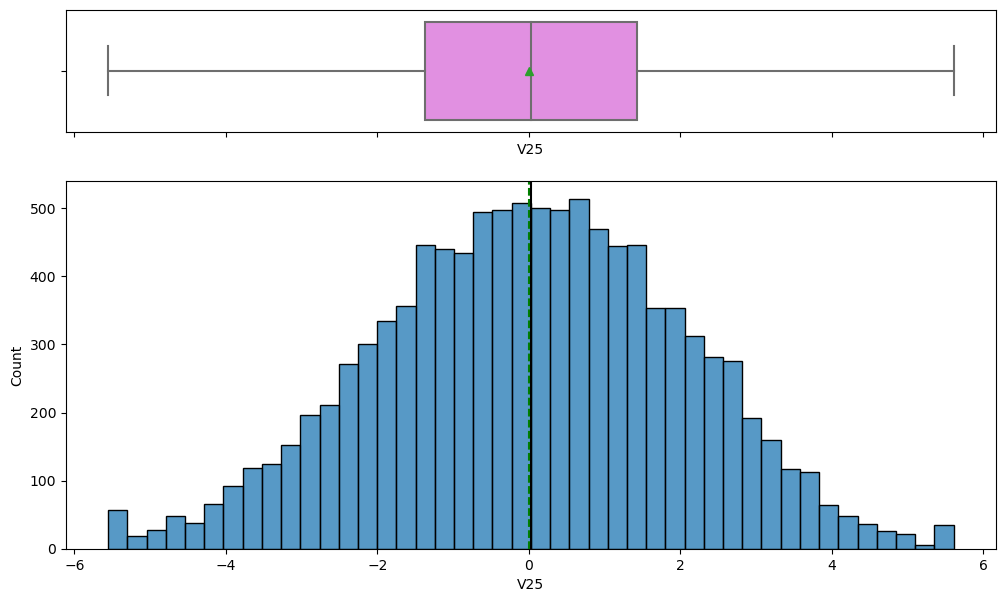

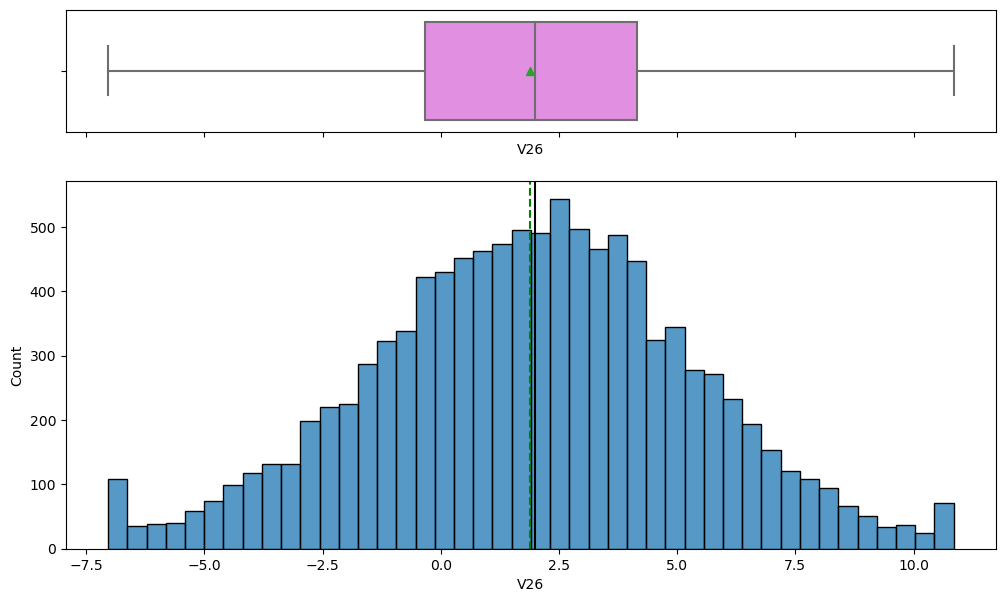

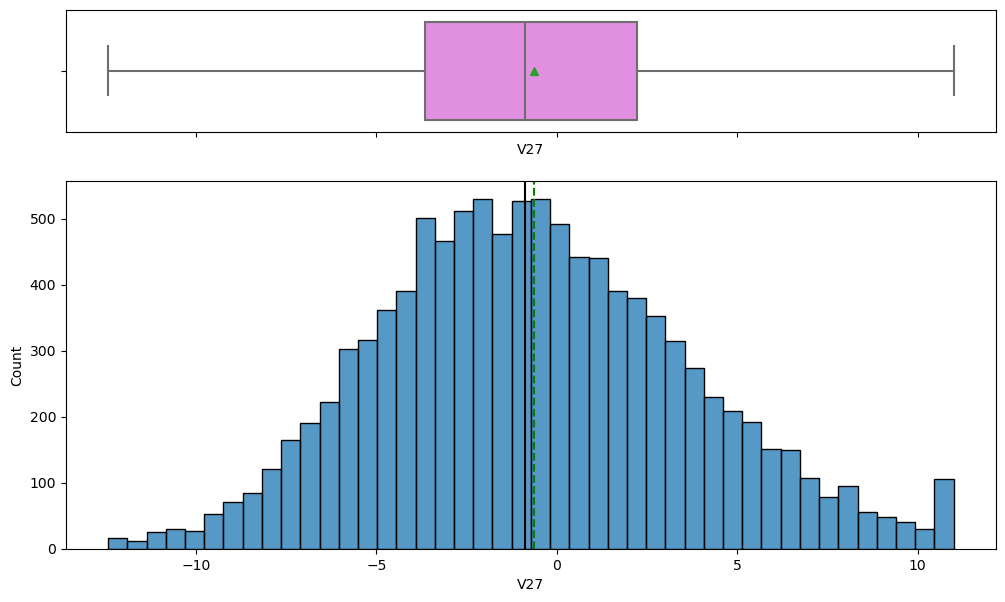

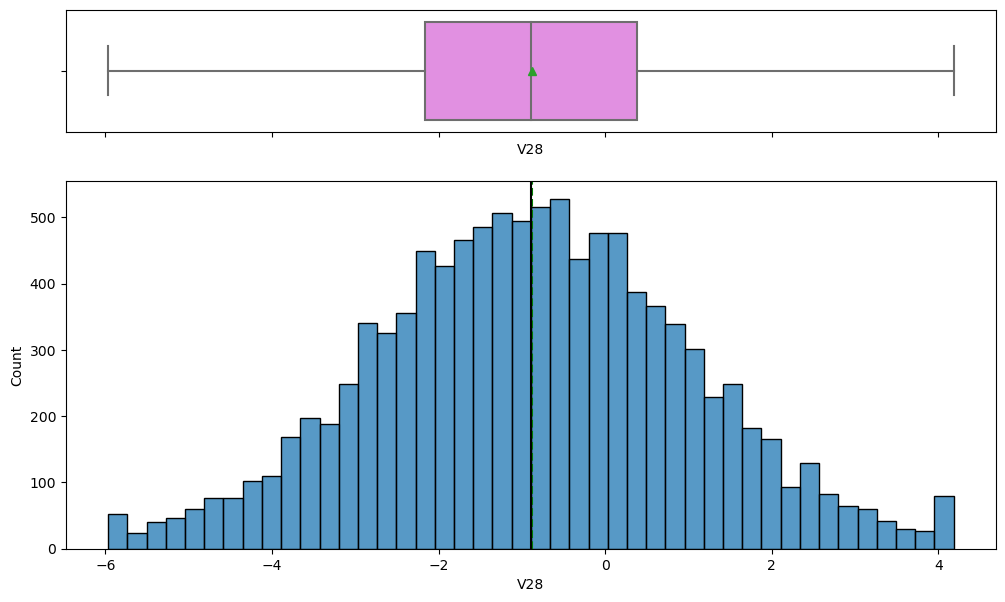

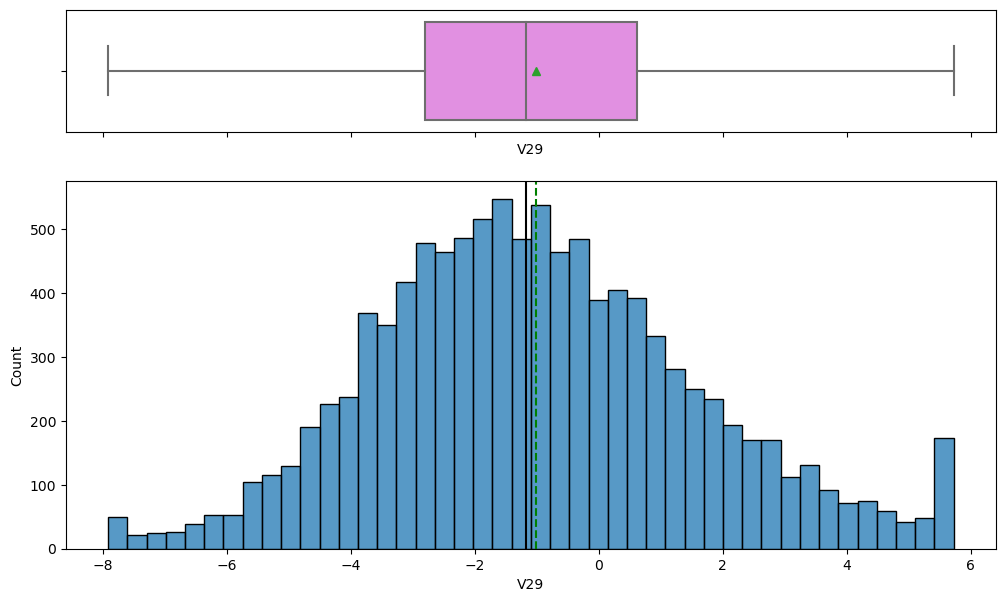

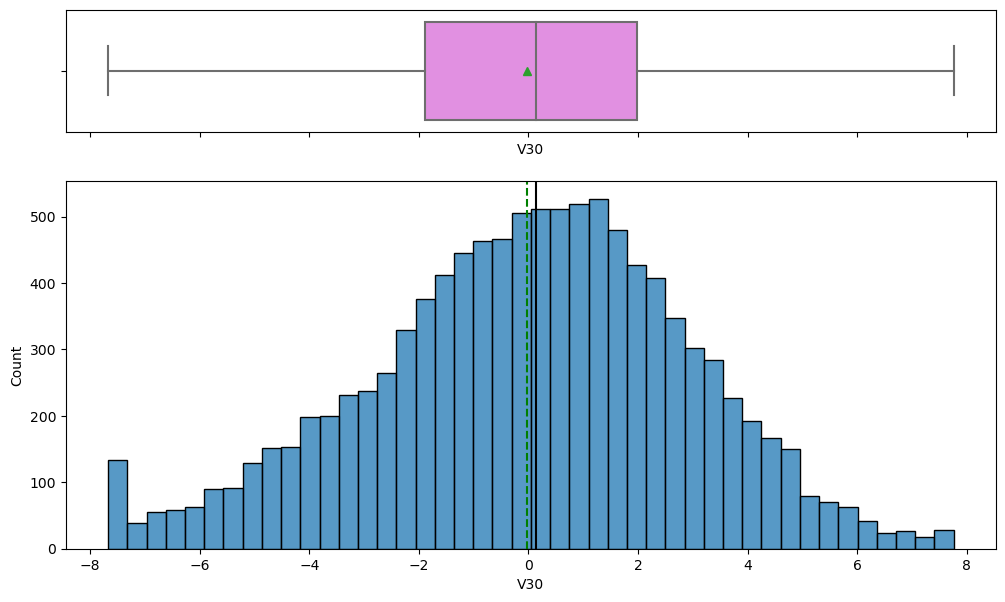

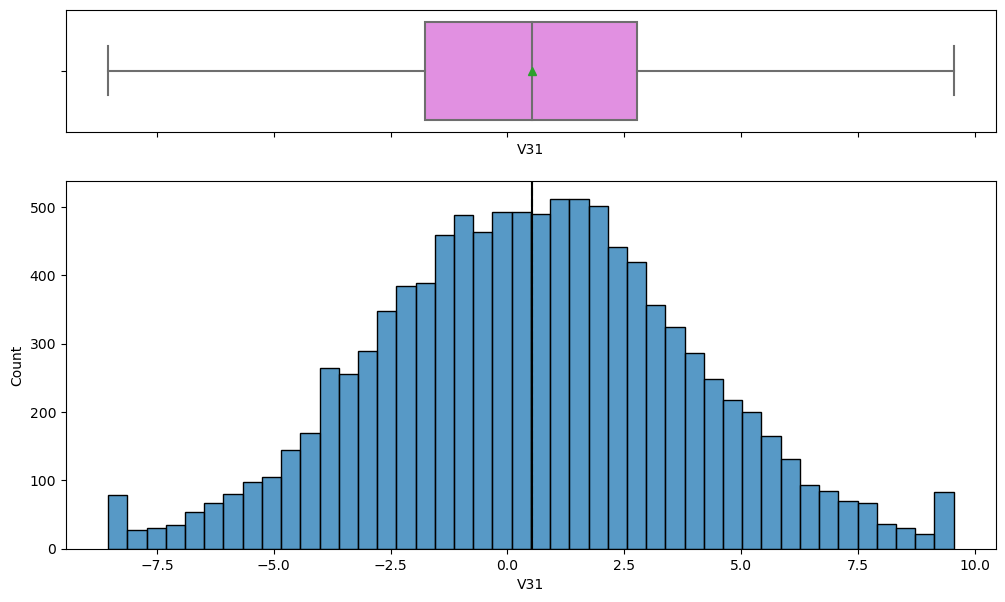

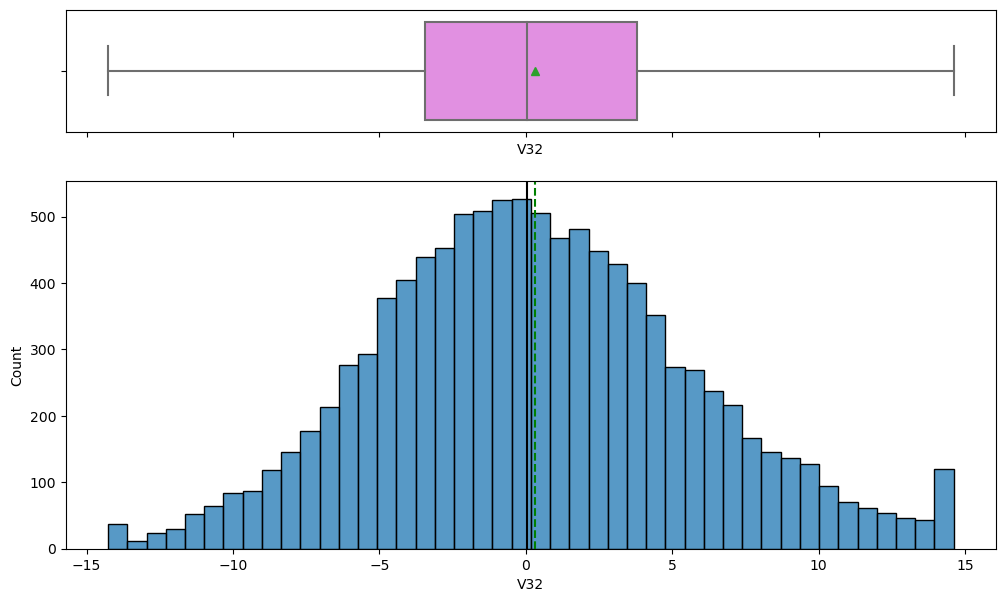

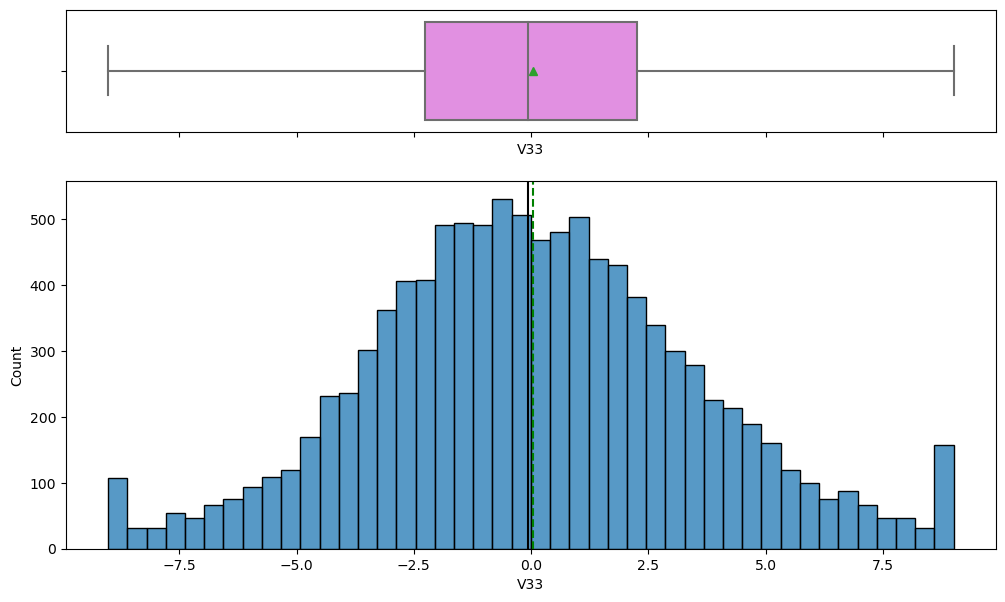

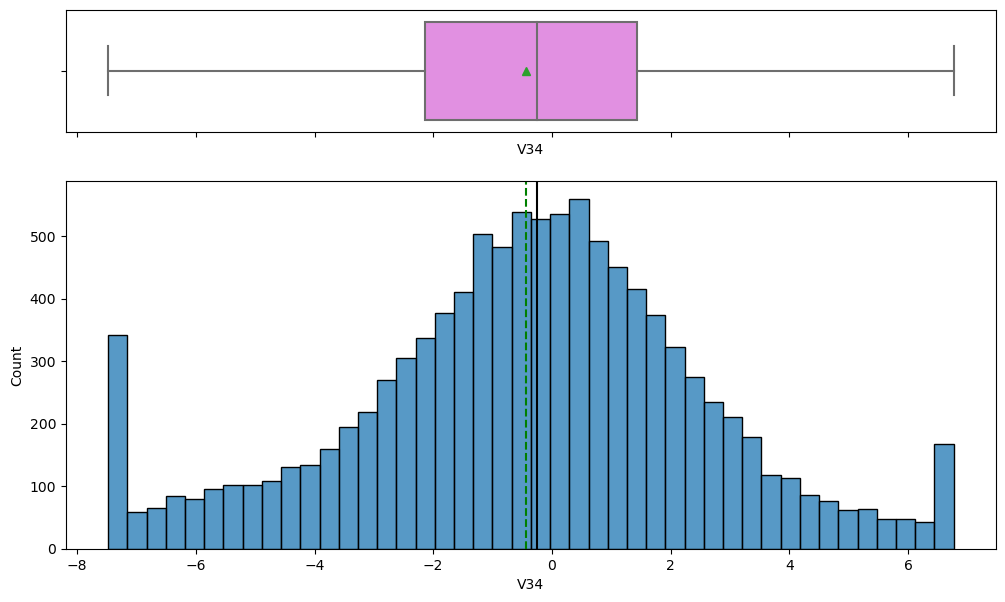

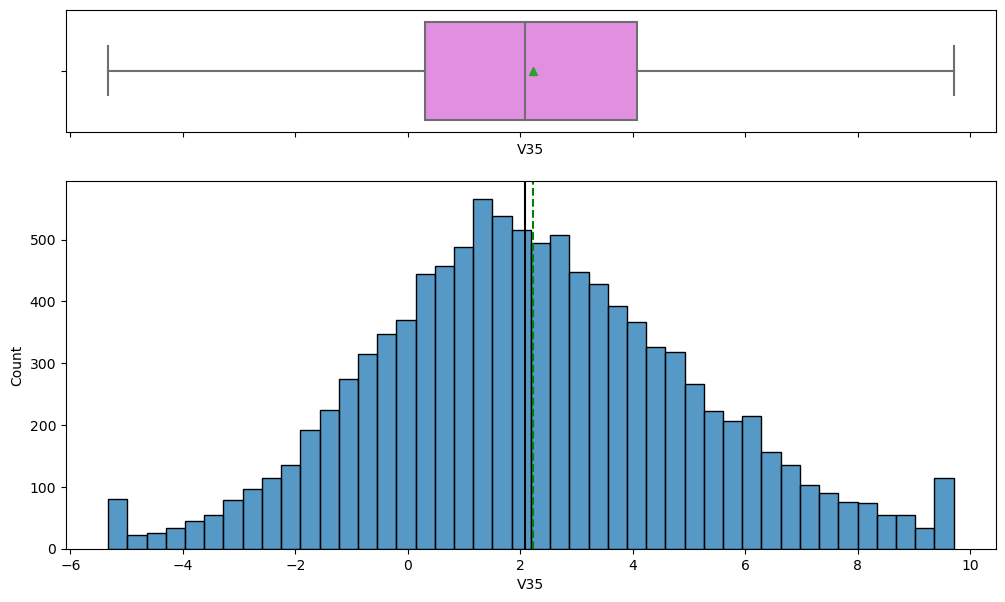

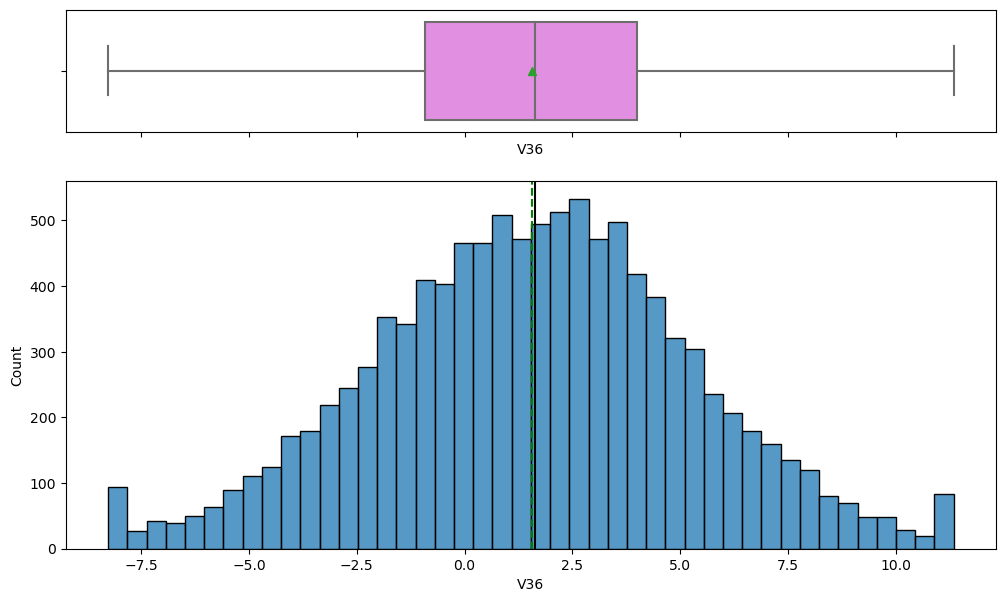

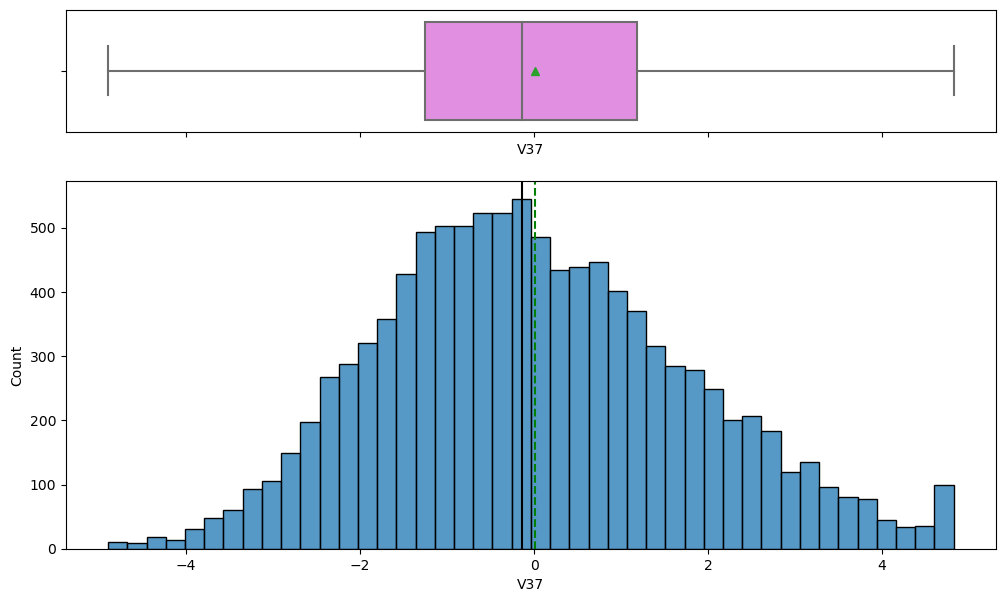

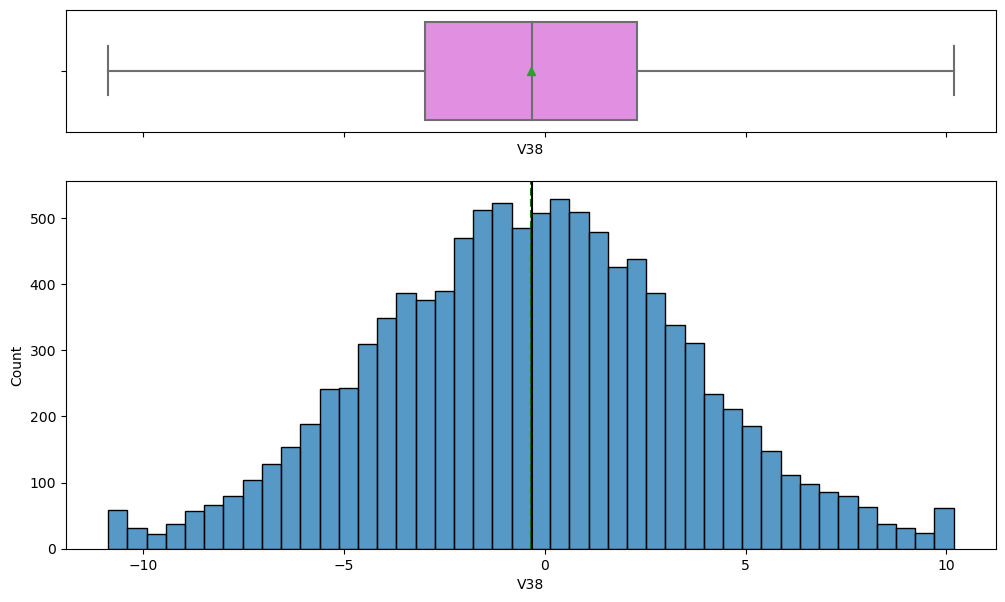

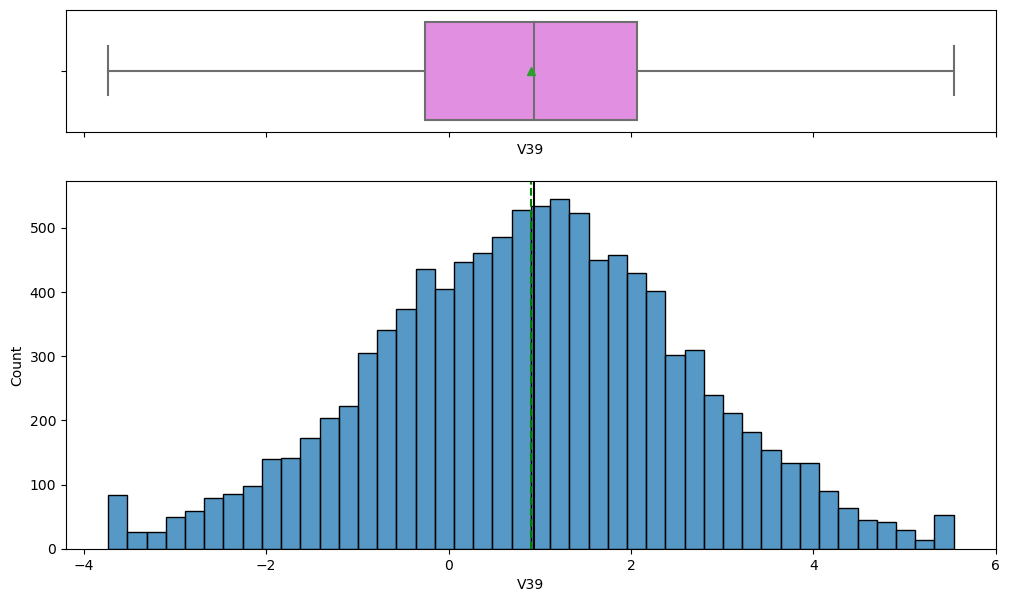

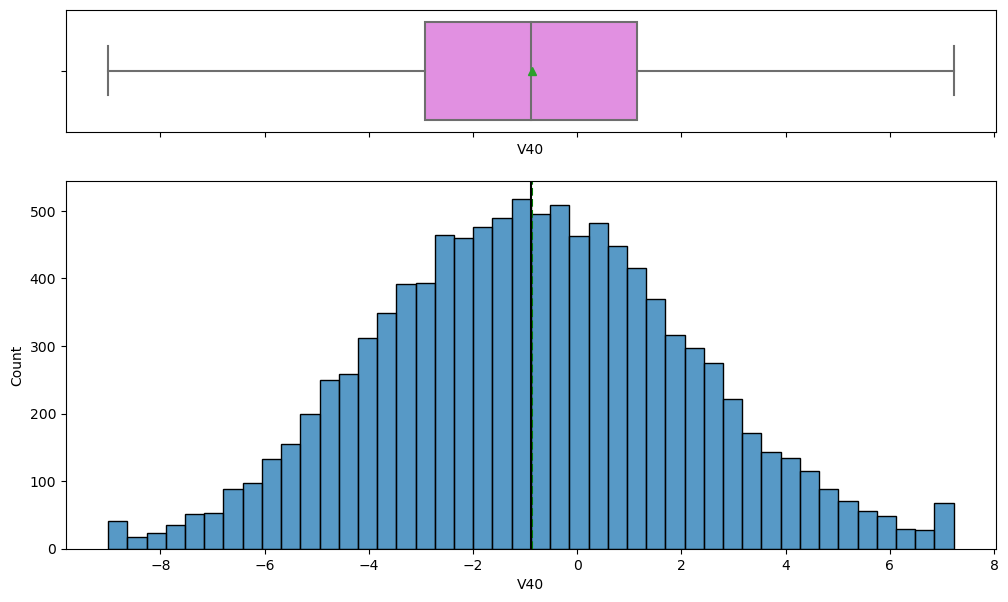

In [42]:
for feature in x_train.columns:
    
    histogram_boxplot(x_train, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data

In [43]:
print(x_train.isnull().sum())
print(x_val.isnull().sum())
print(x_test.isnull().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V2

***Observation***
- We have used the the simple impution for the median to replce the null value 

### Data Processing SMOTE (Over-Sampling)

In [44]:
smote_over= SMOTE(k_neighbors=10,random_state=1,sampling_strategy=True)
x_train_over,y_train_over=smote_over.fit_resample(x_train,y_train)
print("x_train_over y_train 1 :",sum(y_train_over==1))
print("x_train_over y_train 0 :",sum(y_train_over==0))

x_train_over y_train 1 : 9917
x_train_over y_train 0 : 9917


### Data Processing (Under sampling)

In [45]:
ram_under=RandomUnderSampler(random_state=1)
x_train_under,y_train_under=ram_under.fit_resample(x_train,y_train)
print("x_train_under y_train 1 :",sum(y_train_under==1))
print("x_train_under y_train 0 :",sum(y_train_under==0))

x_train_under y_train 1 : 583
x_train_under y_train 0 : 583


***Observation***
- Currently we have 3 test data regular-sample,under-sample,over-sample
- We need to do build the model and get the scores which will performed well 

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [46]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = metrics.accuracy_score(target, pred)  # to compute Accuracy
    recall = metrics.recall_score(target, pred)  # to compute Recall
    precision = metrics.precision_score(target, pred)  # to compute Precision
    f1 = metrics.f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [47]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = metrics.confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [48]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Sample Decision Tree model building with original data

In [49]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("randomforest",RandomForestClassifier(random_state=1)))
models.append(("Bagging",BaggingClassifier(random_state=1)))
models.append(("AdaBoosting",AdaBoostClassifier(random_state=1)))
models.append(("gradientBoost",GradientBoostingClassifier(random_state=1)))
models.append(("xgboost",XGBClassifier()))
results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=x_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(x_train, y_train)
    scores = metrics.recall_score(y_val, model.predict(x_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.674182139699381
randomforest: 0.6672266430887122
Bagging: 0.6758915414087827
AdaBoosting: 0.6191423519009727
gradientBoost: 0.6929708222811671
xgboost: 0.7856027114647804

Validation Performance:

dtree: 0.7989690721649485
randomforest: 0.7628865979381443
Bagging: 0.7474226804123711
AdaBoosting: 0.6443298969072165
gradientBoost: 0.7577319587628866
xgboost: 0.8247422680412371


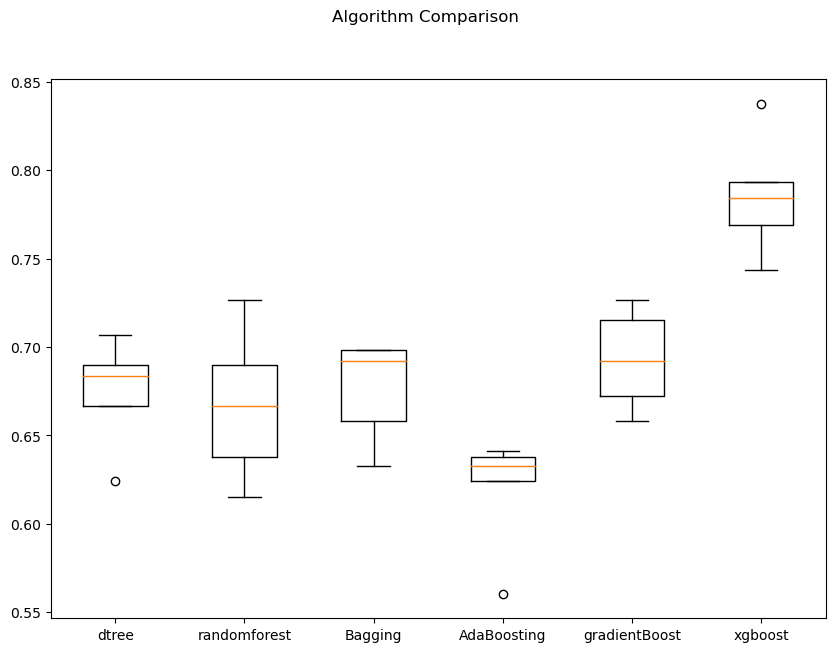

In [50]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

***Observation***
- The Xgboost has great performance range followed by the graident boost and dtree 
- The random forest has a outlies in one of the 5 folds 

### Model Building with Oversampled data


In [51]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("randomforest",RandomForestClassifier(random_state=1)))
models.append(("Bagging",BaggingClassifier(random_state=1)))
models.append(("AdaBoosting",AdaBoostClassifier(random_state=1)))
models.append(("gradientBoost",GradientBoostingClassifier(random_state=1)))
models.append(("xgboost",XGBClassifier()))
results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=x_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(x_train_over, y_train_over)
    scores = metrics.recall_score(y_val, model.predict(x_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.9567406117319799
randomforest: 0.97479040595058
Bagging: 0.9678321681876595
AdaBoosting: 0.9016827509638379
gradientBoost: 0.9315317802124511
xgboost: 0.9844707737543311

Validation Performance:

dtree: 0.8144329896907216
randomforest: 0.8762886597938144
Bagging: 0.8556701030927835
AdaBoosting: 0.8505154639175257
gradientBoost: 0.9020618556701031
xgboost: 0.8917525773195877


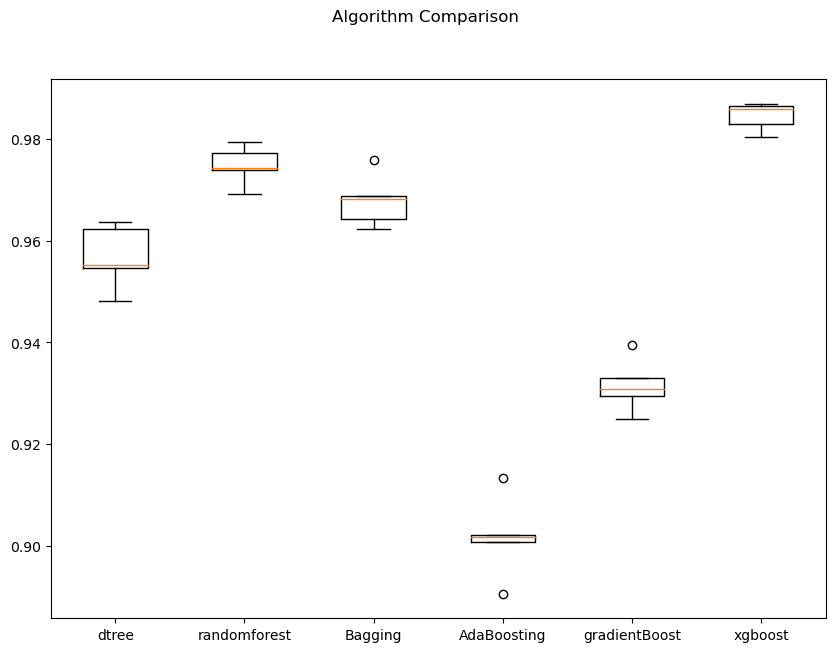

In [52]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

***Observation***
- The over-sample Xgboost also has a greate performance but the gradient boost is slightly different 
- Bagging also had a greate performance in the over-sampling 

### Model Building with Undersampled data

In [53]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("randomforest",RandomForestClassifier(random_state=1)))
models.append(("Bagging",BaggingClassifier(random_state=1)))
models.append(("AdaBoosting",AdaBoostClassifier(random_state=1)))
models.append(("gradientBoost",GradientBoostingClassifier(random_state=1)))
models.append(("xgboost",XGBClassifier()))
results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=x_train_under, y=y_train_under, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(x_train_under, y_train_under)
    scores = metrics.recall_score(y_val, model.predict(x_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.8301503094606542
randomforest: 0.8885057471264368
Bagging: 0.8507515473032715
AdaBoosting: 0.8559976422045388
gradientBoost: 0.8833333333333334
xgboost: 0.8849985263778366

Validation Performance:

dtree: 0.8711340206185567
randomforest: 0.9123711340206185
Bagging: 0.9072164948453608
AdaBoosting: 0.8865979381443299
gradientBoost: 0.9020618556701031
xgboost: 0.9123711340206185


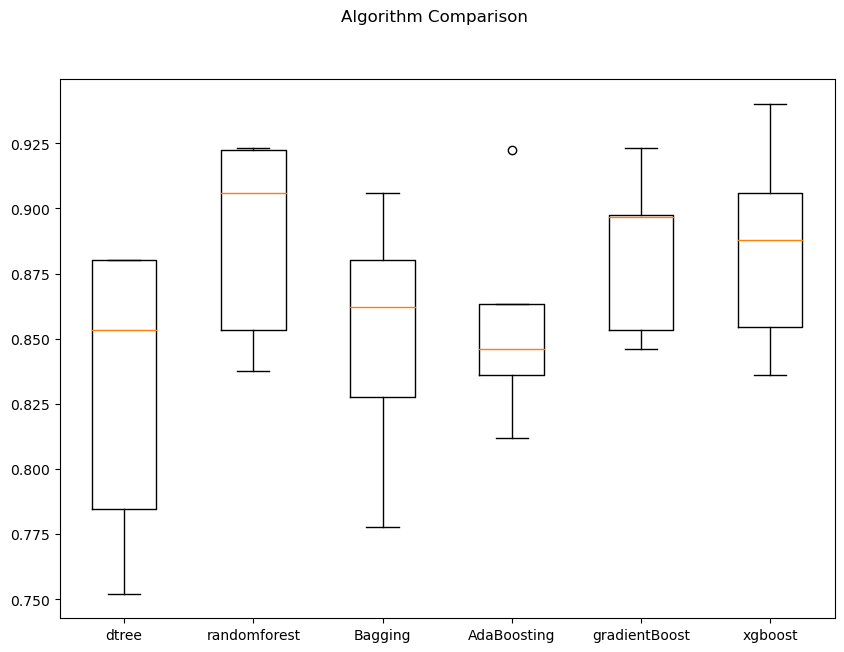

In [54]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

***Observation***
- The Under-sample the random-forest xgboost gradientboost have great job 
- dtree bagging and the ada boosting has sligtly less performance 

### Model to build 
- Dtree for all the three sample in the data set 
- ***Regular sampler: xgboost, gradient, random forest***
- ***Over-sample :xgboost,boosting,randomforest***
- ***Under-Sample:xgboost, gradientboost,randomforest***

## HyperparameterTuning

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method for Decision tree with original data

## Gride search 

In [55]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

kfold=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
#Calling RandomizedSearchCV
grid_cv_Dtree = GridSearchCV(Model, param_grid,  scoring=scorer, cv=kfold)

#Fitting parameters in RandomizedSearchCV
grid_cv_Dtree.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv_Dtree.best_params_,grid_cv_Dtree.best_score_))

Best parameters are {'max_depth': 5, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 4} with CV score=0.5523135867963453:


In [56]:
# building model with best parameters
grid_cv_Dtree = DecisionTreeClassifier(
max_depth=5, max_leaf_nodes= 15, min_impurity_decrease= 0.0001, min_samples_leaf= 4
)

# Fit the model on training data
grid_cv_Dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=4)

## Score computation 

In [57]:
# Calculating different metrics on train set
Dtree_grid_train = model_performance_classification_sklearn(
    grid_cv_Dtree, x_train, y_train
)
print("Training performance:")
Dtree_grid_train

Training performance:


Accuracy    Recall  Precision        F1
0   0.97581  0.619211   0.918575  0.739754

In [58]:
# Calculating different metrics on train set
Dtree_grid_val = model_performance_classification_sklearn(
    grid_cv_Dtree, x_val, y_val
)
print("Training performance:")
Dtree_grid_val

Training performance:


Accuracy    Recall  Precision        F1
0  0.976286  0.670103   0.872483  0.758017

***Observation***
- The  recall score has increased compared to the train score 
- Then model is not underfit or the overfit 

### Confution matrix for the grid_search Decision Tree 

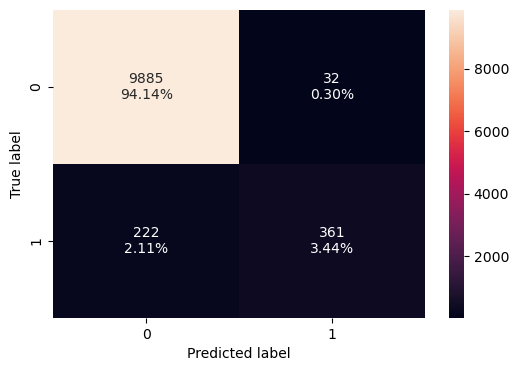

In [59]:
confusion_matrix_sklearn(
grid_cv_Dtree, x_train, y_train
)

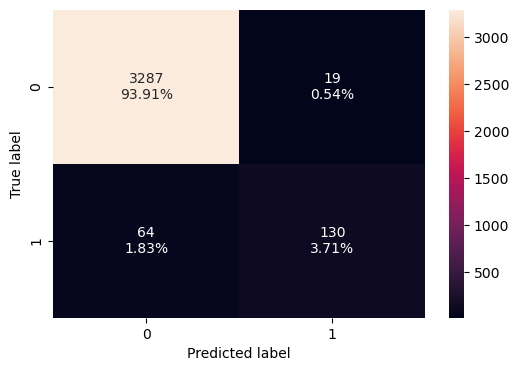

In [60]:
confusion_matrix_sklearn(
grid_cv_Dtree, x_val, y_val
)

### Random Search Decision Tree 

In [61]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }
kfold=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=kfold, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5419687592101384:


In [62]:
randomized_cv_tuned = DecisionTreeClassifier(
    min_samples_leaf=7,
    min_impurity_decrease=0.0001,
    max_leaf_nodes=15,
    max_depth=5
)
randomized_cv_tuned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

## Score computation 

In [63]:
# Calculating different metrics on train set
Dtree_randomgrid_train = model_performance_classification_sklearn(
    randomized_cv_tuned, x_train, y_train
)
print("Training performance:")
Dtree_randomgrid_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.975333  0.610635   0.917526  0.733265

In [64]:
# Calculating different metrics on train set
Dtree_randomgrid_val = model_performance_classification_sklearn(
    randomized_cv_tuned, x_val, y_val
)
print("Training performance:")
Dtree_randomgrid_val

Training performance:


Accuracy    Recall  Precision        F1
0  0.976571  0.664948   0.883562  0.758824

## confusion matrix Random search Dtree

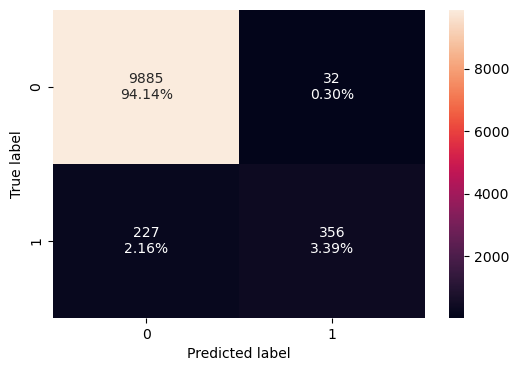

In [65]:
confusion_matrix_sklearn(
randomized_cv_tuned, x_train, y_train
)

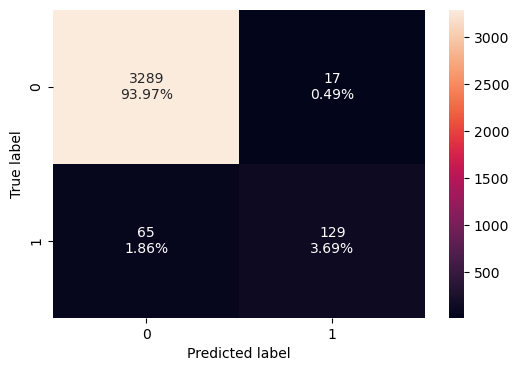

In [66]:
confusion_matrix_sklearn(
randomized_cv_tuned, x_val, y_val
)

### Sample tuning method for Decision tree with oversampled data

In [67]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }
kfold=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
#Calling GridSearchCV
Grid_dree_over = GridSearchCV(estimator=Model, param_grid=param_grid,  scoring=scorer, cv=kfold,n_jobs=-1)

#Fitting parameters in GridSearchCV
Grid_dree_over.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(Grid_dree_over.best_params_,Grid_dree_over.best_score_))

Best parameters are {'max_depth': 5, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 1} with CV score=0.8996660119076667:


In [68]:
Grid_dtree_over_tune=DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf=7,
    min_impurity_decrease=0.0001,
    max_leaf_nodes=15,
    max_depth=5
)
Grid_dtree_over_tune.fit(x_train_over,y_train_over)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

## Scoring for the over sample for the gridesearch 

In [69]:
Dtree_grid_train_oversample = model_performance_classification_sklearn(
    Grid_dtree_over_tune, x_train_over, y_train_over
)
print("Training performance:")
Dtree_grid_train_oversample

Training performance:


Accuracy    Recall  Precision        F1
0  0.894525  0.900171   0.890119  0.895117

In [70]:
Dtree_grid_val_oversample = model_performance_classification_sklearn(
    Grid_dtree_over_tune, x_val, y_val
)
print("Training performance:")
Dtree_grid_val_oversample

Training performance:


Accuracy    Recall  Precision        F1
0  0.869143  0.876289   0.281457  0.426065

***Observation***
- The Recall score is high but the precision score dropped very low. 

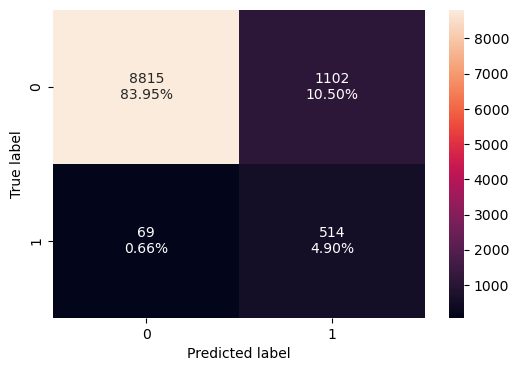

In [71]:
confusion_matrix_sklearn(
Grid_dtree_over_tune, x_train, y_train
)

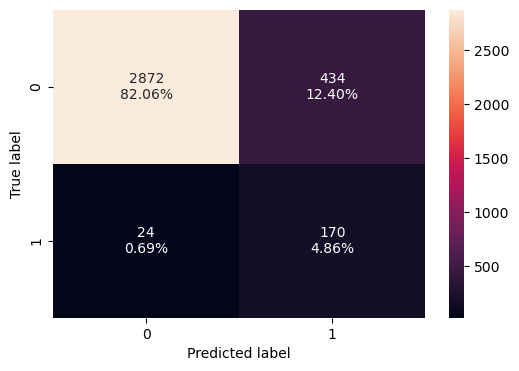

In [72]:
confusion_matrix_sklearn(
Grid_dtree_over_tune, x_val, y_val
)

In [73]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.89856044523612:


In [74]:
dtree_random_oversample_tuned=DecisionTreeClassifier(random_state=1,
                                                    min_samples_leaf=7,
                                                    min_impurity_decrease=0.0001,
                                                    max_leaf_nodes=15,
                                                    max_depth=5)
dtree_random_oversample_tuned.fit(x_train_over,y_train_over)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [75]:
Dtree_randomgrid_val_oversample_test = model_performance_classification_sklearn(
    dtree_random_oversample_tuned, x_train_over, y_train_over
)
print("Training performance:")
Dtree_randomgrid_val_oversample_test

Training performance:


Accuracy    Recall  Precision        F1
0  0.894525  0.900171   0.890119  0.895117

In [76]:
Dtree_randomgrid_val_oversample_val = model_performance_classification_sklearn(
    dtree_random_oversample_tuned, x_val, y_val
)
print("Training performance:")
Dtree_randomgrid_val_oversample_val

Training performance:


Accuracy    Recall  Precision        F1
0  0.869143  0.876289   0.281457  0.426065

***Observation***
- The model performed pretty good in the train and the vaildation 
- the model has compramised on precision score but did good on accuracy and recall

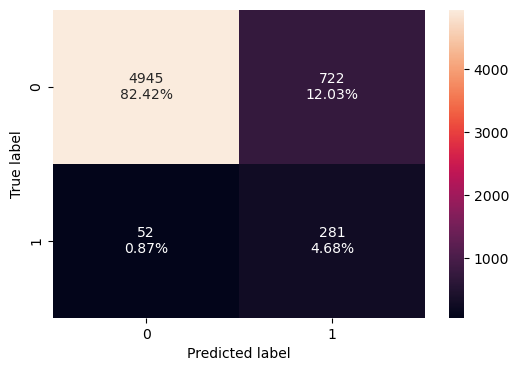

In [77]:
confusion_matrix_sklearn(
 dtree_random_oversample_tuned, x_test, y_test
)

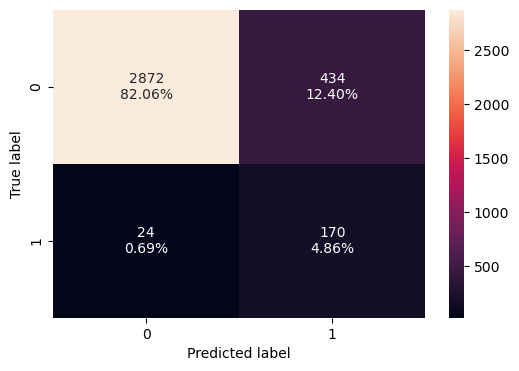

In [78]:
confusion_matrix_sklearn(
dtree_random_oversample_tuned, x_val, y_val
)

### Sample tuning method for Decision tree with undersampled data

In [79]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }
kfold=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
#Calling GridSearchCV
Grid_dree_over = GridSearchCV(estimator=Model, param_grid=param_grid,  scoring=scorer, cv=kfold,n_jobs=-1)

#Fitting parameters in GridSearchCV
Grid_dree_over.fit(x_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(Grid_dree_over.best_params_,Grid_dree_over.best_score_))

Best parameters are {'max_depth': 2, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 1} with CV score=0.8851311523725318:


In [80]:
Grid_dtree_under_tune=DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf=1,
    min_impurity_decrease=0.0001,
    max_leaf_nodes=10,
    max_depth=2
)
Grid_dtree_under_tune.fit(x_train_under,y_train_under)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, random_state=1)

In [82]:
Dtree_grid_undersample_train = model_performance_classification_sklearn(
    Grid_dtree_under_tune, x_train_under, y_train_under
)
print("Training performance:")
Dtree_grid_undersample_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.783877  0.910806   0.726402  0.808219

In [83]:
Dtree_grid_undersample_val = model_performance_classification_sklearn(
    Grid_dtree_under_tune, x_val, y_val
)
print("Training performance:")
Dtree_grid_undersample_val

Training performance:


Accuracy    Recall  Precision        F1
0  0.616571  0.907216   0.117333  0.207792

***Observation***
- The model had done pretty good score comparied to remining model score 
- There is great drop in remaning score 

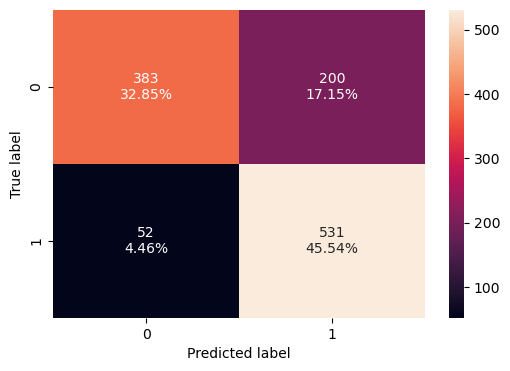

In [84]:
confusion_matrix_sklearn(
Grid_dtree_under_tune, x_train_under, y_train_under
)

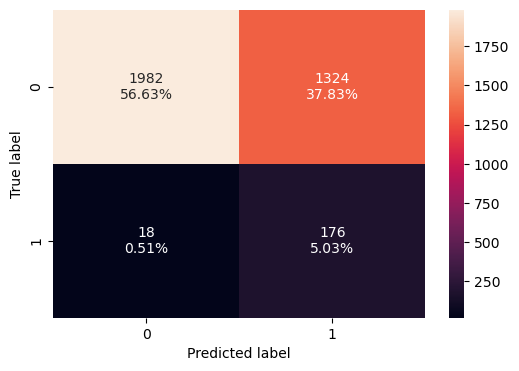

In [85]:
confusion_matrix_sklearn(
 Grid_dtree_under_tune, x_val, y_val
)

In [86]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv_under = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_under.fit(x_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_under.best_params_,randomized_cv_under.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 2} with CV score=0.8608458591217211:


In [87]:
dtree_random_under_tuned=DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf=1,
    min_impurity_decrease=0.001,
    max_depth=2,
    max_leaf_nodes=5
)
dtree_random_under_tuned.fit(x_train_under,y_train_under)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

In [88]:
dtree_random_under_tuned_train = model_performance_classification_sklearn(
    dtree_random_under_tuned, x_train_under, y_train_under
)
print("Training performance:")
dtree_random_under_tuned_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.783877  0.910806   0.726402  0.808219

In [89]:
dtree_random_under_tuned_val = model_performance_classification_sklearn(
    dtree_random_under_tuned, x_val, y_val
)
print("Training performance:")
dtree_random_under_tuned_val

Training performance:


Accuracy    Recall  Precision        F1
0  0.616571  0.907216   0.117333  0.207792

***Observation***
- The score for the recall has improved a lot but the overall score has decreased 
- The model is not underfit or overfit 

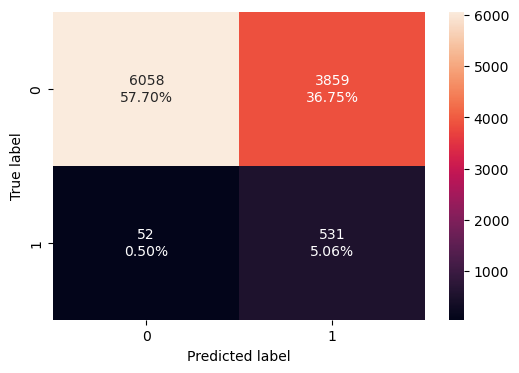

In [90]:
confusion_matrix_sklearn(
 dtree_random_under_tuned, x_train, y_train
)

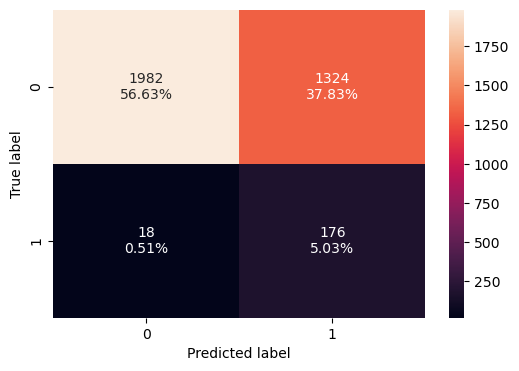

In [91]:
confusion_matrix_sklearn(
 dtree_random_under_tuned, x_val, y_val
)

***Observation***
- The detecting the precision values are so critical 

### Random forest with regular data set 

## Gradient

In [92]:
estimator = RandomForestClassifier(random_state=1,class_weight="balanced")
parameter= {
  "n_estimators": [200,250,300],
  "min_samples_leaf": np.arange(1, 4),
  "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}
ssc_score= metrics.make_scorer(metrics.recall_score)
kfold=StratifiedKFold(random_state=1,shuffle=True,n_splits=5)
grid_rf= GridSearchCV(estimator,parameter,cv=kfold,scoring=ssc_score)
grid_rf.fit(x_train,y_train)
print("Best parameters are {} with CV score={}:" .format(grid_rf.best_params_,grid_rf.best_score_))

Best parameters are {'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 3, 'n_estimators': 200} with CV score=0.6723843206601827:


In [93]:
rf_grid=RandomForestClassifier(
max_features="sqrt",
    max_samples=0.6,
    min_samples_leaf=3,
    n_estimators=200
)
rf_grid.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.6, min_samples_leaf=3, n_estimators=200)

In [94]:
rf_grid_train = model_performance_classification_sklearn(
    rf_grid, x_train, y_train
)
print("Training performance:")
rf_grid_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.989714  0.816467   0.997904  0.898113

In [95]:
rf_grid_val = model_performance_classification_sklearn(
    rf_grid, x_val, y_val
)
print("Training performance:")
rf_grid_val

Training performance:


Accuracy    Recall  Precision        F1
0  0.984571  0.721649        1.0  0.838323

***Observation***
- The Recall score test and val has 8% difference 
- There is a good score 

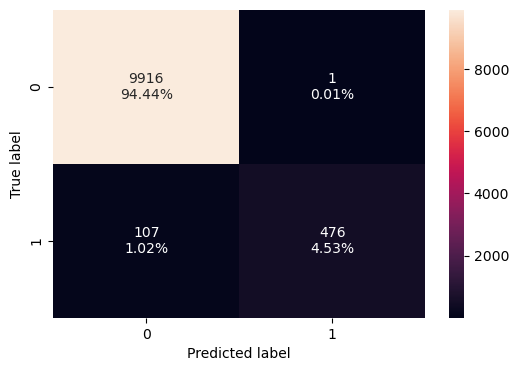

In [96]:
confusion_matrix_sklearn(
 rf_grid, x_train, y_train
)

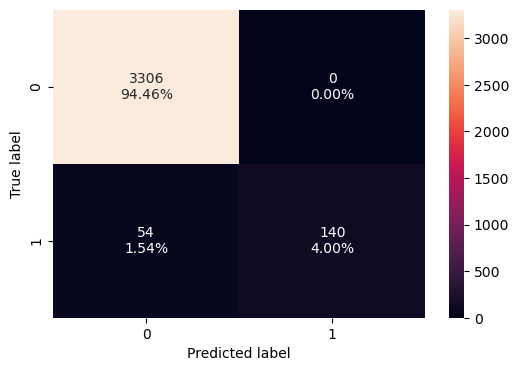

In [97]:
confusion_matrix_sklearn(
 rf_grid, x_val, y_val
)

## The Random Gride RF 

In [98]:
estimator = RandomForestClassifier(random_state=1,class_weight="balanced")
parameter= {
  "n_estimators": [200,250,300],
  "min_samples_leaf": np.arange(1, 4),
  "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}
ssc_score= metrics.make_scorer(metrics.recall_score)
kfold=StratifiedKFold(random_state=1,shuffle=True,n_splits=5)
r_grid_rf= RandomizedSearchCV(estimator,parameter,cv=kfold,scoring=ssc_score,n_iter=10,n_jobs=-1)
r_grid_rf.fit(x_train,y_train)
print("Best parameters are {} with CV score={}:" .format(r_grid_rf.best_params_,r_grid_rf.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 3, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.6655172413793103:


In [99]:
rf_random=RandomForestClassifier(
n_estimators=250,
min_samples_leaf=3,
max_samples=0.4,
max_features="sqrt")
rf_random.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=250)

In [100]:
rf_random_train = model_performance_classification_sklearn(
    rf_random, x_train, y_train
)
print("Training performance:")
rf_random_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.985048  0.734134   0.995349  0.845015

In [102]:
rf_random_val = model_performance_classification_sklearn(
    rf_random, x_val, y_val
)
print("Training performance:")
rf_random_val

Training performance:


Accuracy    Recall  Precision        F1
0  0.983143  0.706186   0.985612  0.822823

***Observation***
- The model has less performance than Gradient search 
- the recall score has dropped comparing the train and val 

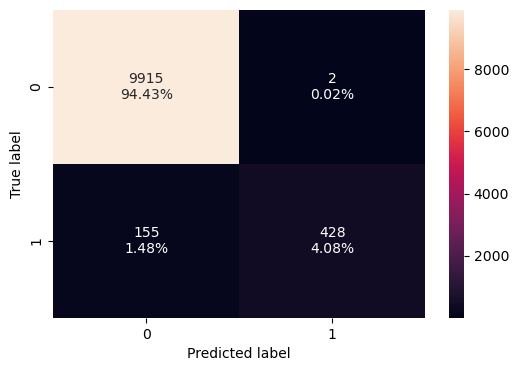

In [103]:
confusion_matrix_sklearn(
 rf_random, x_train, y_train
)

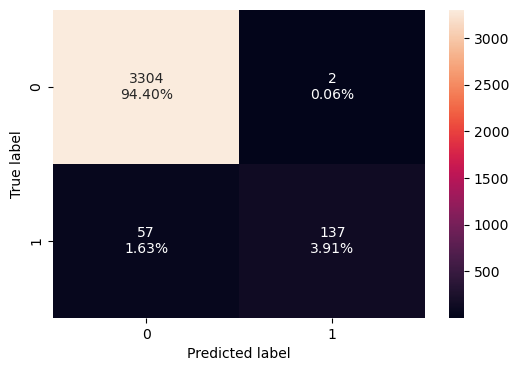

In [104]:
confusion_matrix_sklearn(
   rf_random, x_val, y_val
)

## Over-Fitted Data Gradient Search 

In [105]:
estimator = RandomForestClassifier(random_state=1,class_weight="balanced")
parameter= {
  "n_estimators": [200,250,300],
  "min_samples_leaf": np.arange(1, 4),
  "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}
ssc_score= metrics.make_scorer(metrics.recall_score)
kfold=StratifiedKFold(random_state=1,shuffle=True,n_splits=5)
grid_rf= GridSearchCV(estimator,parameter,cv=kfold,scoring=ssc_score)
grid_rf.fit(x_train_over,y_train_over)
print("Best parameters are {} with CV score={}:" .format(grid_rf.best_params_,grid_rf.best_score_))

Best parameters are {'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 1, 'n_estimators': 250} with CV score=0.9719671644461796:


In [106]:
rf_grid_over=RandomForestClassifier(
max_features='sqrt',
    max_samples=0.6,
    min_samples_leaf=1,
    n_estimators=200
)
rf_grid_over.fit(x_train_over,y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=200)

In [107]:
rf_grid_over_train = model_performance_classification_sklearn(
    rf_grid_over, x_train_over, y_train_over
)
print("Training performance:")
rf_grid_over_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.999193  0.998588   0.999798  0.999193

In [108]:
rf_grid_over_val = model_performance_classification_sklearn(
    rf_grid_over, x_val, y_val
)
print("Training performance:")
rf_grid_over_val

Training performance:


Accuracy    Recall  Precision        F1
0  0.989429  0.886598   0.919786  0.902887

***Observation***
- The overall score from the over fitting data is great 
- the recall 89% which a great score 

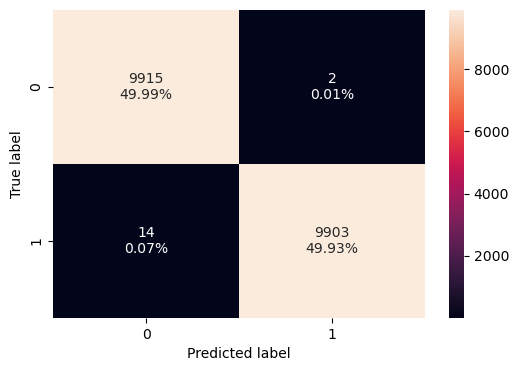

In [109]:
confusion_matrix_sklearn(
   rf_grid_over, x_train_over, y_train_over
)

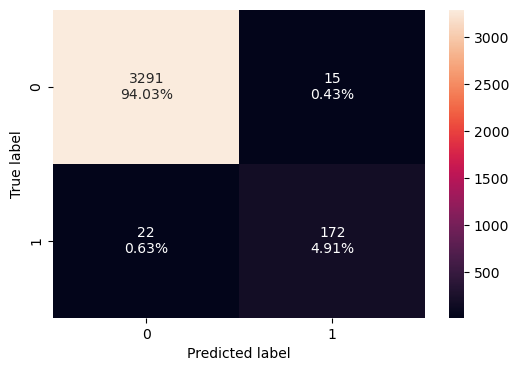

In [110]:
confusion_matrix_sklearn(
    rf_grid_over, x_val, y_val
)

## Random forest randomized search

In [111]:
estimator = RandomForestClassifier(random_state=1,class_weight="balanced")
parameter= {
  "n_estimators": [200,250,300],
  "min_samples_leaf": np.arange(1, 4),
  "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}
ssc_score= metrics.make_scorer(metrics.recall_score)
kfold=StratifiedKFold(random_state=1,shuffle=True,n_splits=5)
r_grid_rf_over= RandomizedSearchCV(estimator,parameter,cv=kfold,scoring=ssc_score,n_iter=10,n_jobs=-1)
r_grid_rf_over.fit(x_train_over,y_train_over)
print("Best parameters are {} with CV score={}:" .format(r_grid_rf_over.best_params_,r_grid_rf_over.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9719671644461796:


In [112]:
rf_random_over=RandomForestClassifier(
max_features='sqrt',
    max_samples=0.5,
    min_samples_leaf=1,
    n_estimators=250
)
rf_random_over.fit(x_train_over,y_train_over)

RandomForestClassifier(max_samples=0.5, n_estimators=250)

In [113]:
rf_random_over_train = model_performance_classification_sklearn(
    rf_random_over, x_train_over, y_train_over
)
print("Training performance:")
rf_random_over_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.997328  0.994958   0.999696  0.997321

In [114]:
rf_random_over_val = model_performance_classification_sklearn(
    rf_random_over, x_val, y_val
)
print("Training performance:")
rf_random_over_val

Training performance:


Accuracy    Recall  Precision        F1
0  0.988857  0.886598   0.910053  0.898172

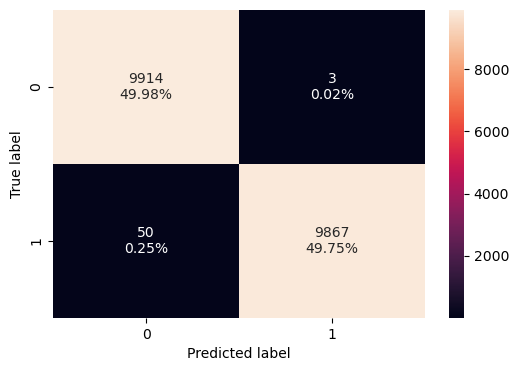

In [115]:
confusion_matrix_sklearn(
    rf_random_over, x_train_over, y_train_over
)

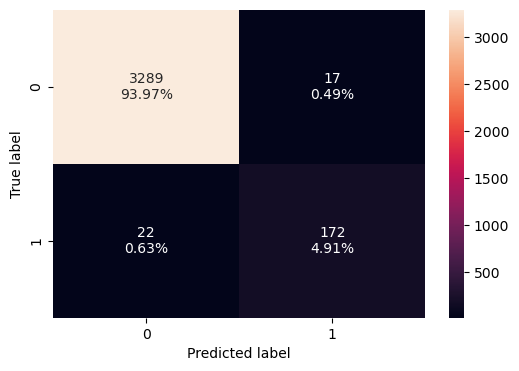

In [116]:
confusion_matrix_sklearn(
   rf_random_over, x_val, y_val
)

## Under fit data Gradient 

In [117]:
estimator = RandomForestClassifier(random_state=1,class_weight="balanced")
parameter= {
  "n_estimators": [200,250,300],
  "min_samples_leaf": np.arange(1, 4),
  "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}
ssc_score= metrics.make_scorer(metrics.recall_score)
kfold=StratifiedKFold(random_state=1,shuffle=True,n_splits=5)
grid_rf= GridSearchCV(estimator,parameter,cv=kfold,scoring=ssc_score)
grid_rf.fit(x_train_under,y_train_under)
print("Best parameters are {} with CV score={}:" .format(grid_rf.best_params_,grid_rf.best_score_))

Best parameters are {'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 1, 'n_estimators': 250} with CV score=0.8953728264073092:


In [118]:
rf_grid_under=RandomForestClassifier(
max_features='sqrt',
    max_samples=0.6,
    min_samples_leaf=1,
    n_estimators=250
)
rf_grid_under.fit(x_train_under,y_train_under)

RandomForestClassifier(max_samples=0.6, n_estimators=250)

In [119]:
rf_grid_under_train = model_performance_classification_sklearn(
    rf_grid_under, x_train_under, y_train_under
)
print("Training performance:")
rf_grid_under_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.987993  0.975986        1.0  0.987847

In [120]:
rf_grid_under_val = model_performance_classification_sklearn(
    rf_grid_under, x_val, y_val
)
print("Training performance:")
rf_grid_under_val

Training performance:


Accuracy    Recall  Precision        F1
0  0.934286  0.917526   0.454082  0.607509

***Observation***
- The recall score is the best obtain over all the model 
- The F1 score and the precision has fall down drastically  

## Under-Fit Random search 

In [121]:
estimator = RandomForestClassifier(random_state=1,class_weight="balanced")
parameter= {
  "n_estimators": [200,250,300],
  "min_samples_leaf": np.arange(1, 4),
  "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}
ssc_score= metrics.make_scorer(metrics.recall_score)
kfold=StratifiedKFold(random_state=1,shuffle=True,n_splits=5)
r_grid_rf_under= RandomizedSearchCV(estimator,parameter,cv=kfold,scoring=ssc_score,n_iter=10,n_jobs=-1)
r_grid_rf_under.fit(x_train_under,y_train_under)
print("Best parameters are {} with CV score={}:" .format(r_grid_rf_under.best_params_,r_grid_rf_under.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8953728264073092:


In [122]:
rf_random_under=RandomForestClassifier(
max_features='sqrt',
    max_samples=0.6,
    min_samples_leaf=1,
    n_estimators=200
)
rf_random_under.fit(x_train_under,y_train_under)

RandomForestClassifier(max_samples=0.6, n_estimators=200)

In [123]:
rf_random_under_train = model_performance_classification_sklearn(
    rf_random_under, x_train_under, y_train_under
)
print("Training performance:")
rf_random_under_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.984563  0.969125        1.0  0.984321

In [124]:
rf_random_under_val = model_performance_classification_sklearn(
    rf_random_under, x_val, y_val
)
print("Training performance:")
rf_random_under_val

Training performance:


Accuracy    Recall  Precision        F1
0     0.934  0.907216   0.452442  0.603774

***observation***
- The scores are slightly lesser than the gradientsearch 
- The overall the model had done less performance 

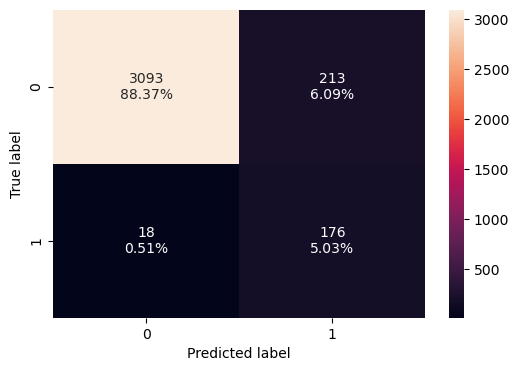

In [125]:
confusion_matrix_sklearn(
  rf_random_under, x_val, y_val
)

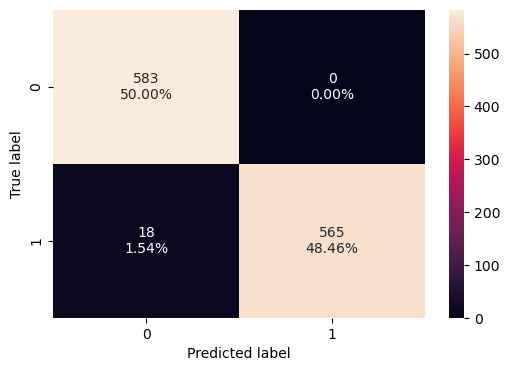

In [126]:
confusion_matrix_sklearn(
      rf_random_under, x_train_under, y_train_under
)

## Model XGboost 
- xgboost has done pretty good in all the data 

### Regular data set 
## Grid-search 

In [127]:
%%time

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv_xgb = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv_xgb.fit(x_train,y_train)


CPU times: user 8.46 s, sys: 1.43 s, total: 9.88 s
Wall time: 3min 36s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 1, 3, 5],
                         'learning_rate': [0.01, 0.1, 0.2, 0.05],
                         'max_depth': array([1, 2, 3, 4]),
                         'n_estimators': array([ 50, 100]),
                         'reg_lambda': [5, 10], 'scale_pos_weight': [2, 5, 10],
                         'subsample': [0.8, 0.9, 1]},
             scoring=make_scorer(recall_score))

In [128]:
print("Best parameters are {} with CV score={}:" .format(grid_cv_xgb.best_params_,grid_cv_xgb.best_score_))

Best parameters are {'gamma': 5, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50, 'reg_lambda': 10, 'scale_pos_weight': 10, 'subsample': 1} with CV score=0.8610374300029473:


In [129]:
xgboost_grid_tuned=XGBClassifier(
    gamma=5,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    reg_lambda=10,
    scale_pos_weight=10,
    subsample=0.9
    
)
xgboost_grid_tuned.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [130]:
xgboost_grid_tuned_train = model_performance_classification_sklearn(
    xgboost_grid_tuned, x_train, y_train
)
print("Training performance:")
xgboost_grid_tuned_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.985238  0.915952   0.834375  0.873262

In [131]:
xgboost_grid_tuned_val = model_performance_classification_sklearn(
    xgboost_grid_tuned, x_val, y_val
)
print("Training performance:")
xgboost_grid_tuned_val

Training performance:


Accuracy    Recall  Precision        F1
0  0.981429  0.881443   0.802817  0.840295

***Observation***
- The score are pretty good 
- There is no overfit or the underfit from the scores obtain

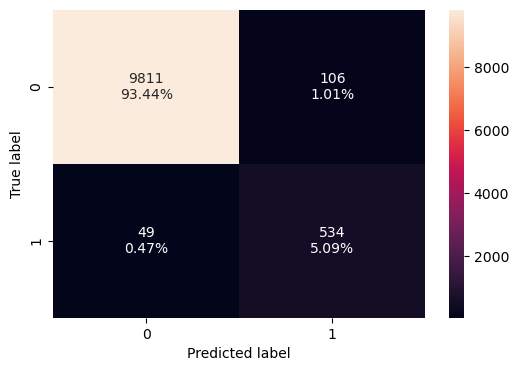

In [132]:
confusion_matrix_sklearn(
 xgboost_grid_tuned, x_train, y_train
)

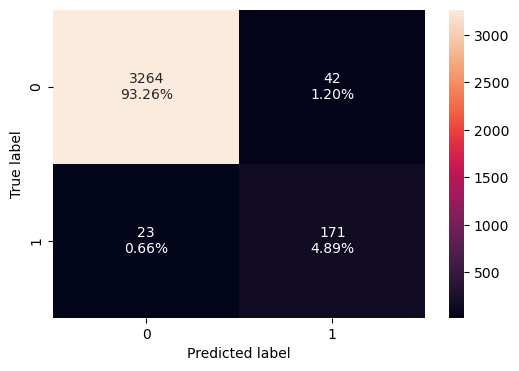

In [133]:
confusion_matrix_sklearn(
 xgboost_grid_tuned, x_val, y_val
)

## Randomsearch

In [134]:
# Creating pipeline
model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv_xgboost = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv_xgboost.fit(x_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv_xgboost.best_params_, randomized_cv_xgboost.best_score_
    )
)

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 3} with CV score=0.8507662835249044:


In [135]:
xgboost_random_tuned=XGBClassifier(
    gamma=0,
    learning_rate=0.2,
    max_depth=2,
    n_estimators=100,
    reg_lambda=10,
    scale_pos_weight=10,
    subsample=0.8
    
)
xgboost_random_tuned.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [136]:
xgboost_random_tuned_train = model_performance_classification_sklearn(
    xgboost_random_tuned, x_train, y_train
)
print("Training performance:")
xgboost_grid_tuned_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.985238  0.915952   0.834375  0.873262

In [137]:
xgboost_random_tuned_val = model_performance_classification_sklearn(
    xgboost_random_tuned, x_val, y_val
)
print("Val performance:")
xgboost_random_tuned_val

Val performance:


Accuracy    Recall  Precision       F1
0  0.975429  0.871134   0.734783  0.79717

***Observation***
- The score did good but comparing gradient search the score are slightly low   

## Over-fit xgboot
### GridSearch

In [138]:
%%time

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv_xgb = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv_xgb.fit(x_train_over,y_train_over)
print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv_xgboost.best_params_, randomized_cv_xgboost.best_score_
    )
)

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 3} with CV score=0.8507662835249044:
CPU times: user 18.6 s, sys: 33.1 s, total: 51.8 s
Wall time: 6min 2s


In [139]:
xgboost_grid_tuned_over=XGBClassifier(
    gamma=3,
    learning_rate=0.01,
    max_depth=2,
    n_estimators=50,
    reg_lambda=10,
    scale_pos_weight=5,
    subsample=1
    
)
xgboost_grid_tuned_over.fit(x_train_over,y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [140]:
xgboost_grid_tuned_over_train = model_performance_classification_sklearn(
    xgboost_grid_tuned_over, x_train_over, y_train_over
)
print("Training performance:")
xgboost_grid_tuned_over_train

Training performance:


Accuracy  Recall  Precision        F1
0       0.5     1.0        0.5  0.666667

In [141]:
xgboost_grid_tuned_over_val = model_performance_classification_sklearn(
    xgboost_grid_tuned_over, x_val, y_val
)
print("Training performance:")
xgboost_grid_tuned_over_val

Training performance:


Accuracy  Recall  Precision        F1
0  0.055429     1.0   0.055429  0.105035

***Observation***
- The xgboost Grid search gave the Recall score of 1 but the overall score of the model had performed pretty bad.

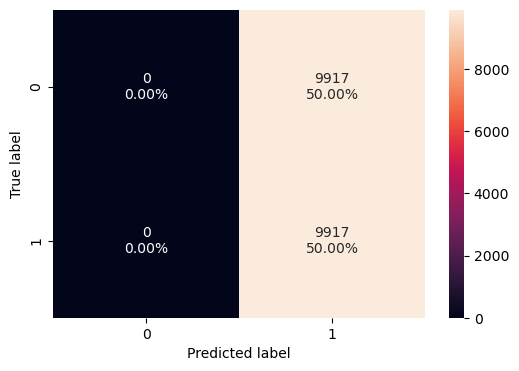

In [142]:
confusion_matrix_sklearn(
  xgboost_grid_tuned_over, x_train_over, y_train_over
)

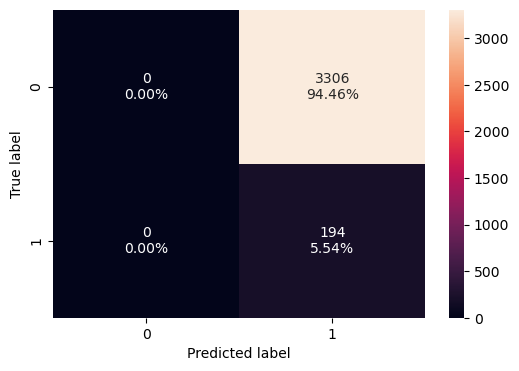

In [143]:
confusion_matrix_sklearn(
  xgboost_grid_tuned_over, x_val, y_val
)

## Random Search Xgboost OverFitting 

In [144]:
# Creating pipeline
model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv_xgboost = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv_xgboost.fit(x_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv_xgboost.best_params_, randomized_cv_xgboost.best_score_
    )
)

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.01, 'gamma': 3} with CV score=1.0:


In [145]:
xgboost_random_tuned_over=XGBClassifier(
    gamma=3,
    learning_rate=0.01,
    max_depth=2,
    n_estimators=50,
    reg_lambda=10,
    scale_pos_weight=5,
    subsample=1
    
)
xgboost_random_tuned_over.fit(x_train_over,y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [146]:
xgboost_random_tuned_over_train = model_performance_classification_sklearn(
    xgboost_random_tuned_over, x_train_over, y_train_over
)
print("Training performance:")
xgboost_random_tuned_over_train

Training performance:


Accuracy  Recall  Precision        F1
0       0.5     1.0        0.5  0.666667

In [147]:
xgboost_random_tuned_over_val = model_performance_classification_sklearn(
    xgboost_random_tuned_over, x_val, y_val
)
print("Training performance:")
xgboost_random_tuned_over_val

Training performance:


Accuracy  Recall  Precision        F1
0  0.055429     1.0   0.055429  0.105035

***Observation***
- The Recall is 100 but the overall model performance had declined 
- which may predict remaing wrong 

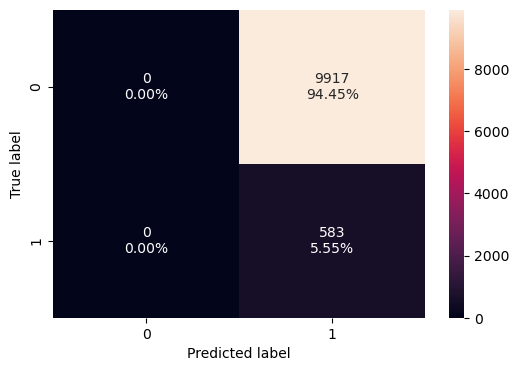

In [148]:
confusion_matrix_sklearn(
  xgboost_random_tuned_over, x_train, y_train
)

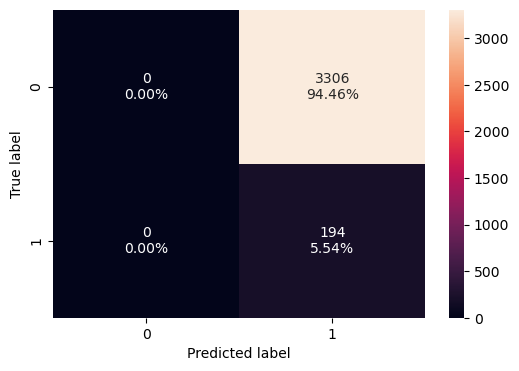

In [149]:
confusion_matrix_sklearn(
  xgboost_random_tuned_over, x_val, y_val
)

## UnderFit Xgboost 
### GridSearch 

In [150]:
%%time

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv_xgb = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv_xgb.fit(x_train_under,y_train_under)
print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv_xgboost.best_params_, randomized_cv_xgboost.best_score_
    )
)

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.01, 'gamma': 3} with CV score=1.0:
CPU times: user 8.32 s, sys: 1.87 s, total: 10.2 s
Wall time: 1min 46s


In [151]:
xgboost_grid_tuned_under=XGBClassifier(
    gamma=3,
    learning_rate=0.01,
    max_depth=2,
    n_estimators=50,
    reg_lambda=10,
    scale_pos_weight=5,
    subsample=1
    
)
xgboost_grid_tuned_under.fit(x_train_under,y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [152]:
xgboost_grid_tuned_under_train = model_performance_classification_sklearn(
    xgboost_grid_tuned_under, x_train_over, y_train_over
)
print("Training performance:")
xgboost_grid_tuned_under_train

Training performance:


Accuracy  Recall  Precision        F1
0       0.5     1.0        0.5  0.666667

In [153]:
xgboost_grid_tuned_under_val = model_performance_classification_sklearn(
    xgboost_grid_tuned_under, x_val, y_val
)
print("Training performance:")
xgboost_grid_tuned_under_val

Training performance:


Accuracy  Recall  Precision        F1
0  0.055429     1.0   0.055429  0.105035

***Observation***
- The model scores had the similar scores as the grident search the remaing scores have done very poor 

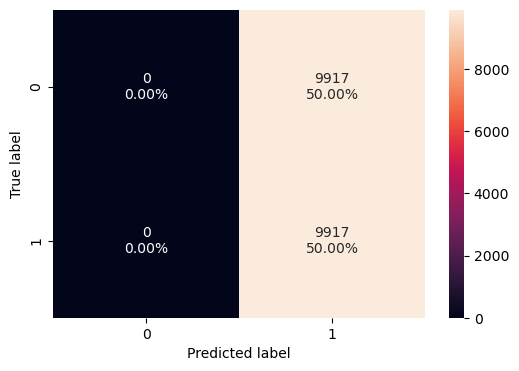

In [154]:
confusion_matrix_sklearn(
 xgboost_grid_tuned_under, x_train_over, y_train_over
)

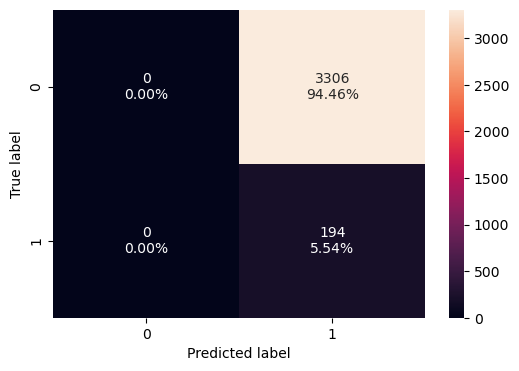

In [155]:
confusion_matrix_sklearn(
    xgboost_grid_tuned_under, x_val, y_val
)

## Under fit  Randomsearch 

In [156]:
# Creating pipeline
model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv_xgboost = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv_xgboost.fit(x_train_under, y_train_under)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv_xgboost.best_params_, randomized_cv_xgboost.best_score_
    )
)


Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.01, 'gamma': 3} with CV score=1.0:


In [157]:
xgboost_random_tuned_under=XGBClassifier(
    gamma=3,
    learning_rate=0.01,
    max_depth=2,
    n_estimators=50,
    reg_lambda=10,
    scale_pos_weight=5,
    subsample=1
    
)
xgboost_random_tuned_under.fit(x_train_under,y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [158]:
xgboost_random_tuned_under_train = model_performance_classification_sklearn(
    xgboost_random_tuned_under, x_train_over, y_train_over
)
print("Training performance:")
xgboost_random_tuned_under_train

Training performance:


Accuracy  Recall  Precision        F1
0       0.5     1.0        0.5  0.666667

In [159]:
xgboost_random_tuned_under_val = model_performance_classification_sklearn(
    xgboost_random_tuned_under, x_val, y_val
)
print("Training performance:")
xgboost_random_tuned_under_val

Training performance:


Accuracy  Recall  Precision        F1
0  0.055429     1.0   0.055429  0.105035

***Observation***

- The model scores had the similar scores as the grident search the remaing scores have done very poor

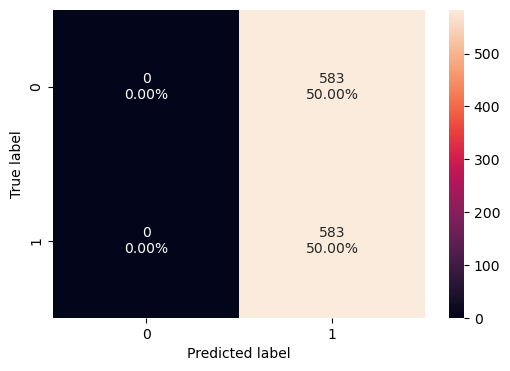

In [160]:
confusion_matrix_sklearn(
    xgboost_random_tuned_under, x_train_under, y_train_under
)

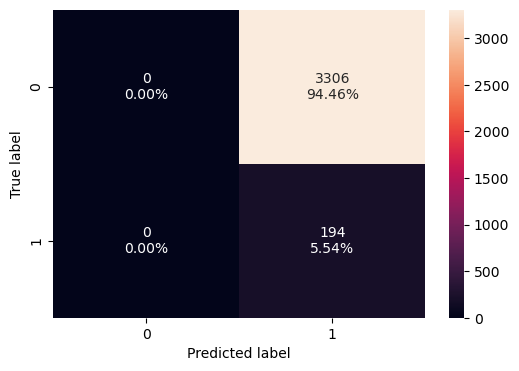

In [161]:
confusion_matrix_sklearn(
    xgboost_random_tuned_under, x_val, y_val
)

## Model performance comparison and choosing the final model

In [163]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Dtree_grid_train.T,
        Dtree_randomgrid_train.T,
        Dtree_grid_train_oversample.T,
        Dtree_randomgrid_val_oversample_test.T,
        Dtree_grid_undersample_train.T,
        dtree_random_under_tuned_train.T,
        
        xgboost_grid_tuned_train.T,
        xgboost_random_tuned_train.T,
        xgboost_grid_tuned_over_train.T,
        xgboost_random_tuned_over_train.T,
        xgboost_grid_tuned_under_train.T,
        xgboost_random_tuned_under_train.T,
        
         rf_grid_train.T,
        rf_random_train.T,
        rf_grid_over_train.T,
        rf_random_over_train.T,
        rf_grid_under_train.T,
        rf_random_under_train.T,
 
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Tuned with Grid search",
    "Decision Tree Tuned with Random search",
     "Decision Tree oversample Tuned with Grid search",
    "Decision Tree oversample Tuned with Random search",
     "Decision Tree undersample Tuned with Grid search",
    "Decision Tree undersample Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
     "Xgboost Tuned oversample with Grid search",
    "Xgboost Tuned oversamplewith Random Search",
     "Xgboost Tuned undersample with Grid search",
    "Xgboost Tuned undersamplewith Random Search",
    "RandomForest Tuned with Grid search",
    "RandomForest Tuned with Random Search",
     "RandomForest Tuned oversample with Grid search",
    "RandomForest Tuned oversamplewith Random Search",
     "RandomForest Tuned undersample with Grid search",
    "RandomForest Tuned undersamplewith Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree Tuned with Grid search  \
Accuracy                               0.975810   
Recall                                 0.619211   
Precision                              0.918575   
F1                                     0.739754   

           Decision Tree Tuned with Random search  \
Accuracy                                 0.975333   
Recall                                   0.610635   
Precision                                0.917526   
F1                                       0.733265   

           Decision Tree oversample Tuned with Grid search  \
Accuracy                                          0.894525   
Recall                                            0.900171   
Precision                                         0.890119   
F1                                                0.895117   

           Decision Tree oversample Tuned with Random search  \
Accuracy                                            0.894525   
Recall                                              0.900171   
Precision                                           0.890119   
F1                                                  0.895117   

           Decision Tree undersample Tuned with Grid search  \
Accuracy                                           0.783877   
Recall                                             0.910806   
Precision                                          0.726402   
F1                                                 0.808219   

           Decision Tree undersample Tuned with Random search  \
Accuracy                                            0.783877    
Recall                                              0.910806    
Precision                                           0.726402    
F1                                                  0.808219    

           Xgboost Tuned with Grid search  Xgboost Tuned with Random Search  \
Accuracy                         0.985238                          0.980095   
Recall                           0.915952                          0.910806   
Precision                        0.834375                          0.771802   
F1                               0.873262                          0.835563   

           Xgboost Tuned oversample with Grid search  \
Accuracy                                    0.500000   
Recall                                      1.000000   
Precision                                   0.500000   
F1                                          0.666667   

           Xgboost Tuned oversamplewith Random Search  \
Accuracy                                     0.500000   
Recall                                       1.000000   
Precision                                    0.500000   
F1                                           0.666667   

           Xgboost Tuned undersample with Grid search  \
Accuracy                                     0.500000   
Recall                                       1.000000   
Precision                                    0.500000   
F1                                           0.666667   

           Xgboost Tuned undersamplewith Random Search  \
Accuracy                                      0.500000   
Recall                                        1.000000   
Precision                                     0.500000   
F1                                            0.666667   

           RandomForest Tuned with Grid search  \
Accuracy                              0.989714   
Recall                                0.816467   
Precision                             0.997904   
F1                                    0.898113   

           RandomForest Tuned with Random Search  \
Accuracy                                0.985048   
Recall                                  0.734134   
Precision                               0.995349   
F1                                      0.845015   

           RandomForest Tuned oversample with Grid search  \
Accuracy                                         0.999193   
Recall                                   

In [164]:
models_train_comp_df = pd.concat(
    [
        Dtree_grid_val.T,
        Dtree_randomgrid_val.T,
        Dtree_grid_val_oversample.T,
        Dtree_randomgrid_val_oversample_val.T,
        Dtree_grid_undersample_val.T,
        dtree_random_under_tuned_val.T,
        
        xgboost_grid_tuned_val.T,
        xgboost_random_tuned_val.T,
        xgboost_grid_tuned_over_val.T,
        xgboost_random_tuned_over_val.T,
        xgboost_grid_tuned_under_val.T,
        xgboost_random_tuned_under_val.T,
        
        rf_grid_val.T,
        rf_random_val.T,
        rf_grid_over_val.T,
        rf_random_over_val.T,
        rf_grid_under_val.T,
        rf_random_under_val.T
 
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Tuned with Grid search",
    "Decision Tree Tuned with Random search",
     "Decision Tree oversample Tuned with Grid search",
    "Decision Tree oversample Tuned with Random search",
     "Decision Tree undersample Tuned with Grid search",
    "Decision Tree undersample Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
     "Xgboost Tuned oversample with Grid search",
    "Xgboost Tuned oversamplewith Random Search",
     "Xgboost Tuned undersample with Grid search",
    "Xgboost Tuned undersamplewith Random Search",
        "RandomForest Tuned with Grid search",
    "RandomForest Tuned with Random Search",
     "RandomForest Tuned oversample with Grid search",
    "RandomForest Tuned oversamplewith Random Search",
     "RandomForest Tuned undersample with Grid search",
    "RandomForest Tuned undersamplewith Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree Tuned with Grid search  \
Accuracy                               0.976286   
Recall                                 0.670103   
Precision                              0.872483   
F1                                     0.758017   

           Decision Tree Tuned with Random search  \
Accuracy                                 0.976571   
Recall                                   0.664948   
Precision                                0.883562   
F1                                       0.758824   

           Decision Tree oversample Tuned with Grid search  \
Accuracy                                          0.869143   
Recall                                            0.876289   
Precision                                         0.281457   
F1                                                0.426065   

           Decision Tree oversample Tuned with Random search  \
Accuracy                                            0.869143   
Recall                                              0.876289   
Precision                                           0.281457   
F1                                                  0.426065   

           Decision Tree undersample Tuned with Grid search  \
Accuracy                                           0.616571   
Recall                                             0.907216   
Precision                                          0.117333   
F1                                                 0.207792   

           Decision Tree undersample Tuned with Random search  \
Accuracy                                            0.616571    
Recall                                              0.907216    
Precision                                           0.117333    
F1                                                  0.207792    

           Xgboost Tuned with Grid search  Xgboost Tuned with Random Search  \
Accuracy                         0.981429                          0.975429   
Recall                           0.881443                          0.871134   
Precision                        0.802817                          0.734783   
F1                               0.840295                          0.797170   

           Xgboost Tuned oversample with Grid search  \
Accuracy                                    0.055429   
Recall                                      1.000000   
Precision                                   0.055429   
F1                                          0.105035   

           Xgboost Tuned oversamplewith Random Search  \
Accuracy                                     0.055429   
Recall                                       1.000000   
Precision                                    0.055429   
F1                                           0.105035   

           Xgboost Tuned undersample with Grid search  \
Accuracy                                     0.055429   
Recall                                       1.000000   
Precision                                    0.055429   
F1                                           0.105035   

           Xgboost Tuned undersamplewith Random Search  \
Accuracy                                      0.055429   
Recall                                        1.000000   
Precision                                     0.055429   
F1                                            0.105035   

           RandomForest Tuned with Grid search  \
Accuracy                              0.984571   
Recall                                0.721649   
Precision                             1.000000   
F1                                    0.838323   

           RandomForest Tuned with Random Search  \
Accuracy                                0.983143   
Recall                                  0.706186   
Precision                               0.985612   
F1                                      0.822823   

           RandomForest Tuned oversample with Grid search  \
Accuracy                                         0.989429   
Recall                                   

***Observation***
- Xgboost Tuned with Grid search Is giving the overall balanced scores and very good recall score 
- Xgboost Tuned with Grid search will be using in the test model building process 

### Test set final performance

In [165]:
xgboost_grid_tuned_test = model_performance_classification_sklearn(
    xgboost_grid_tuned, x_test, y_test
)
print("Training performance:")
xgboost_grid_tuned_test

Training performance:


Accuracy    Recall  Precision        F1
0  0.976833  0.855856   0.757979  0.803949

***Observation***
- Test data scores are pretty good and the recall score is 85 %

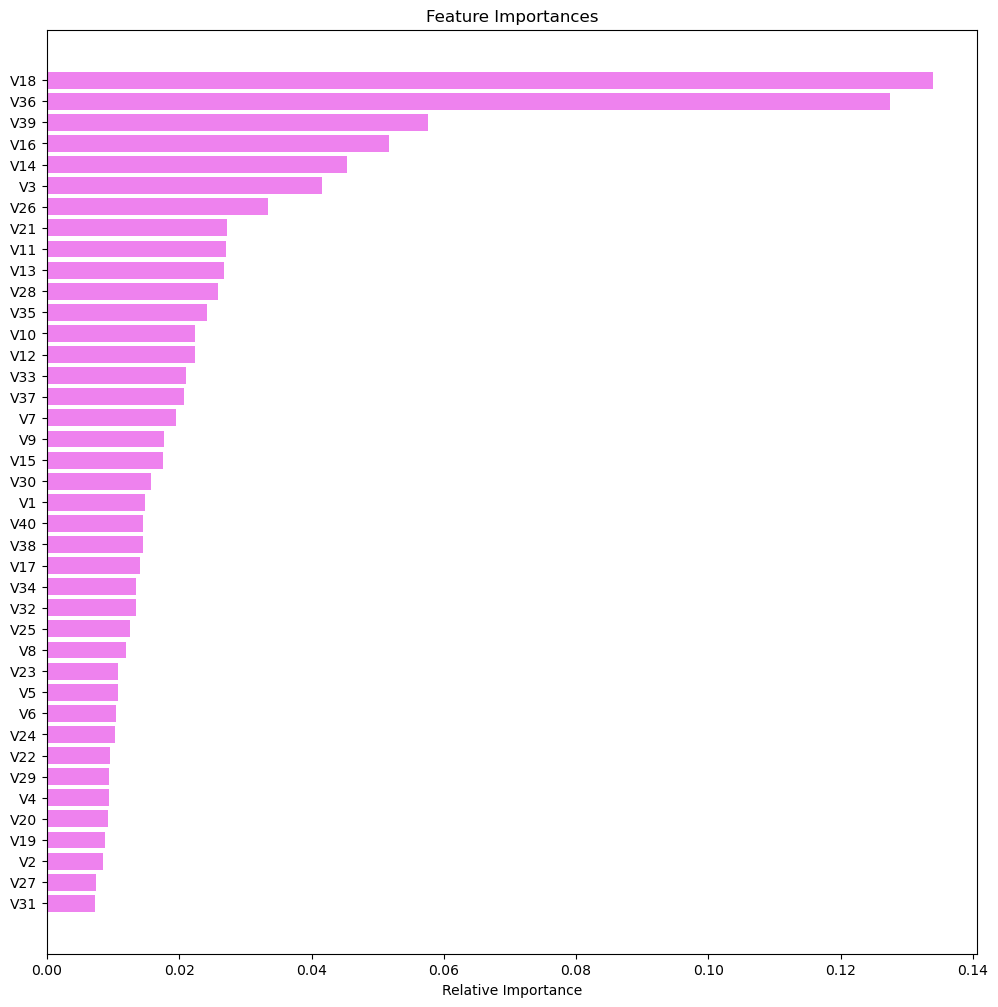

In [166]:
feature_names = x_train.columns
importances = xgboost_grid_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Pipelines to build the final model


## import the data set 

In [167]:
df_final = pd.read_csv("Test.csv.csv")
f_model =df_final.copy()


### Building the pipeline 
- SimpleImputer is used for the null values fill with median 
- The data has numerical feature 

In [168]:
numerical=f_model.columns.to_list()
numerical=numerical[:len(numerical)-1]

In [169]:

numerical_transform = Pipeline(steps=[("imp",SimpleImputer(strategy="median"))])
prepocessor= ColumnTransformer(transformers=[
    ("num",numerical_transform,numerical)
],remainder="passthrough")

### Spliting the data 

In [170]:
X=f_model.drop("Target",axis=1)
Y=f_model["Target"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=1,shuffle=True,stratify=Y,test_size=0.30)


In [171]:
Final_model_pipeline=Pipeline(steps=[
    ("prepocessing",prepocessor),
    ("XGBOOST",XGBClassifier(
    gamma=5,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    reg_lambda=10,
    scale_pos_weight=10,
    subsample=0.9
    
))
])
Final_model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('prepocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28', 'V29',
                                                   'V30', ...])])),
                ('XGBOOST',
                 XGBC...
                               feature_types=None, gamma=5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [172]:
Train_Score = model_performance_classification_sklearn(Final_model_pipeline, x_train, y_train)
print("Final Model performance on Test Dataset:")
Train_Score

Final Model performance on Test Dataset:


Accuracy    Recall  Precision        F1
0  0.990286  0.969543   0.872146  0.918269

In [173]:
Test_Score = model_performance_classification_sklearn(Final_model_pipeline, x_test, y_test)
print("Final Model performance on Test Dataset:")
Test_Score

Final Model performance on Test Dataset:


Accuracy    Recall  Precision        F1
0  0.975333  0.741176   0.807692  0.773006

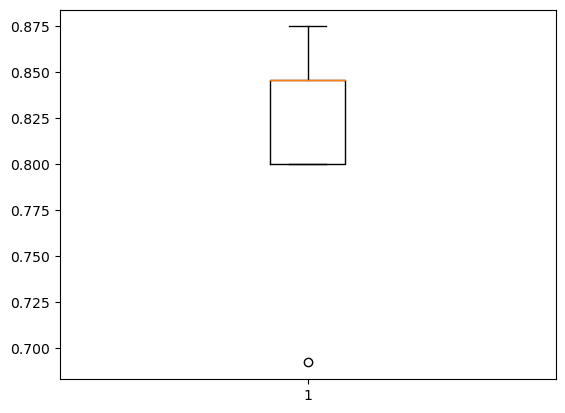

In [174]:
score=metrics.make_scorer(metrics.recall_score)
cross_value_score=cross_val_score(Final_model_pipeline,x_train,y_train,scoring=score)
plt.boxplot(cross_value_score);

***Observation***
- The recall score for the final model varies from 70 % to 87% the result we have obtain score is b/w these values. 

# Business Insights and Conclusions

***
- The best test recall is ~74%  the test f1 score is very low i.e ~77% at the same time comparing the train data. This means that the model is  good at identifying True positives (TP) and False positives(FP)rather than False negatives (FN) 
- The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.) If we have the categorical gifference in the Data we could find the better recall score.

- The model performance can be improved, especially in terms of recall if we know sensor in the generator is located 
- We saw in our analysis that sensor with high and low values are tend to failures
- There is no categorical vaiaable to describe what values are having failure or what location sensor have high failures rate 
- The numerical data we got the a good score. having the numerical data can also increase the recall score.
- There are certain model that given 100 % recall score which did pretty poor on overall and precison which will not give accurate score 